# Set Up

In [3]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import researchpy
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
s5_cfile = '/content/drive/My Drive/MCS5_Age11_CM_Interviews.csv'
s6_cfile = '/content/drive/My Drive/MCS6_Age14_CM_Interviews.csv'
s7_cfile = '/content/drive/My Drive/MCS7_Age17_CM_Interviews.csv'

s5_pfile = '/content/drive/My Drive/MCS5_Age11_Parent_CM.csv'
s6_pfile = '/content/drive/My Drive/MCS6_Age14_Parent_CM.csv'
s7_pfile = '/content/drive/My Drive/MCS7_Age17_Parent_CM.csv'

s5_tfile = '/content/drive/My Drive/MCS5_Age11_Teacher_Survey.csv'
s7_qfile = '/content/drive/My Drive/MCS7_Age17_CM_Qualifications.csv'

In [7]:
s5_cm = pd.read_csv(s5_cfile)
s6_cm = pd.read_csv(s6_cfile)
s7_cm = pd.read_csv(s7_cfile)

s5_pcm = pd.read_csv(s5_pfile)
s6_pcm = pd.read_csv(s6_pfile)
s7_pcm = pd.read_csv(s7_pfile)

s5_tcm = pd.read_csv(s5_tfile)
s7_qcm = pd.read_csv(s7_qfile)

#Cleaning the Datasets

Creating Cohort and Person ID's to merge dataframes on and ensure continuity 

In [8]:
s5_cm["Cohort_ID"] = s5_cm["MCSID"] + s5_cm["ECNUM00"].astype(str)
s6_cm["Cohort_ID"] = s6_cm["MCSID"] + s6_cm["FCNUM00"].astype(str)
s7_cm["Cohort_ID"] = s7_cm["MCSID"] + s7_cm["GCNUM00"].astype(str)
s5_cm["Merge_ID"] = s5_cm["MCSID"] + s5_cm["ECNUM00"].astype(str)
s6_cm["Merge_ID"] = s6_cm["MCSID"] + s6_cm["FCNUM00"].astype(str)
s7_cm["Merge_ID"] = s7_cm["MCSID"] + s7_cm["GCNUM00"].astype(str)

s5_pcm["Person_ID"] = s5_pcm["MCSID"] + s5_pcm["EPNUM00"].astype(str)
s6_pcm["Person_ID"] = s6_pcm["MCSID"] + s6_pcm["FPNUM00"].astype(str)
s7_pcm["Person_ID"] = s7_pcm["MCSID"] + s7_pcm["GPNUM00"].astype(str)
s5_pcm["Cohort_ID"] = s5_pcm["MCSID"] + s5_pcm["ECNUM00"].astype(str)
s6_pcm["Cohort_ID"] = s6_pcm["MCSID"] + s6_pcm["FCNUM00"].astype(str)
s7_pcm["Cohort_ID"] = s7_pcm["MCSID"] + s7_pcm["GCNUM00"].astype(str)

s5_tcm["Merge_ID"] = s5_tcm["MCSID"] + s5_tcm["ECNUM00"].astype(str)
s5_tcm["Cohort_ID"] = s5_tcm["MCSID"] + s5_tcm["ECNUM00"].astype(str)

s7_qcm["Cohort_ID"] = s7_qcm["MCSID"] + s7_qcm["GCNUM00"].astype(str)
s7_qcm["Merge_ID"] = s7_qcm["MCSID"] + s5_tcm["ECNUM00"].astype(str)

Renaming the columns to make them easier tor read

In [9]:
#Renaming all the variables for each of the tables, making it easier to read the datasets
s5_cm.columns = ['s5_MCSID', 's5_CNUM', 's5_Like_School', 's5_Like_English', 's5_Like_Welsh', 's5_Like_Maths', 's5_Like_Science', 's5_Like_PE', "s5_Try_School", 's5_School_Interesting', 's5_Unhappy_School', 's5_Tired_School', 's5_School_Waste', 
                  's5_Misbehave_School', 's5_Parents_Interested_School', 's5_Teacher_Discipline', 's5_Missed_School', 's5_Good_English', 's5_Good_Maths', 's5_Good_Welsh', 's5_Good_Science', 's5_Excited_For_SecondSchool', 
                  's5_Care_School_Achievement', 's5_Stay_School_Age16', 'Cohort_ID', "Merge_ID"]
s6_cm.columns = ['s6_MCSID', 's6_CNUM', 's6_sex', 's6_Good_English', 's6_Good_Welsh', 's6_Good_Maths', 's6_Good_Science', 's6_Good_PE', 's6_Parents_Subject', 's6_Teachers_Subjects', 's6_Yourself_Subjects',
                 's6_Someone_Subjects', 's6_Time_Homework', 's6_Help_Homework', "s6_Try_School", 's6_School_Interesting', 's6_Unhappy_School', 's6_Tired_School', 's6_School_Waste', 
                 's6_Keep_Mind_School', 's6_Misbehave_Lessons', 's6_Missed_School_No_ParenetalPermission', 's6_Missed_School_NoPermission', 's6_Stay_Education', 's6_Reasons_Leaving_Educ',
                 's6_Likelihood_University', 's6_Happy_School_Work', 's6_Happy_School', 'Cohort_ID', "Merge_ID"]
s7_cm.columns = ['s7_MCSID', 's7_CNUM', 's7_Attending_School', 's7_Part_Full_Time', 's7_Apprenticeship', 's7_Traineeship', 's7_SDQ1', 's7_SDQ2', "s7_SDQ3", 's7_SDQ4', 's7_SDQ5', 's7_SDQ6', 's7_SDQ7', 's7_SDQ8', 's7_SDQ9', 's7_SDQ10', 's7_SDQ11', 's7_SDQ12', 
                 's7_SDQ13', 's7_SDQ14', 's7_SDQ15', 's7_SDQ16', 's7_SDQ17', 's7_SDQ18', 's7_SDQ19', 's7_SDQ20', 's7_SDQ21', 's7_SDQ22', 's7_SDQ23', 's7_SDQ24', 's7_SDQ25', 's7_K6_Depressed', 's7_K6_Hopeless', 's7_K6_Fidgety', 's7_K6_Effort', 's7_K6_Worthless',
                 's7_K6_Nervous', 's7_Diagnosed_Depression_Anxiety', 's7_Age_Diagnosis', 's7_Currently_Treated', 's7_Ever_Treated', 's7_Attempted_Suicide', 's7_University', 's7_Likelihood_University', 's7_Reasons_Attending_Uni',
                 's7_Reasons_Not_Attending_Uni', 's7_Currently_Doing', 's7_Where_Studying_Training', 's7_Num_Edu_Establishments_Attended', 'Cohort_ID', "Merge_ID"]

s5_pcm.columns = ['s5_MCSID', 's5_PNum', 's5_Elig', 's5_CNum', 's5_Same_Mixed_Sex', 's5_Faith_School', 's5_CM_Enjoys_School', 's5_CM_Bored_School', 's5_Temp_Suspension', 's5_Num_Suspensions', 's5_CM_Expelled', 's5_Num_Expelled', 's5_Expectations_CM_Age15', 's5_Likelihood_Uni',
                  's5_Reason_Grade', 's5_Reason_Does_Not_Want_to', 's5_Reason_No_Friends_Going', 's5_Reason_No_Family_Been', 's5_Reason_Cant_Afford', 's5_Reason_Debt_Concerns', 's5_Reason_Not_Relevant_Career', 's5_Reason_Other', 's5_Reason_Dont_Know', 's5_Reason_Refusal', 
                  's5_Reason_Autism', 's5_Reason_Dyslexia', 's5_Reason_Learning_Difficulties', 's5_Reason_Special_Needs', 's5_Reason_No_Ability', 's5_Reason_Doesnt_Like_School', 's5_Reason_Personal_skills', 's5_Reason_Dont_Know', 's5_Reason_Health/Disability', 's5_Reason_Vocational_Intersts',
                  's5_Reason_More_Practical', 's5_Reason_No_Particular', 's5_Reason_Learn_Trade', 's5_Reason_Respondent_Prefers_CM_Stay', 's5_Reason_CM_Will_Decide', 's5_Reason_Waste', 's5_Reason_Vague/Irrelevant', 's5_Attending_Parents_Evening', 's5_Attendent_Respondent', 
                  's5_Attendent_Partner', 's5_Attendent_Grandparent', 's5_Attendent_Non-Resident_Parent', 's5_Attendent_Other_Relative', 's5_Attendent_Dont_Know', 's5_Attendent_Refusal', 's5_Time_Homework', 's5_Help_Homework', 's5_Check_Homework_Completed', 
                  's5_SecondSchool_Same_Mixed_Sex', 's5_SecondSchool_Faith', 's5_CM_Excited_SecondSchool', 's5_Move_SecondSchool_Easy_Difficult', 'Person_ID', 'Cohort_ID']
s6_pcm.columns = ['s6_MCSID', 's6_PNum', 's6_Elig', 's6_CNum', 's6_CM_Sex', 's6_Same_Mixed_Sex', 's6_Faith_School', 's6_Num_Schools', 's6_Temp_Suspension', 's6_Num_Suspensions', 's6_CM_Expelled', 's6_Num_Expelled', 's6_CM_Support', 's6_Expectations_CM_Age16', 's6_Likelihood_Uni', 
                  's6_Reason_Grade', 's6_Reason_Does_Not_Want_to', 's6_Reason_No_Friends_Going', 's6_Reason_No_Family_Been', 's6_Reason_Cant_Afford', 's6_Reason_Debt_Concerns', 's6_Reason_Not_Relevant_Career', 's6_Reason_Other', 's6_Reason_Dont_Know', 's6_Reason_Refusal', 
                  's6_Reason_Vague/Irrelevant', 's6_Reason_Autism', 's6_Reason_Dyslexia', 's6_Reason_Learning_Difficulties', 's6_Reason_Special_Needs', 's6_Reason_No_Ability', 's6_Reason_Doesnt_Like_School', 's6_Reason_Personal_skills', 's6_Reason_Dont_Know', 's6_Reason_Health/Disability', 's6_Reason_Vocational_Intersts',
                  's6_Reason_More_Practical', 's6_Reason_No_Particular', 's6_Reason_Learn_Trade', 's6_Reason_Respondent_Prefers_CM_Stay', 's6_Reason_CM_Will_Decide', 's6_Reason_Waste', 's6_Attending_Parents_Evening', 's6_Attendent_Respondent', 's6_Attendent_Partner', 's6_Attendent_Grandparent', 's6_Attendent_Non-Resident_Parent', 
                  's6_Attendent_Other_Relative', 'Person_ID', 'Cohort_ID']
s7_pcm.columns = ['s7_MCSID', 's7_Pnum', 's7_Cnum', 's7_Involvement_CM_School', 's7_Likelihood_Uni', 's7_Reason_Grades', 's7_Reason_Cant_Afford', 's7_Reason_Prefer_Job', 's7_Reason_Not_Relevant_Career', 's7_Reason_Not_Interested', 's7_Reason_Start_Family', 's7_Reason_Relatives_Recommended', 's7_Reason_Friends_not_going', 
                  's7_Reason_Learning_Difficulties', 's7_Reason_Too_early_decide', 's7_Reason_Other', 's7_Reason_Health_Issues', 's7_Reason_Gap_Year', 's7_Reason_Non-Uni_Training_Options', 's7_Reason_Dont_Know', 's7_Reason_Refusal', 's7_Reason_Irrelevant', 'Person_ID', 'Cohort_ID']

s5_tcm.columns = ['MCSID', 'CNUM', 'Teacher_Seriel', 'English_Performance', 'Welsh_Performance', 'Maths_Performance', 'Science_Performance', 'A&D_Performance', 'Music_Performance', 'PE_Performance', 'ICT_Performance', 'Enjoys_School', 'Bored_School', 'Tries_School', 'Misbehaves_School', 'Late_Homework_School', 'Suspended_School',
                  'Num_Suspended', 'Missed_School_NoPermission', 'Support_Ind_Teacher', 'Support_Emot_Support', 'Support_English', 'Support_Maths', 'Support', 'Support_Teacher_Assistant', 'Support_Out_Class', 'Support_In_Class', 'Support_Group', 'Support_Tuition', 'Support_Vague', 'Support_No_Help', 'Support_Dont_Know', 'Support_Refused',
                  'Prepared_SecondSchool', 'Stay_School_Age16', 'Likelihood_Uni', 'Interest_Mother', 'Interest_Father', 'Streaming_Year', 'What_CM_Stream', 'Is_Set_English', 'Set_English', 'Is_Set_Welsh', 'Set_Welsh', 'Is_Set_Maths', 'Set_Maths', 'Is_Set_Science', 'Set_Science', 'Class_Size', 'Time_Homework', 'Class_Support_SpecialistTeach', 
                  'Class_Support_SpecialNeed_Teacher', 'Class_Support_TeachAssist', 'Class_Support_StudentTeach', 'Class_Support_NonSpecialist_Teach', 'Class_Support_BoosterGroup', 'Class_Support_Cover', 'Class_Support_LearningSup_Assist', 'Class_Support_Reading_Support', 'Class_Support_Tuiton', 'Class_Support_None', 'Class_Support_Dont_Know',
                  'Class_Support_Refused', 'Cohort_ID', 'Merge_ID']

s7_qcm.columns = ['MCSID', 'CNUM', 'Any_Acad_Qual_Welsh', 'Any_Acad_Qual', 'Qual_GCSE', 'Qual_IGCSE', 'Qual_Higher_Grade', 'Qual_National_5', 'Qual_BTEC', 'Qual_AS_Level', 'Qual_EPQ', 'Qual_None', 'GCSE_Sub_Name', 'GCSE_Sub_Grade', 'IGCSE_Sub_Name', 'IGCSE_Sub_Grade', 'HighGrad_Sub_Name', 'HighGrad_Sub_Grade', 'National5_Sub_Name', 
                  'National5_Sub_Grade', 'BTEC_Sub_Name', 'BTEC_Sub_Level', 'BTEC_Sub_Grade', 'ASLevel_Sub_Name', 'ASLevel_Sub_Grade', 'EPQ_Grade', 'Cohort_ID', 'Merge_ID']

Turning all -1, -8 and -9 values into Nan for the Exploratory data stage

These Nan values will need to be further addressed at the modelling stage (Remove columns, rows or use KNN/LR to fill in the Nan values)

In [10]:
#Change all -1 (Not Applicable/Missing Data) to NaN values 
Ns5cm = s5_cm.replace([-1, -8, -9], np.NaN)
Ns6cm = s6_cm.replace([-1, -8, -9], np.NaN)
Ns7cm = s7_cm.replace([-1, -8, -9], np.NaN)

Ns6cm['s6_Good_English'] = Ns6cm['s6_Good_English'].replace([1, 2, 3, 4], [4, 3, 2, 1])
Ns6cm['s6_Good_Maths'] = Ns6cm['s6_Good_Maths'].replace([1, 2, 3, 4], [4, 3, 2, 1])
Ns6cm['s6_Good_Science'] = Ns6cm['s6_Good_Science'].replace([1, 2, 3, 4], [4, 3, 2, 1])
Ns7cm['s7_Attending_School'] = Ns7cm['s7_Attending_School'].replace([5], np.NaN)
Ns7cm['s7_Part_Full_Time'] = Ns7cm['s7_Part_Full_Time'].replace([5], np.NaN)
Ns7cm['s7_Where_Studying_Training'] = Ns7cm['s7_Where_Studying_Training'].replace([12, 14, 10, 8, 9, 13, 7, 4, 11], 4)

Ns5pcm = s5_pcm.replace([-1, -8, -9], np.NaN)
Ns6pcm = s6_pcm.replace([-1, -8, -9], np.NaN)
Ns7pcm = s7_pcm.replace([-1, -8, -9], np.NaN)

Ns7qcm = s7_qcm.replace([-1, -8, -9], np.NaN)

Ns5tcm = s5_tcm.replace([' ', '-1', '-8', '-9'], np.NaN)
Ns5tcm = Ns5tcm.loc[:, ~Ns5tcm.columns.isin(['MCSID', 'CNUM', 'Merge_ID', 'Cohort_ID'])].astype(float)
Ns5tcm['MCSID'] = s5_tcm['MCSID']
Ns5tcm['CNUM'] = s5_tcm['CNUM']
Ns5tcm['Merge_ID'] = s5_tcm['Merge_ID']
Ns5tcm['Cohort_ID'] = s5_tcm['Cohort_ID']

In [11]:
#Checking each dataframe for Null Variables 
print('Sweep 5 Cohort Member Dataset: {}'.format(Ns5cm.isnull().any().any()))
print('Sweep 6 Cohort Member Dataset: {}'.format(Ns6cm.isnull().any().any()))
print('Sweep 7 Cohort Member Dataset: {}'.format(Ns7cm.isnull().any().any()))

print('Sweep 5 Parent on CM Dataset: {}'.format(Ns5pcm.isnull().any().any()))
print('Sweep 6 Parent on CM Dataset: {}'.format(Ns6pcm.isnull().any().any()))
print('Sweep 7 Parent on CM Dataset: {}'.format(Ns7pcm.isnull().any().any()))

print('Sweep 5 Teacher on CM Dataset: {}'.format(Ns5tcm.isnull().any().any()))
print('Sweep 7 Cohort Member Qualification Dataset: {}'.format(Ns7qcm.isnull().any().any()))

Sweep 5 Cohort Member Dataset: True
Sweep 6 Cohort Member Dataset: True
Sweep 7 Cohort Member Dataset: True
Sweep 5 Parent on CM Dataset: True
Sweep 6 Parent on CM Dataset: True
Sweep 7 Parent on CM Dataset: True
Sweep 5 Teacher on CM Dataset: True
Sweep 7 Cohort Member Qualification Dataset: True


Creating the Grade Scores for each cohort member - The higher the score, the better

In [12]:
Grades = Ns7qcm.filter(['GCSE_Sub_Grade', 'IGCSE_Sub_Grade', 'HighGrad_Sub_Grade', 'National5_Sub_Grade', 'BTEC_Sub_Grade', 'Cohort_ID'])
edit_qcm = Ns7qcm.filter(['MCSID', 'CNUM', 'Qual_GCSE', 'Qual_IGCSE', 'Qual_Higher_Grade', 'Qual_National_5', 'Qual_BTEC', 'Qual_None', 'Cohort_ID'])
Grades['GCSE_Sub_Grade'].replace([10, 11, 12, 13, 14, 15, 16, 17, 18], [0, 8, 7, 6, 5, 4, 3, 2, 1], inplace = True)
Grades['IGCSE_Sub_Grade'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [9, 8, 7, 6, 5, 4, 3, 2, 1, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0], inplace = True)
Grades['HighGrad_Sub_Grade'].replace([1, 2, 3, 4, 5, 6], [4, 3, 2, 1, 0, 0], inplace = True)
Grades['National5_Sub_Grade'].replace([1, 2, 3, 4, 5], [4, 3, 2, 1, 0], inplace = True)

In [13]:
GCSE_Score = Grades.groupby('Cohort_ID')['GCSE_Sub_Grade'].sum() # 8500 values
IGCSE_Score = Grades.groupby('Cohort_ID')['IGCSE_Sub_Grade'].sum() # 400 Values
HG_Score = Grades.groupby('Cohort_ID')['HighGrad_Sub_Grade'].sum() #600 values
N5_Score = Grades.groupby('Cohort_ID')['National5_Sub_Grade'].sum() #900 values
BTEC_Score = Grades.groupby('Cohort_ID')['BTEC_Sub_Grade'].sum() #1600 Values 

In [14]:
GCSE_Score_N = GCSE_Score.replace(0, np.NaN)
IGCSE_Score_N = IGCSE_Score.replace(0, np.NaN)
HG_Score_N = HG_Score.replace(0, np.NaN)
N5_Score_N = N5_Score.replace(0, np.NaN)
BTEC_Score_N = BTEC_Score.replace(0, np.NaN)

In [15]:
Grade_Score = pd.DataFrame([GCSE_Score_N, IGCSE_Score_N, HG_Score_N, N5_Score_N, BTEC_Score_N]).T
Grade_Score = Grade_Score.reset_index()

In [16]:
s7_qual = edit_qcm.merge(Grade_Score, on='Cohort_ID')

Checking and Removing Duplicate Rows

In [17]:
#Checking for any duplicated rows
print('Sweep 5 Cohort Member Dataset: {}'.format(Ns5cm.duplicated().any()))
print('Sweep 6 Cohort Member Dataset: {}'.format(Ns6cm.duplicated().any()))
print('Sweep 7 Cohort Member Dataset: {}'.format(Ns7cm.duplicated().any()))

print('Sweep 5 Parent on CM Dataset: {}'.format(Ns5pcm.duplicated().any()))
print('Sweep 6 Parent on CM Dataset: {}'.format(Ns6pcm.duplicated().any()))
print('Sweep 7 Parent on CM Dataset: {}'.format(Ns7pcm.duplicated().any()))

print('Sweep 5 Teacher on CM Dataset: {}'.format(Ns5tcm.duplicated().any()))
print('Sweep 7 Cohort Member Qualification Dataset: {}'.format(s7_qual.duplicated().any()))

Sweep 5 Cohort Member Dataset: False
Sweep 6 Cohort Member Dataset: False
Sweep 7 Cohort Member Dataset: False
Sweep 5 Parent on CM Dataset: False
Sweep 6 Parent on CM Dataset: False
Sweep 7 Parent on CM Dataset: False
Sweep 5 Teacher on CM Dataset: False
Sweep 7 Cohort Member Qualification Dataset: True


In [18]:
#Removing all duplicate rows from the Sweep 7 Qualification Dataset
s7_qual.drop_duplicates(keep=False, inplace=True)
s7_qual = s7_qual.reset_index()
print('Sweep7 Qualification Dataset: {}'.format(s7_qual.duplicated().any()))

Sweep7 Qualification Dataset: False


Creating Merged Tables of all the Datasets 

In [19]:
merge_cm = Ns5cm.merge(Ns6cm, on='Merge_ID')
all_cm = merge_cm.merge(Ns7cm, on='Merge_ID')

merge_pcm = Ns5pcm.merge(Ns6pcm, on='Person_ID')
merge_pcm1 = merge_pcm.merge(Ns7pcm, on='Person_ID')
all_other = merge_pcm1.merge(Ns5tcm, on='Cohort_ID')

cm_other = all_cm.merge(all_other, on='Cohort_ID')
all_data = cm_other.merge(s7_qual, on='Cohort_ID')

#Enteries - All_cm: 9183, all_other: 13369, cm_other:12992, all_data:12840

In [20]:
all_cm = all_cm.drop_duplicates(subset=['Cohort_ID'], keep='first')
all_other = all_other.drop_duplicates(subset=['Cohort_ID'], keep='first')
all_data = all_data.drop_duplicates(subset=['Cohort_ID'], keep='first')

In [21]:
all_cm = all_cm.reset_index()
all_other = all_other.reset_index()
all_data = all_data.reset_index()

# Dependent Variables Tables 

*   SDQ Scores
*   K6 Scores
* Total Score 



In [22]:
SDQ_0 = all_cm.filter(['s7_SDQ1', 's7_SDQ2', "s7_SDQ3", 's7_SDQ4', 's7_SDQ5', 's7_SDQ6', 's7_SDQ7', 's7_SDQ8', 's7_SDQ9', 's7_SDQ10', 's7_SDQ11', 's7_SDQ12', 's7_SDQ13', 's7_SDQ14', 's7_SDQ15', 's7_SDQ16', 
         's7_SDQ17', 's7_SDQ18', 's7_SDQ19', 's7_SDQ20', 's7_SDQ21', 's7_SDQ22', 's7_SDQ23', 's7_SDQ24', 's7_SDQ25', 'Cohort_ID'], axis=1)
SDQ = SDQ_0.replace([1, 2, 3], [0, 1, 2])

In [23]:
SDQ['SDQ_Score'] = SDQ.apply(lambda row: (row.s7_SDQ5 + row.s7_SDQ7 + row.s7_SDQ12 + row.s7_SDQ18 + row.s7_SDQ22 + row.s7_SDQ2 + row.s7_SDQ10 + row.s7_SDQ15 + row.s7_SDQ21 + row.s7_SDQ25 + row.s7_SDQ3
                            + row.s7_SDQ8 + row.s7_SDQ13 + row.s7_SDQ16 + row.s7_SDQ24 + row.s7_SDQ6 + row.s7_SDQ11 + row.s7_SDQ14 + row.s7_SDQ19 + row.s7_SDQ23) - (row.s7_SDQ1 + row.s7_SDQ4 
                            + row.s7_SDQ9 + row.s7_SDQ17 + row.s7_SDQ20), axis=1)

In [24]:
SDQ_Conditions = [(SDQ['SDQ_Score'] <= 13), 
                  (SDQ['SDQ_Score'] > 13) & (SDQ['SDQ_Score'] <= 16), 
                  (SDQ['SDQ_Score'] > 16)]

SDQ_Banding = ['Normal', 'Borderline', 'Abnormal']

SDQ['SDQ_Banding'] = np.select(SDQ_Conditions, SDQ_Banding)

In [25]:
SDQ['SDQ_Banding'].value_counts()

Normal        7631
Borderline     628
0              549
Abnormal       376
Name: SDQ_Banding, dtype: int64

In [26]:
K6_0 = all_cm.filter([ 's7_K6_Depressed', 's7_K6_Hopeless', 's7_K6_Fidgety', 's7_K6_Effort', 's7_K6_Worthless','s7_K6_Nervous', 'Cohort_ID'], axis=1)
K6 = K6_0.replace([1, 2, 3, 4, 5, 6, 7, 8], [4, 3, 2, 1, 0, 0, 0, 0])

In [27]:
K6['K6_Score'] = K6.apply(lambda row: row.s7_K6_Depressed + row.s7_K6_Hopeless + row.s7_K6_Fidgety + row.s7_K6_Worthless + row.s7_K6_Nervous, axis=1)

In [28]:
k6_Conditions = [(K6['K6_Score'] <=12),
                 (K6['K6_Score'] > 12)]

K6_Banding = ['Normal', 'Abnormal']

K6['K6_Banding'] = np.select(k6_Conditions, K6_Banding)

In [29]:
K6['K6_Banding'].value_counts()

Normal      8460
Abnormal     724
Name: K6_Banding, dtype: int64

In [30]:
Diagnosis_0 = all_cm.filter(['s7_Diagnosed_Depression_Anxiety', 's7_Attempted_Suicide', 'Cohort_ID'], axis=1)
Diagnosis = Diagnosis_0.replace([2, 3, 4, 5], [0, 0, 0, 0])

In [31]:
Diagnosis['s7_Diagnosed_Depression_Anxiety'].value_counts()

0.0    8262
1.0     922
Name: s7_Diagnosed_Depression_Anxiety, dtype: int64

In [32]:
Diagnosis['s7_Attempted_Suicide'].value_counts()

0.0    8540
1.0     644
Name: s7_Attempted_Suicide, dtype: int64

In [33]:
K6_SDQ = SDQ.merge(K6, on='Cohort_ID')
Dependent_Var = K6_SDQ.merge(Diagnosis, on='Cohort_ID')
DV_0 = Dependent_Var[['SDQ_Banding', 'K6_Banding', 's7_Diagnosed_Depression_Anxiety', 's7_Attempted_Suicide', 'Cohort_ID']]

In [34]:
DV = DV_0.replace(['Normal', 'Borderline', 'Abnormal'], [0, 0.5, 1])
DV = DV.astype({'SDQ_Banding': float})
DV['Total_Score'] = DV.apply(lambda row: row.SDQ_Banding + row.K6_Banding + row.s7_Diagnosed_Depression_Anxiety + row.s7_Attempted_Suicide, axis=1)

In [35]:
DV_Conditions = [(DV['Total_Score'] <= 0.5),
                 (DV['Total_Score'] > 0.5)]

DV_Banding = ['Normal','Abnormal']

DV['Final_Banding'] = np.select(DV_Conditions, DV_Banding)

In [36]:
DV['Final_Banding'].value_counts() #Percentage Split - Normal: 81.45%  Abnormal: 18.55%

Normal      7480
Abnormal    1704
Name: Final_Banding, dtype: int64

In [37]:
# Gendered Databases 
all = all_data.merge(DV, on='Cohort_ID') #6797, 1532, Total 8329 == 81.6%, 18.4%
female = all[all['s6_sex'] == 2] # 3281, 1021, Total 4302 == 76.3, 23.7%
male = all[all['s6_sex'] == 1] # 3516, 511, Total 4027 == 87.3%, 12.7%

**Score 0 Best **

Conduct Problems - SDQ5, SDQ7, SDQ12, SDQ18, SDQ22 

Hyperactivity - SDQ2, SDQ10, SD15, SD21, SDQ25

Emotional Symptoms - SDQ3, SDQ8, SDQ13, SDQ16, SDQ24

Peer Problems - SDQ6, SDQ11, SD14, SDQ19, SD23

**Score 10 Best**

Prosocial Behaviour - SDQ1, SDQ4, SDQ9, SDQ17, SDQ20

THe higher the overall score the worse, as the prosocial score will be turned into negatives, keeping a high score to be a negative. 

0-13 = Normal 
14-16 = Borderline 
17-40 = Abnormal 
Scores of 0-14 is close to average, Scores 15-17 is slight raised, Scores 18-19 is High, Scores 20-40 is Very High 

# Exploratory Data Analysis - Descriptive Statistics

In [38]:
def check_score_perc(df, column1, column2, value):
  score = df[df[column1] == value]
  score_perc = 100 * score[column2].value_counts() / len(score[column2])
  return score_perc

In [39]:
def check_band_perc(df, column1, column2, Band):
  Banding = df[df[column1] == Band]
  Band_perc = Banding[column2].value_counts() / Banding[column2].value_counts().sum() * 100
  return Band_perc

## School Performance 


* s5 CMs performance at school (English, Welsh, Maths, Science, A&D, Music, PE, ICT)
* s5 Is there streaming and sets 
* s5 What stream and subject sets is CM in (English, Welsh, Maths, Science)
* s5 CM Reported percieved ability in subject (English, Maths, Welsh, Science)
* s6 How good CM is at certain subjects (English, Welsh, Maths, Science, PE)
* s7 Grades achieved across different qualifications (EPQ, AS, BTEC, N5, IGCSE, GCSE)
* s7 Qualificationa Aquired (GCSE, IGCSE, Higher Grade, N5, BTEC, AS, EPQ, None)

In [40]:
School_Perf = all_data[['English_Performance', 'Welsh_Performance', 'Maths_Performance', 'Science_Performance', 'A&D_Performance', 'Music_Performance', 'PE_Performance', 'ICT_Performance', 'Streaming_Year', 'What_CM_Stream', 
                       'Is_Set_English', 'Set_English', 'Is_Set_Welsh', 'Set_Welsh', 'Is_Set_Maths', 'Set_Maths', 'Is_Set_Science', 'Set_Science', 's5_Good_English', 's5_Good_Maths', 's5_Good_Welsh', 's5_Good_Science',
                       's6_Good_English', 's6_Good_Welsh', 's6_Good_Maths', 's6_Good_Science', 's6_Good_PE','Qual_GCSE', 'Qual_IGCSE', 'Qual_Higher_Grade', 'Qual_National_5', 'Qual_BTEC', 'Qual_None', 'GCSE_Sub_Grade', 
                       'IGCSE_Sub_Grade', 'HighGrad_Sub_Grade', 'National5_Sub_Grade', 'BTEC_Sub_Grade', 'Cohort_ID']]

IV1 = School_Perf.merge(DV, on='Cohort_ID')

#Just focusing on Maths, Science and English as they are the primary subjects that the government requires you to pass (Welsh is not included due to it's small numbers.)

In [41]:
IV1['Final_Banding'].value_counts() #Percentage Split - Normal: 81.61%  Abnormal: 18.39%

Normal      6797
Abnormal    1532
Name: Final_Banding, dtype: int64

### Teacher Rated Subjects 

There does appear to be a slight trend that Borderline and Abnormal categories do slight underperform when compared to the normal group and are slightly overrepresented. But this is teacher perception of students performance. 

Normal      81.781377
Abnormal    18.218623
Name: Final_Banding, dtype: float64
Normal      82.651191
Abnormal    17.348809
Name: Final_Banding, dtype: float64
Normal      80.633374
Abnormal    19.366626
Name: Final_Banding, dtype: float64
Normal      80.031447
Abnormal    19.968553
Name: Final_Banding, dtype: float64
Normal      82.926829
Abnormal    17.073171
Name: Final_Banding, dtype: float64
2.0    34.445010
3.0    33.706721
1.0    15.427699
4.0    12.958248
5.0     3.462322
Name: English_Performance, dtype: float64
3.0    35.650224
2.0    31.838565
1.0    15.134529
4.0    14.237668
5.0     3.139013
Name: English_Performance, dtype: float64


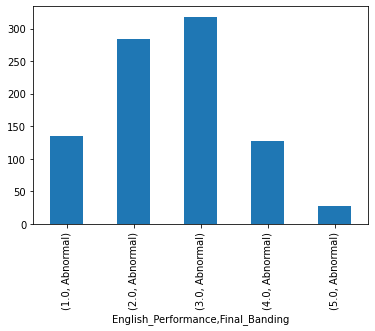

In [42]:
#Frequency Distribution & Central Tendency of Teachers perception of subject performance - English, Welsh, Maths, Science, A&D, Music, PE, ICT performance compared to mental health. 
Eng_Perf = IV1[['English_Performance', 'Final_Banding', 'Cohort_ID']]
Eng_Perf_0 = Eng_Perf[~Eng_Perf['Final_Banding'].str.contains('Normal')]
tpfreq1 = Eng_Perf_0.groupby(['English_Performance', 'Final_Banding']).size()
tpfreq1.plot.bar('English_Performance','Final_Banding')

print(check_score_perc(Eng_Perf, 'English_Performance', 'Final_Banding', 1))
print(check_score_perc(Eng_Perf, 'English_Performance', 'Final_Banding', 2))
print(check_score_perc(Eng_Perf, 'English_Performance', 'Final_Banding', 3))
print(check_score_perc(Eng_Perf, 'English_Performance', 'Final_Banding', 4))
print(check_score_perc(Eng_Perf, 'English_Performance', 'Final_Banding', 5))
print(check_band_perc(Eng_Perf, 'Final_Banding', 'English_Performance', 'Normal'))
print(check_band_perc(Eng_Perf, 'Final_Banding', 'English_Performance', 'Abnormal'))

Normal      84.808612
Abnormal    15.191388
Name: Final_Banding, dtype: float64
Normal      83.313033
Abnormal    16.686967
Name: Final_Banding, dtype: float64
Normal      79.987797
Abnormal    20.012203
Name: Final_Banding, dtype: float64
Normal      75.942549
Abnormal    24.057451
Name: Final_Banding, dtype: float64
Normal      77.941176
Abnormal    22.058824
Name: Final_Banding, dtype: float64
2.0    34.924687
3.0    33.469492
1.0    18.100587
4.0    10.799081
5.0     2.706153
Name: Maths_Performance, dtype: float64
3.0    36.730123
2.0    30.683091
4.0    15.005599
1.0    14.221725
5.0     3.359462
Name: Maths_Performance, dtype: float64


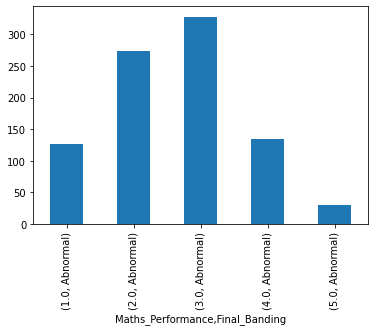

In [43]:
math_Perf = IV1[['Maths_Performance', 'Final_Banding', 'Cohort_ID']]
math_Perf_0 = math_Perf[~math_Perf['Final_Banding'].str.contains('Normal')]
tpfreq3 = math_Perf_0.groupby(['Maths_Performance', 'Final_Banding']).size()
tpfreq3.plot.bar('Maths_Performance','Final_Banding')

print(check_score_perc(math_Perf, 'Maths_Performance', 'Final_Banding', 1))
print(check_score_perc(math_Perf, 'Maths_Performance', 'Final_Banding', 2))
print(check_score_perc(math_Perf, 'Maths_Performance', 'Final_Banding', 3))
print(check_score_perc(math_Perf, 'Maths_Performance', 'Final_Banding', 4))
print(check_score_perc(math_Perf, 'Maths_Performance', 'Final_Banding', 5))
print(check_band_perc(math_Perf, 'Final_Banding', 'Maths_Performance', 'Normal'))
print(check_band_perc(math_Perf, 'Final_Banding', 'Maths_Performance', 'Abnormal'))

Normal      82.824427
Abnormal    17.175573
Name: Final_Banding, dtype: float64
Normal      83.626062
Abnormal    16.373938
Name: Final_Banding, dtype: float64
Normal      80.029586
Abnormal    19.970414
Name: Final_Banding, dtype: float64
Normal      76.385542
Abnormal    23.614458
Name: Final_Banding, dtype: float64
Normal      87.5
Abnormal    12.5
Name: Final_Banding, dtype: float64
3.0    41.477128
2.0    37.720419
1.0    11.091234
4.0     8.101201
5.0     1.610018
Name: Science_Performance, dtype: float64
3.0    45.454545
2.0    32.435466
4.0    10.998878
1.0    10.101010
5.0     1.010101
Name: Science_Performance, dtype: float64


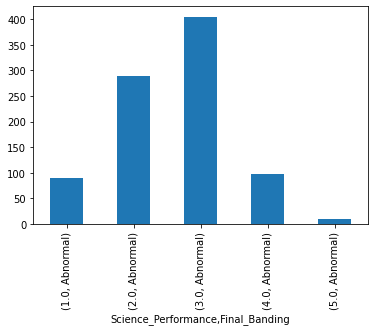

In [44]:
Science_Perf = IV1[['Science_Performance', 'Final_Banding', 'Cohort_ID']]
Science_Perf_0 = Science_Perf[~Science_Perf['Final_Banding'].str.contains('Normal')]
tpfreq4 = Science_Perf_0.groupby(['Science_Performance', 'Final_Banding']).size()
tpfreq4.plot.bar('Science_Performance','Final_Banding')

print(check_score_perc(Science_Perf, 'Science_Performance', 'Final_Banding', 1))
print(check_score_perc(Science_Perf, 'Science_Performance', 'Final_Banding', 2))
print(check_score_perc(Science_Perf, 'Science_Performance', 'Final_Banding', 3))
print(check_score_perc(Science_Perf, 'Science_Performance', 'Final_Banding', 4))
print(check_score_perc(Science_Perf, 'Science_Performance', 'Final_Banding', 5))
print(check_band_perc(Science_Perf, 'Final_Banding', 'Science_Performance', 'Normal'))
print(check_band_perc(Science_Perf, 'Final_Banding', 'Science_Performance', 'Abnormal'))

### Streaming
Consistently the number of low levels of mental health increases as you go down  through the streaming levels. 

Normal      82.262704
Abnormal    17.737296
Name: Final_Banding, dtype: float64
Normal      79.740681
Abnormal    20.259319
Name: Final_Banding, dtype: float64
Normal      78.055556
Abnormal    21.944444
Name: Final_Banding, dtype: float64
1.0    52.605763
2.0    30.165543
3.0    17.228694
Name: Set_English, dtype: float64
1.0    47.557841
2.0    32.133676
3.0    20.308483
Name: Set_English, dtype: float64


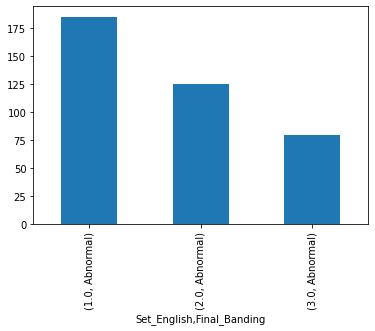

In [45]:
Set_English = IV1[['Set_English', 'Final_Banding', 'Cohort_ID']]
Set_English_0 = Set_English[~Set_English['Final_Banding'].str.contains('Normal')]
sfreq1 = Set_English_0.groupby(['Set_English', 'Final_Banding']).size()
sfreq1.plot.bar('Set_English','Final_Banding')

print(check_score_perc(Set_English, 'Set_English', 'Final_Banding', 1))
print(check_score_perc(Set_English, 'Set_English', 'Final_Banding', 2))
print(check_score_perc(Set_English, 'Set_English', 'Final_Banding', 3))
print(check_band_perc(Set_English, 'Final_Banding', 'Set_English', 'Normal'))
print(check_band_perc(Set_English, 'Final_Banding', 'Set_English', 'Abnormal'))

Normal      83.632982
Abnormal    16.367018
Name: Final_Banding, dtype: float64
Normal      79.072398
Abnormal    20.927602
Name: Final_Banding, dtype: float64
Normal      78.417266
Abnormal    21.582734
Name: Final_Banding, dtype: float64
1.0    54.307568
2.0    28.140097
3.0    17.552335
Name: Set_Maths, dtype: float64
1.0    46.397188
2.0    32.513181
3.0    21.089631
Name: Set_Maths, dtype: float64


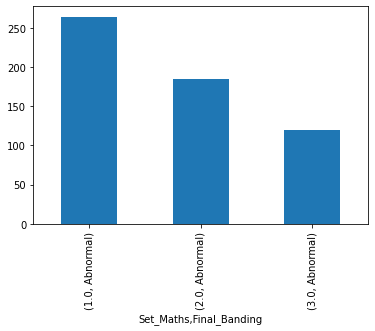

In [46]:
Set_Maths = IV1[['Set_Maths', 'Final_Banding', 'Cohort_ID']]
Set_Maths_0 = Set_Maths[~Set_Maths['Final_Banding'].str.contains('Normal')]
sfreq2 = Set_Maths_0.groupby(['Set_Maths', 'Final_Banding']).size()
sfreq2.plot.bar('Set_Maths','Final_Banding')

print(check_score_perc(Set_Maths, 'Set_Maths', 'Final_Banding', 1))
print(check_score_perc(Set_Maths, 'Set_Maths', 'Final_Banding', 2))
print(check_score_perc(Set_Maths, 'Set_Maths', 'Final_Banding', 3))
print(check_band_perc(Set_Maths, 'Final_Banding', 'Set_Maths', 'Normal'))
print(check_band_perc(Set_Maths, 'Final_Banding', 'Set_Maths', 'Abnormal'))

Normal      87.804878
Abnormal    12.195122
Name: Final_Banding, dtype: float64
Normal      81.730769
Abnormal    18.269231
Name: Final_Banding, dtype: float64
Normal      76.315789
Abnormal    23.684211
Name: Final_Banding, dtype: float64
1.0    55.813953
2.0    32.945736
3.0    11.240310
Name: Set_Science, dtype: float64
1.0    41.666667
2.0    39.583333
3.0    18.750000
Name: Set_Science, dtype: float64


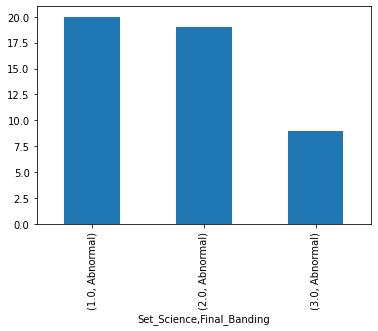

In [47]:
Set_Science = IV1[['Set_Science', 'Final_Banding', 'Cohort_ID']]
Set_Science_0 = Set_Science[~Set_Science['Final_Banding'].str.contains('Normal')]
sfreq3 = Set_Science_0.groupby(['Set_Science', 'Final_Banding']).size()
sfreq3.plot.bar('Set_Science','Final_Banding')

print(check_score_perc(Set_Science, 'Set_Science', 'Final_Banding', 1))
print(check_score_perc(Set_Science, 'Set_Science', 'Final_Banding', 2))
print(check_score_perc(Set_Science, 'Set_Science', 'Final_Banding', 3))
print(check_band_perc(Set_Science, 'Final_Banding', 'Set_Science', 'Normal'))
print(check_band_perc(Set_Science, 'Final_Banding', 'Set_Science', 'Abnormal'))

### CM Subject Performance (Age 11 & 14)

#### English

Normal      81.171735
Abnormal    18.828265
Name: Final_Banding, dtype: float64
Normal      82.307692
Abnormal    17.692308
Name: Final_Banding, dtype: float64
Normal      80.387931
Abnormal    19.612069
Name: Final_Banding, dtype: float64
Normal      72.847682
Abnormal    27.152318
Name: Final_Banding, dtype: float64
2.0    59.713424
1.0    27.375566
3.0    11.251885
4.0     1.659125
Name: s5_Good_English, dtype: float64
2.0    56.923077
1.0    28.160535
3.0    12.173913
4.0     2.742475
Name: s5_Good_English, dtype: float64


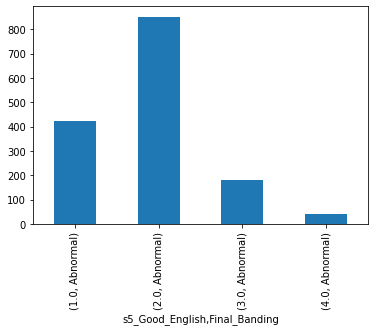

In [48]:
#1 - Strongly Agree, 4 - Strongly Disagree
s5_Good_English = IV1[['s5_Good_English', 'Final_Banding', 'Cohort_ID']]
s5_Good_English_0 = s5_Good_English[~s5_Good_English['Final_Banding'].str.contains('Normal')]
s5freq1 = s5_Good_English_0.groupby(['s5_Good_English', 'Final_Banding']).size()
s5freq1.plot.bar('s5_Good_English','Final_Banding')

print(check_score_perc(s5_Good_English, 's5_Good_English', 'Final_Banding', 1))
print(check_score_perc(s5_Good_English, 's5_Good_English', 'Final_Banding', 2))
print(check_score_perc(s5_Good_English, 's5_Good_English', 'Final_Banding', 3))
print(check_score_perc(s5_Good_English, 's5_Good_English', 'Final_Banding', 4))
print(check_band_perc(s5_Good_English, 'Final_Banding', 's5_Good_English', 'Normal'))
print(check_band_perc(s5_Good_English, 'Final_Banding', 's5_Good_English', 'Abnormal'))

Normal      75.655431
Abnormal    24.344569
Name: Final_Banding, dtype: float64
Normal      79.945799
Abnormal    20.054201
Name: Final_Banding, dtype: float64
Normal      83.00813
Abnormal    16.99187
Name: Final_Banding, dtype: float64
Normal      79.948849
Abnormal    20.051151
Name: Final_Banding, dtype: float64
2.0    60.647461
1.0    23.210573
3.0    13.142263
4.0     2.999703
Name: s6_Good_English, dtype: float64
2.0    55.181518
1.0    25.874587
3.0    14.653465
4.0     4.290429
Name: s6_Good_English, dtype: float64


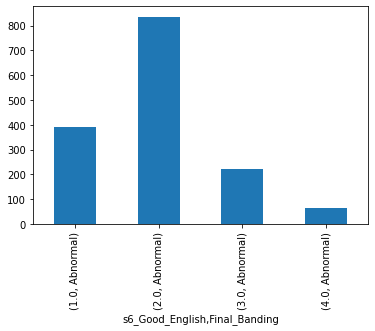

In [49]:
#1 - Strongly Disagree, 4 - Strongly Agree
s6_Good_English = IV1[['s6_Good_English', 'Final_Banding', 'Cohort_ID']]
s6_Good_English_0 = s6_Good_English[~s6_Good_English['Final_Banding'].str.contains('Normal')]
s6freq1 = s6_Good_English_0.groupby(['s6_Good_English', 'Final_Banding']).size()
s6freq1.plot.bar('s6_Good_English','Final_Banding')

print(check_score_perc(s6_Good_English, 's6_Good_English', 'Final_Banding', 4))
print(check_score_perc(s6_Good_English, 's6_Good_English', 'Final_Banding', 3))
print(check_score_perc(s6_Good_English, 's6_Good_English', 'Final_Banding', 2))
print(check_score_perc(s6_Good_English, 's6_Good_English', 'Final_Banding', 1))
print(check_band_perc(s6_Good_English, 'Final_Banding', 's6_Good_English', 'Normal'))
print(check_band_perc(s6_Good_English, 'Final_Banding', 's6_Good_English', 'Abnormal'))

#### Maths

Normal      83.279649
Abnormal    16.720351
Name: Final_Banding, dtype: float64
Normal      82.542694
Abnormal    17.457306
Name: Final_Banding, dtype: float64
Normal      75.03075
Abnormal    24.96925
Name: Final_Banding, dtype: float64
Normal      62.81407
Abnormal    37.18593
Name: Final_Banding, dtype: float64
2.0    45.969203
1.0    42.934783
3.0     9.208937
4.0     1.887077
Name: s5_Good_Maths, dtype: float64
2.0    43.163539
1.0    38.270777
3.0    13.605898
4.0     4.959786
Name: s5_Good_Maths, dtype: float64


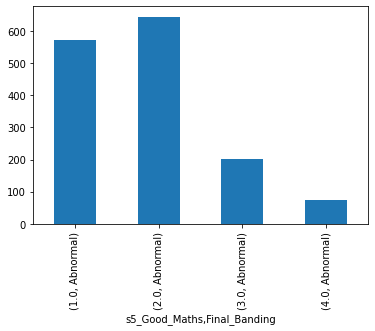

In [50]:
s5_Good_Maths = IV1[['s5_Good_Maths', 'Final_Banding', 'Cohort_ID']]
s5_Good_Maths_0 = s5_Good_Maths[~s5_Good_Maths['Final_Banding'].str.contains('Normal')]
s5freq2 = s5_Good_Maths_0.groupby(['s5_Good_Maths', 'Final_Banding']).size()
s5freq2.plot.bar('s5_Good_Maths','Final_Banding')

print(check_score_perc(s5_Good_Maths, 's5_Good_Maths', 'Final_Banding', 1))
print(check_score_perc(s5_Good_Maths, 's5_Good_Maths', 'Final_Banding', 2))
print(check_score_perc(s5_Good_Maths, 's5_Good_Maths', 'Final_Banding', 3))
print(check_score_perc(s5_Good_Maths, 's5_Good_Maths', 'Final_Banding', 4))
print(check_band_perc(s5_Good_Maths, 'Final_Banding', 's5_Good_Maths', 'Normal'))
print(check_band_perc(s5_Good_Maths, 'Final_Banding', 's5_Good_Maths', 'Abnormal'))

Normal      85.148936
Abnormal    14.851064
Name: Final_Banding, dtype: float64
Normal      82.58427
Abnormal    17.41573
Name: Final_Banding, dtype: float64
Normal      76.427406
Abnormal    23.572594
Name: Final_Banding, dtype: float64
Normal      66.997519
Abnormal    33.002481
Name: Final_Banding, dtype: float64
2.0    52.375297
1.0    29.706057
3.0    13.910333
4.0     4.008314
Name: s6_Good_Maths, dtype: float64
2.0    49.108911
1.0    23.036304
3.0    19.075908
4.0     8.778878
Name: s6_Good_Maths, dtype: float64


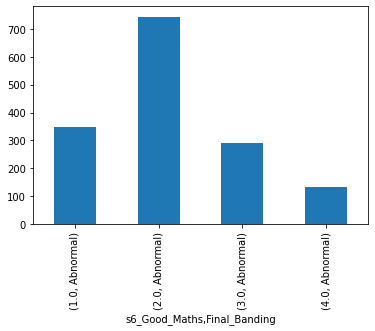

In [51]:
s6_Good_Maths = IV1[['s6_Good_Maths', 'Final_Banding', 'Cohort_ID']]
s6_Good_Maths_0 = s6_Good_Maths[~s6_Good_Maths['Final_Banding'].str.contains('Normal')]
s6freq2 = s6_Good_Maths_0.groupby(['s6_Good_Maths', 'Final_Banding']).size()
s6freq2.plot.bar('s6_Good_Maths','Final_Banding')

print(check_score_perc(s6_Good_Maths, 's6_Good_Maths', 'Final_Banding', 1))
print(check_score_perc(s6_Good_Maths, 's6_Good_Maths', 'Final_Banding', 2))
print(check_score_perc(s6_Good_Maths, 's6_Good_Maths', 'Final_Banding', 3))
print(check_score_perc(s6_Good_Maths, 's6_Good_Maths', 'Final_Banding', 4))
print(check_band_perc(s6_Good_Maths, 'Final_Banding', 's6_Good_Maths', 'Normal'))
print(check_band_perc(s6_Good_Maths, 'Final_Banding', 's6_Good_Maths', 'Abnormal'))

#### Science

Normal      82.12766
Abnormal    17.87234
Name: Final_Banding, dtype: float64
Normal      82.150727
Abnormal    17.849273
Name: Final_Banding, dtype: float64
Normal      81.076233
Abnormal    18.923767
Name: Final_Banding, dtype: float64
Normal      72.592593
Abnormal    27.407407
Name: Final_Banding, dtype: float64
2.0    56.785986
1.0    26.458492
3.0    13.769992
4.0     2.985529
Name: s5_Good_Science, dtype: float64
2.0    54.989817
1.0    25.661914
3.0    14.324508
4.0     5.023761
Name: s5_Good_Science, dtype: float64


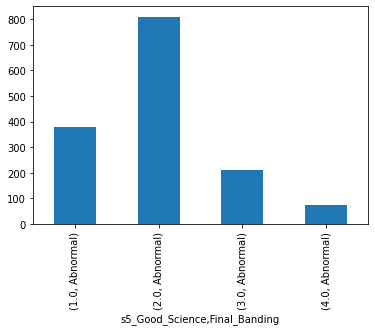

In [52]:
s5_Good_Science = IV1[['s5_Good_Science', 'Final_Banding', 'Cohort_ID']]
s5_Good_Science_0 = s5_Good_Science[~s5_Good_Science['Final_Banding'].str.contains('Normal')]
s5freq3 = s5_Good_Science_0.groupby(['s5_Good_Science', 'Final_Banding']).size()
s5freq3.plot.bar('s5_Good_Science','Final_Banding')

print(check_score_perc(s5_Good_Science, 's5_Good_Science', 'Final_Banding', 1))
print(check_score_perc(s5_Good_Science, 's5_Good_Science', 'Final_Banding', 2))
print(check_score_perc(s5_Good_Science, 's5_Good_Science', 'Final_Banding', 3))
print(check_score_perc(s5_Good_Science, 's5_Good_Science', 'Final_Banding', 4))
print(check_band_perc(s5_Good_Science, 'Final_Banding', 's5_Good_Science', 'Normal'))
print(check_band_perc(s5_Good_Science, 'Final_Banding', 's5_Good_Science', 'Abnormal'))

Normal      75.975976
Abnormal    24.024024
Name: Final_Banding, dtype: float64
Normal      79.059181
Abnormal    20.940819
Name: Final_Banding, dtype: float64
Normal      81.529385
Abnormal    18.470615
Name: Final_Banding, dtype: float64
Normal      84.217749
Abnormal    15.782251
Name: Final_Banding, dtype: float64
2.0    53.395750
1.0    27.359192
3.0    15.485213
4.0     3.759845
Name: s6_Good_Science, dtype: float64
2.0    53.729373
1.0    22.772277
3.0    18.217822
4.0     5.280528
Name: s6_Good_Science, dtype: float64


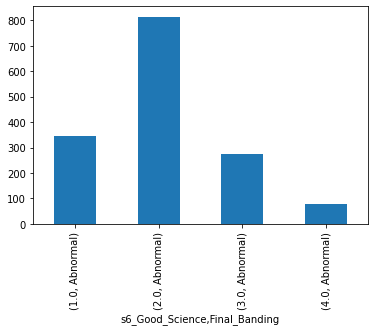

In [53]:
s6_Good_Science = IV1[['s6_Good_Science', 'Final_Banding', 'Cohort_ID']]
s6_Good_Science_0 = s6_Good_Science[~s6_Good_Science['Final_Banding'].str.contains('Normal')]
s6freq3 = s6_Good_Science_0.groupby(['s6_Good_Science', 'Final_Banding']).size()
s6freq3.plot.bar('s6_Good_Science','Final_Banding')

print(check_score_perc(s6_Good_Science, 's6_Good_Science', 'Final_Banding', 4))
print(check_score_perc(s6_Good_Science, 's6_Good_Science', 'Final_Banding', 3))
print(check_score_perc(s6_Good_Science, 's6_Good_Science', 'Final_Banding', 2))
print(check_score_perc(s6_Good_Science, 's6_Good_Science', 'Final_Banding', 1))
print(check_band_perc(s6_Good_Science, 'Final_Banding', 's6_Good_Science', 'Normal'))
print(check_band_perc(s6_Good_Science, 'Final_Banding', 's6_Good_Science', 'Abnormal'))

### Age 17 Qualifications Grades

I will just be looking at GCSE, National 5 and BTEC as they have the most samples and also are the most likely to have been completed at this age category.

It should also be noted, that those who have not aquired these qualifications could be due to not coming from the relevent country, as can be distinctly seen in the National 5, rather then someone having failed to achieve these grade. 

#### GCSE

Normal      82.096684
Abnormal    17.903316
Name: Final_Banding, dtype: float64
Normal      78.73042
Abnormal    21.26958
Name: Final_Banding, dtype: float64
1.0    85.949684
2.0    14.050316
Name: Qual_GCSE, dtype: float64
1.0    83.159269
2.0    16.840731
Name: Qual_GCSE, dtype: float64


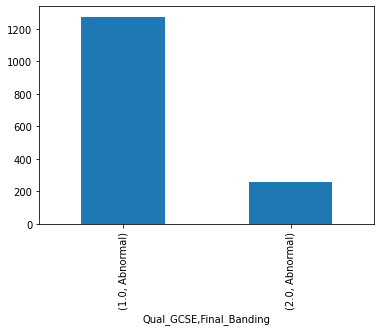

In [54]:
# 1 = GCSE, 2 = No
Qual_GCSE = IV1[['Qual_GCSE', 'Final_Banding', 'Cohort_ID']]
Qual_GCSE_0 = Qual_GCSE[~Qual_GCSE['Final_Banding'].str.contains('Normal')]
qfreq1 = Qual_GCSE_0.groupby(['Qual_GCSE', 'Final_Banding']).size()
qfreq1.plot.bar('Qual_GCSE','Final_Banding')

print(check_score_perc(Qual_GCSE, 'Qual_GCSE', 'Final_Banding', 1))
print(check_score_perc(Qual_GCSE, 'Qual_GCSE', 'Final_Banding', 2))
print(check_band_perc(Qual_GCSE, 'Final_Banding', 'Qual_GCSE', 'Normal'))
print(check_band_perc(Qual_GCSE, 'Final_Banding', 'Qual_GCSE', 'Abnormal'))

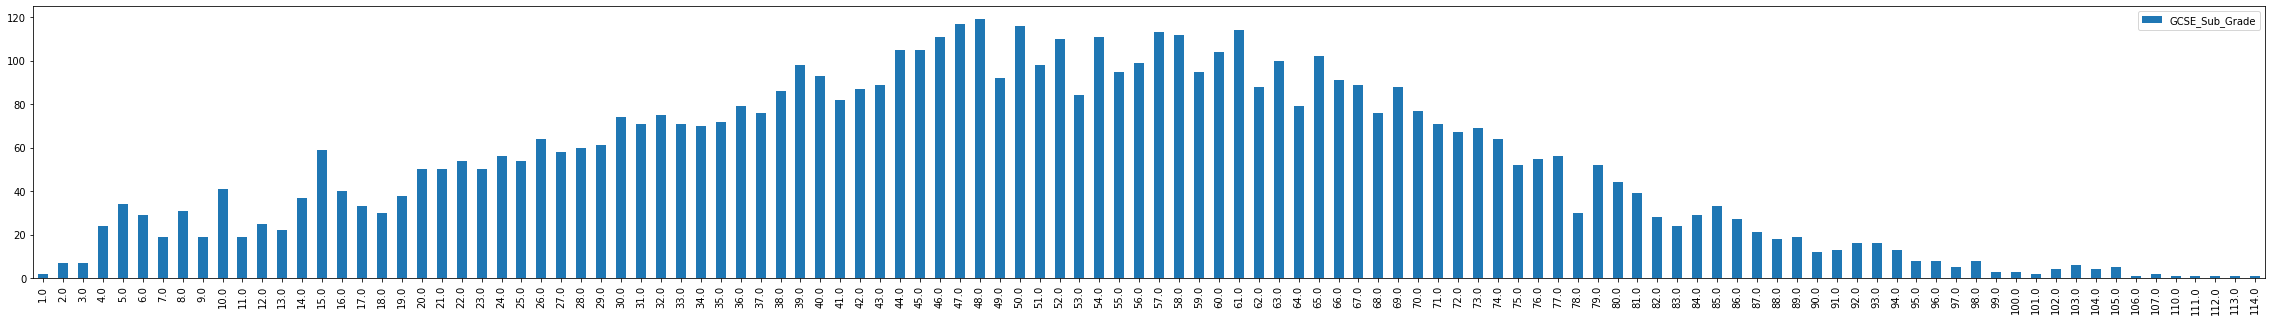

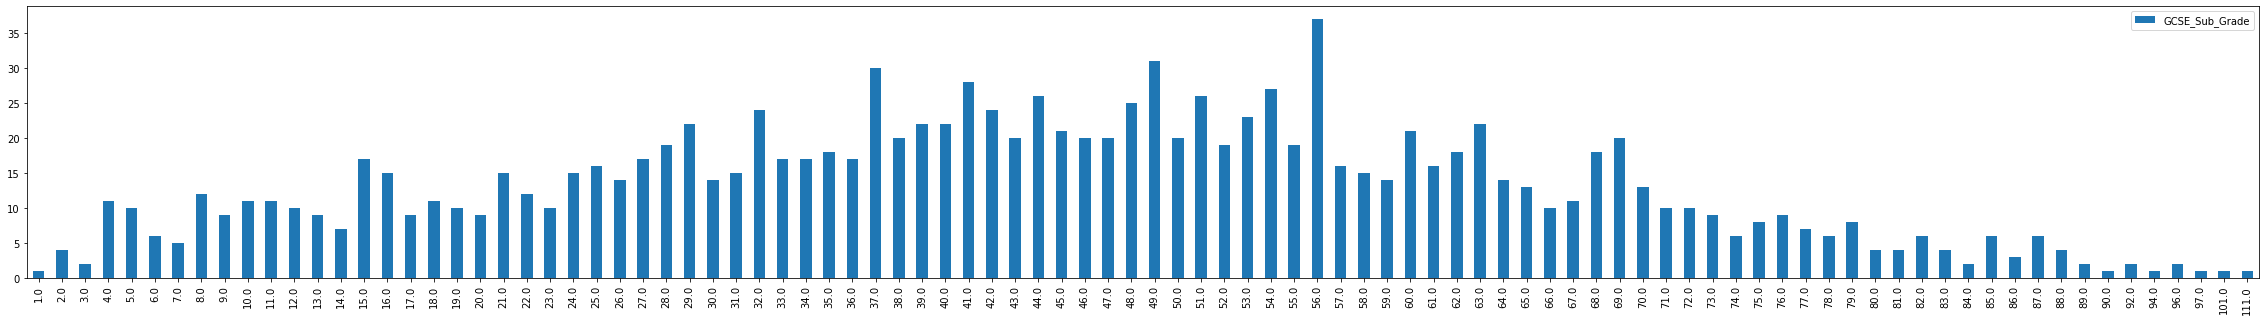

In [55]:
Grade_GCSE = IV1[['GCSE_Sub_Grade', 'Final_Banding', 'Cohort_ID']]
GCSE_Normal = Grade_GCSE[Grade_GCSE['Final_Banding'] == 'Normal']
GCSE_Borderline = Grade_GCSE[Grade_GCSE['Final_Banding'] == 'Borderline']
GCSE_Abnormal = Grade_GCSE[Grade_GCSE['Final_Banding'] == 'Abnormal']
qfreq2_0 = GCSE_Normal['GCSE_Sub_Grade'].value_counts()
qfreq2 = pd.DataFrame(qfreq2_0)
qfreq2 = qfreq2.sort_index()
qfreq2.plot.bar(figsize=(40,5))

qfreq4_0 = GCSE_Abnormal['GCSE_Sub_Grade'].value_counts()
qfreq4 = pd.DataFrame(qfreq4_0)
qfreq4 = qfreq4.sort_index()
qfreq4.plot.bar(figsize=(40,5))

#### BTEC

Normal      79.409538
Abnormal    20.590462
Name: Final_Banding, dtype: float64
Normal      82.020548
Abnormal    17.979452
Name: Final_Banding, dtype: float64
2.0    84.566721
1.0    15.433279
Name: Qual_BTEC, dtype: float64
2.0    82.245431
1.0    17.754569
Name: Qual_BTEC, dtype: float64


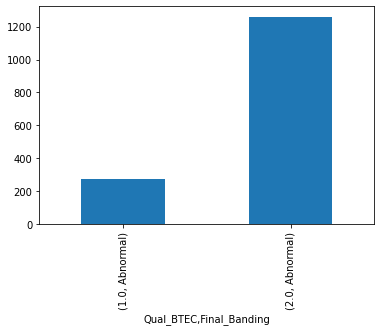

In [56]:
#1 - Btec, 2 - No
Qual_BTEC = IV1[['Qual_BTEC', 'Final_Banding', 'Cohort_ID']]
Qual_BTEC_0 = Qual_BTEC[~Qual_BTEC['Final_Banding'].str.contains('Normal')]
qfreq9 = Qual_BTEC_0.groupby(['Qual_BTEC', 'Final_Banding']).size()
qfreq9.plot.bar('Qual_BTEC','Final_Banding')

print(check_score_perc(Qual_BTEC, 'Qual_BTEC', 'Final_Banding', 1))
print(check_score_perc(Qual_BTEC, 'Qual_BTEC', 'Final_Banding', 2))
print(check_band_perc(Qual_BTEC, 'Final_Banding', 'Qual_BTEC', 'Normal'))
print(check_band_perc(Qual_BTEC, 'Final_Banding', 'Qual_BTEC', 'Abnormal'))

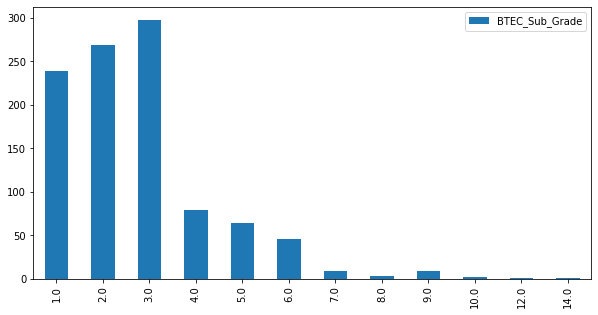

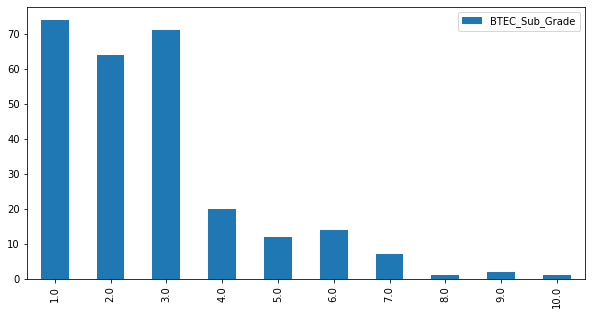

In [57]:
Grade_BTEC = IV1[['BTEC_Sub_Grade', 'Final_Banding', 'Cohort_ID']]
BTEC_Normal = Grade_BTEC[Grade_BTEC['Final_Banding'] == 'Normal']
BTEC_Borderline = Grade_BTEC[Grade_BTEC['Final_Banding'] == 'Borderline']
BTEC_Abnormal = Grade_BTEC[Grade_BTEC['Final_Banding'] == 'Abnormal']
qfreq6_0 = BTEC_Normal['BTEC_Sub_Grade'].value_counts()
qfreq6 = pd.DataFrame(qfreq6_0)
qfreq6 = qfreq6.sort_index()
qfreq6.plot.bar(figsize=(10,5))

qfreq8_0 = BTEC_Abnormal['BTEC_Sub_Grade'].value_counts()
qfreq8 = pd.DataFrame(qfreq8_0)
qfreq8 = qfreq8.sort_index()
qfreq8.plot.bar(figsize=(10,5))

##Attitude towards School



* s5 CMs percieved attitude towards school by teacher (Enjoys it, bored, tries best, misbehaves, hands in late homework)
* s5 Parents percived CM's attitude towards school (Enjoys, bored)
* s5 How much is Cm looking forward to secondary school
* s5 How much CM enjoys subjects (School, English, Welsh, Maths, Science, PE)
* s5 CM reported attitude towards school (Tries best, finds interesting, unhappy, tired, waste of time)
* s5 CM reported excitement for going to secondary school
* s5 How much CM cares about doing well in school 
* s6 CMs feelings surronding school (tries best, finds it interesting, unhappy, gets tired, waste of time, difficult to keep mind on work)
* s6 How Happy CM is with School and School Work

In [58]:
Attitude = all_data[['Enjoys_School', 'Bored_School', 'Tries_School', 'Late_Homework_School', 's5_CM_Enjoys_School', 's5_CM_Bored_School', 's5_CM_Excited_SecondSchool', 's5_Like_School', 's5_Like_English',
                     's5_Like_Welsh', 's5_Like_Maths', 's5_Like_Science', 's5_Like_PE', 's5_Try_School', 's5_School_Interesting', 's5_Unhappy_School', 's5_Tired_School', 's5_School_Waste', 's5_Excited_For_SecondSchool',
                     's5_Care_School_Achievement', 's6_Try_School', 's6_School_Interesting', 's6_Unhappy_School', 's6_Tired_School', 's6_School_Waste', 's6_Keep_Mind_School', 's6_Happy_School_Work', 's6_Happy_School',
                     'Cohort_ID']]

IV2 = Attitude.merge(DV, on='Cohort_ID')

### Percieved CM Attitude

#### Enjoys School

Normal      83.449477
Abnormal    16.550523
Name: Final_Banding, dtype: float64
Normal      80.027236
Abnormal    19.972764
Name: Final_Banding, dtype: float64
Normal      78.328173
Abnormal    21.671827
Name: Final_Banding, dtype: float64
Normal      66.666667
Abnormal    33.333333
Name: Final_Banding, dtype: float64
1.0    48.654139
2.0    44.768918
3.0     6.424581
4.0     0.152362
Name: Enjoys_School, dtype: float64
2.0    49.272116
1.0    42.553191
3.0     7.838746
4.0     0.335946
Name: Enjoys_School, dtype: float64


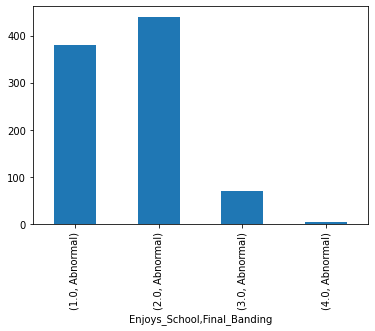

In [59]:
#1 - Always, 4 - Never
Enjoys_School = IV2[['Enjoys_School', 'Final_Banding', 'Cohort_ID']]
Enjoys_School_0 = Enjoys_School[~Enjoys_School['Final_Banding'].str.contains('Normal')]
pafreq1 = Enjoys_School_0.groupby(['Enjoys_School', 'Final_Banding']).size()
pafreq1.plot.bar('Enjoys_School', 'Final_Banding')

print(check_score_perc(Enjoys_School, 'Enjoys_School', 'Final_Banding', 1))
print(check_score_perc(Enjoys_School, 'Enjoys_School', 'Final_Banding', 2))
print(check_score_perc(Enjoys_School, 'Enjoys_School', 'Final_Banding', 3))
print(check_score_perc(Enjoys_School, 'Enjoys_School', 'Final_Banding', 4))
print(check_band_perc(Enjoys_School, 'Final_Banding', 'Enjoys_School', 'Normal'))
print(check_band_perc(Enjoys_School, 'Final_Banding', 'Enjoys_School', 'Abnormal'))

Normal      84.132311
Abnormal    15.867689
Name: Final_Banding, dtype: float64
Normal      79.86225
Abnormal    20.13775
Name: Final_Banding, dtype: float64
Normal      74.226804
Abnormal    25.773196
Name: Final_Banding, dtype: float64
Normal      58.181818
Abnormal    41.818182
Name: Final_Banding, dtype: float64
1.0    55.388985
2.0    38.425122
3.0     5.680922
4.0     0.504971
Name: s5_CM_Enjoys_School, dtype: float64
1.0    46.488764
2.0    43.117978
3.0     8.778090
4.0     1.615169
Name: s5_CM_Enjoys_School, dtype: float64


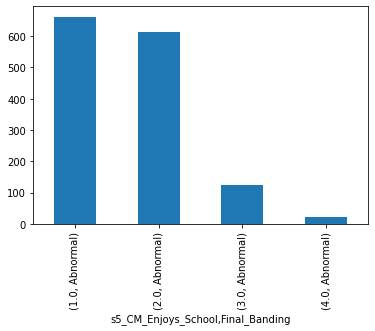

In [60]:
s5_CM_Enjoys_School = IV2[['s5_CM_Enjoys_School', 'Final_Banding', 'Cohort_ID']]
s5_CM_Enjoys_School_0 = s5_CM_Enjoys_School[~s5_CM_Enjoys_School['Final_Banding'].str.contains('Normal')]
pafreq2 = s5_CM_Enjoys_School_0.groupby(['s5_CM_Enjoys_School', 'Final_Banding']).size()
pafreq2.plot.bar('s5_CM_Enjoys_School', 'Final_Banding')

print(check_score_perc(s5_CM_Enjoys_School, 's5_CM_Enjoys_School', 'Final_Banding', 1))
print(check_score_perc(s5_CM_Enjoys_School, 's5_CM_Enjoys_School', 'Final_Banding', 2))
print(check_score_perc(s5_CM_Enjoys_School, 's5_CM_Enjoys_School', 'Final_Banding', 3))
print(check_score_perc(s5_CM_Enjoys_School, 's5_CM_Enjoys_School', 'Final_Banding', 4))

print(check_band_perc(s5_CM_Enjoys_School, 'Final_Banding', 's5_CM_Enjoys_School', 'Normal'))
print(check_band_perc(s5_CM_Enjoys_School, 'Final_Banding', 's5_CM_Enjoys_School', 'Abnormal'))

#### Bored at School

Normal      87.5
Abnormal    12.5
Name: Final_Banding, dtype: float64
Normal      78.846154
Abnormal    21.153846
Name: Final_Banding, dtype: float64
Normal      81.38551
Abnormal    18.61449
Name: Final_Banding, dtype: float64
Normal      81.631919
Abnormal    18.368081
Name: Final_Banding, dtype: float64
4.0    57.830405
3.0    39.190222
2.0     2.088108
1.0     0.891266
Name: Bored_School, dtype: float64
4.0    57.415730
3.0    39.550562
2.0     2.471910
1.0     0.561798
Name: Bored_School, dtype: float64


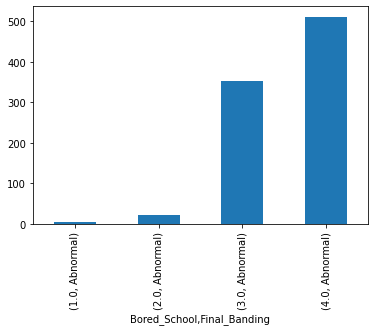

In [61]:
Bored_School = IV2[['Bored_School', 'Final_Banding', 'Cohort_ID']]
Bored_School_0 = Bored_School[~Bored_School['Final_Banding'].str.contains('Normal')]
pafreq3 = Bored_School_0.groupby(['Bored_School', 'Final_Banding']).size()
pafreq3.plot.bar('Bored_School', 'Final_Banding')

print(check_score_perc(Bored_School, 'Bored_School', 'Final_Banding', 1))
print(check_score_perc(Bored_School, 'Bored_School', 'Final_Banding', 2))
print(check_score_perc(Bored_School, 'Bored_School', 'Final_Banding', 3))
print(check_score_perc(Bored_School, 'Bored_School', 'Final_Banding', 4))

print(check_band_perc(Bored_School, 'Final_Banding', 'Bored_School', 'Normal'))
print(check_band_perc(Bored_School, 'Final_Banding', 'Bored_School', 'Abnormal'))

Normal      75.700935
Abnormal    24.299065
Name: Final_Banding, dtype: float64
Normal      73.208723
Abnormal    26.791277
Name: Final_Banding, dtype: float64
Normal      80.937042
Abnormal    19.062958
Name: Final_Banding, dtype: float64
Normal      83.146067
Abnormal    16.853933
Name: Final_Banding, dtype: float64
4.0    51.388889
3.0    43.623737
2.0     3.708965
1.0     1.278409
Name: s5_CM_Bored_School, dtype: float64
4.0    46.380885
3.0    45.748419
2.0     6.043570
1.0     1.827126
Name: s5_CM_Bored_School, dtype: float64


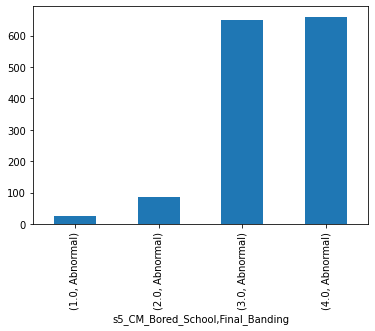

In [62]:
#1 - Always, 4 - Never
s5_CM_Bored_School = IV2[['s5_CM_Bored_School', 'Final_Banding', 'Cohort_ID']]
s5_CM_Bored_School_0 = s5_CM_Bored_School[~s5_CM_Bored_School['Final_Banding'].str.contains('Normal')]
pafreq4 = s5_CM_Bored_School_0.groupby(['s5_CM_Bored_School', 'Final_Banding']).size()
pafreq4.plot.bar('s5_CM_Bored_School', 'Final_Banding')

print(check_score_perc(s5_CM_Bored_School, 's5_CM_Bored_School', 'Final_Banding', 1))
print(check_score_perc(s5_CM_Bored_School, 's5_CM_Bored_School', 'Final_Banding', 2))
print(check_score_perc(s5_CM_Bored_School, 's5_CM_Bored_School', 'Final_Banding', 3))
print(check_score_perc(s5_CM_Bored_School, 's5_CM_Bored_School', 'Final_Banding', 4))

print(check_band_perc(s5_CM_Bored_School, 'Final_Banding', 's5_CM_Bored_School', 'Normal'))
print(check_band_perc(s5_CM_Bored_School, 'Final_Banding', 's5_CM_Bored_School', 'Abnormal'))

#### Tries at School

Normal      82.285472
Abnormal    17.714528
Name: Final_Banding, dtype: float64
Normal      81.044386
Abnormal    18.955614
Name: Final_Banding, dtype: float64
Normal      79.67033
Abnormal    20.32967
Name: Final_Banding, dtype: float64
Normal      81.25
Abnormal    18.75
Name: Final_Banding, dtype: float64
1.0    49.199898
2.0    39.420879
3.0    11.049022
4.0     0.330201
Name: Tries_School, dtype: float64
1.0    46.644295
2.0    40.604027
3.0    12.416107
4.0     0.335570
Name: Tries_School, dtype: float64


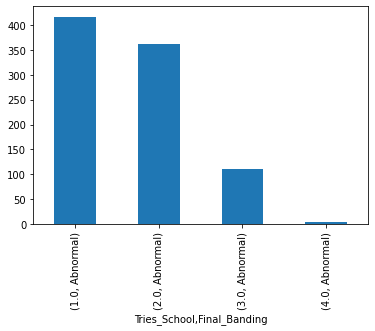

In [63]:
Tries_School = IV2[['Tries_School', 'Final_Banding', 'Cohort_ID']]
Tries_School_0 = Tries_School[~Tries_School['Final_Banding'].str.contains('Normal')]
pafreq5 = Tries_School_0.groupby(['Tries_School', 'Final_Banding']).size()
pafreq5.plot.bar('Tries_School', 'Final_Banding')

print(check_score_perc(Tries_School, 'Tries_School', 'Final_Banding', 1))
print(check_score_perc(Tries_School, 'Tries_School', 'Final_Banding', 2))
print(check_score_perc(Tries_School, 'Tries_School', 'Final_Banding', 3))
print(check_score_perc(Tries_School, 'Tries_School', 'Final_Banding', 4))

print(check_band_perc(Tries_School, 'Final_Banding', 'Tries_School', 'Normal'))
print(check_band_perc(Tries_School, 'Final_Banding', 'Tries_School', 'Abnormal'))

#### Hands Homework in Late

Normal      79.470199
Abnormal    20.529801
Name: Final_Banding, dtype: float64
Normal      78.745645
Abnormal    21.254355
Name: Final_Banding, dtype: float64
Normal      81.860465
Abnormal    18.139535
Name: Final_Banding, dtype: float64
Normal      82.076464
Abnormal    17.923536
Name: Final_Banding, dtype: float64
4.0    59.724349
3.0    31.444615
2.0     5.768249
1.0     3.062787
Name: Late_Homework_School, dtype: float64
4.0    58.333333
3.0    31.164384
2.0     6.963470
1.0     3.538813
Name: Late_Homework_School, dtype: float64


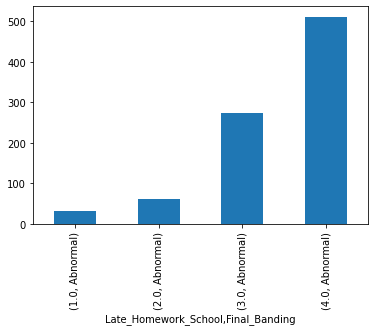

In [64]:
Late_Homework_School = IV2[['Late_Homework_School', 'Final_Banding', 'Cohort_ID']]
Late_Homework_School_0 = Late_Homework_School[~Late_Homework_School['Final_Banding'].str.contains('Normal')]
pafreq7 = Late_Homework_School_0.groupby(['Late_Homework_School', 'Final_Banding']).size()
pafreq7.plot.bar('Late_Homework_School', 'Final_Banding')

print(check_score_perc(Late_Homework_School, 'Late_Homework_School', 'Final_Banding', 1))
print(check_score_perc(Late_Homework_School, 'Late_Homework_School', 'Final_Banding', 2))
print(check_score_perc(Late_Homework_School, 'Late_Homework_School', 'Final_Banding', 3))
print(check_score_perc(Late_Homework_School, 'Late_Homework_School', 'Final_Banding', 4))

print(check_band_perc(Late_Homework_School, 'Final_Banding', 'Late_Homework_School', 'Normal'))
print(check_band_perc(Late_Homework_School, 'Final_Banding', 'Late_Homework_School', 'Abnormal'))

#### Excited for Secondary School

Normal      82.854261
Abnormal    17.145739
Name: Final_Banding, dtype: float64
Normal      81.232591
Abnormal    18.767409
Name: Final_Banding, dtype: float64
Normal      75.921909
Abnormal    24.078091
Name: Final_Banding, dtype: float64
Normal      73.394495
Abnormal    26.605505
Name: Final_Banding, dtype: float64
 1.0    54.296100
 2.0    38.549240
 3.0     5.783212
 4.0     1.321877
-3.0     0.049570
Name: s5_CM_Excited_SecondSchool, dtype: float64
1.0    50.036792
2.0    39.661516
3.0     8.167770
4.0     2.133922
Name: s5_CM_Excited_SecondSchool, dtype: float64


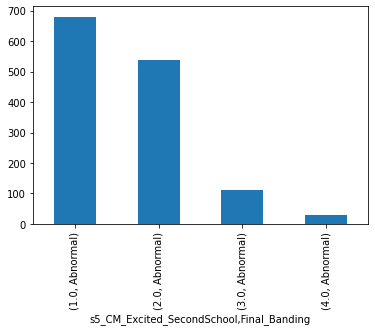

In [65]:
#1 - Great Deal, 4 - Not at all
s5_CM_Excited_SecondSchool = IV2[['s5_CM_Excited_SecondSchool', 'Final_Banding', 'Cohort_ID']]
s5_CM_Excited_SecondSchool_0 = s5_CM_Excited_SecondSchool[~s5_CM_Excited_SecondSchool['Final_Banding'].str.contains('Normal')]
pafreq8 = s5_CM_Excited_SecondSchool_0.groupby(['s5_CM_Excited_SecondSchool', 'Final_Banding']).size()
pafreq8.plot.bar('s5_CM_Excited_SecondSchool', 'Final_Banding')

print(check_score_perc(s5_CM_Excited_SecondSchool, 's5_CM_Excited_SecondSchool', 'Final_Banding', 1))
print(check_score_perc(s5_CM_Excited_SecondSchool, 's5_CM_Excited_SecondSchool', 'Final_Banding', 2))
print(check_score_perc(s5_CM_Excited_SecondSchool, 's5_CM_Excited_SecondSchool', 'Final_Banding', 3))
print(check_score_perc(s5_CM_Excited_SecondSchool, 's5_CM_Excited_SecondSchool', 'Final_Banding', 4))

print(check_band_perc(s5_CM_Excited_SecondSchool, 'Final_Banding', 's5_CM_Excited_SecondSchool', 'Normal'))
print(check_band_perc(s5_CM_Excited_SecondSchool, 'Final_Banding', 's5_CM_Excited_SecondSchool', 'Abnormal'))

### CM Enjoyment of Subjects

Normal      82.988276
Abnormal    17.011724
Name: Final_Banding, dtype: float64
Normal      81.234964
Abnormal    18.765036
Name: Final_Banding, dtype: float64
Normal      70.588235
Abnormal    29.411765
Name: Final_Banding, dtype: float64
1.0    50.180995
2.0    45.837104
3.0     3.981900
Name: s5_Like_School, dtype: float64
2.0    46.987952
1.0    45.649264
3.0     7.362784
Name: s5_Like_School, dtype: float64


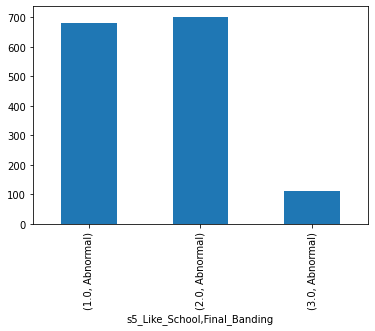

In [66]:
#1 - A Lot, 3 - Not at All
s5_Like_School = IV2[['s5_Like_School', 'Final_Banding', 'Cohort_ID']]
s5_Like_School_0 = s5_Like_School[~s5_Like_School['Final_Banding'].str.contains('Normal')]
cmefreq1 = s5_Like_School_0.groupby(['s5_Like_School', 'Final_Banding']).size()
cmefreq1.plot.bar('s5_Like_School', 'Final_Banding')

print(check_score_perc(s5_Like_School, 's5_Like_School', 'Final_Banding', 1))
print(check_score_perc(s5_Like_School, 's5_Like_School', 'Final_Banding', 2))
print(check_score_perc(s5_Like_School, 's5_Like_School', 'Final_Banding', 3))

print(check_band_perc(s5_Like_School, 'Final_Banding', 's5_Like_School', 'Normal'))
print(check_band_perc(s5_Like_School, 'Final_Banding', 's5_Like_School', 'Abnormal'))

Normal      81.326852
Abnormal    18.673148
Name: Final_Banding, dtype: float64
Normal      82.477111
Abnormal    17.522889
Name: Final_Banding, dtype: float64
Normal      78.062678
Abnormal    21.937322
Name: Final_Banding, dtype: float64
2.0    48.877167
1.0    42.863602
3.0     8.259231
Name: s5_Like_English, dtype: float64
2.0    46.056150
1.0    43.649733
3.0    10.294118
Name: s5_Like_English, dtype: float64


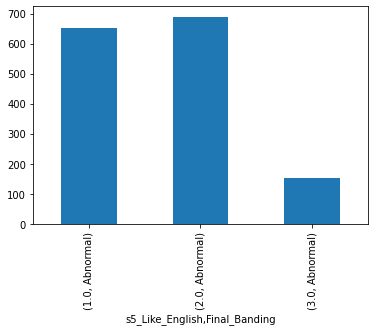

In [67]:
s5_Like_English = IV2[['s5_Like_English', 'Final_Banding', 'Cohort_ID']]
s5_Like_English_0 = s5_Like_English[~s5_Like_English['Final_Banding'].str.contains('Normal')]
cmefreq2 = s5_Like_English_0.groupby(['s5_Like_English', 'Final_Banding']).size()
cmefreq2.plot.bar('s5_Like_English', 'Final_Banding')

print(check_score_perc(s5_Like_English, 's5_Like_English', 'Final_Banding', 1))
print(check_score_perc(s5_Like_English, 's5_Like_English', 'Final_Banding', 2))
print(check_score_perc(s5_Like_English, 's5_Like_English', 'Final_Banding', 3))

print(check_band_perc(s5_Like_English, 'Final_Banding', 's5_Like_English', 'Normal'))
print(check_band_perc(s5_Like_English, 'Final_Banding', 's5_Like_English', 'Abnormal'))

Normal      83.018428
Abnormal    16.981572
Name: Final_Banding, dtype: float64
Normal      81.946265
Abnormal    18.053735
Name: Final_Banding, dtype: float64
Normal      72.986369
Abnormal    27.013631
Name: Final_Banding, dtype: float64
1.0    53.526846
2.0    37.614679
3.0     8.858475
Name: s5_Like_Maths, dtype: float64
1.0    48.630595
2.0    36.806947
3.0    14.562458
Name: s5_Like_Maths, dtype: float64


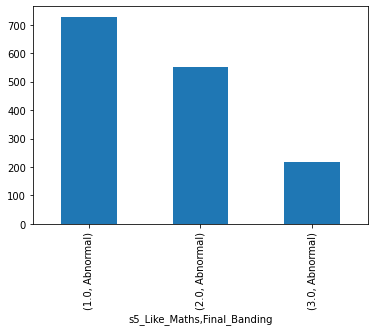

In [68]:
s5_Like_Maths = IV2[['s5_Like_Maths', 'Final_Banding', 'Cohort_ID']]
s5_Like_Maths_0 = s5_Like_Maths[~s5_Like_Maths['Final_Banding'].str.contains('Normal')]
cmefreq3 = s5_Like_Maths_0.groupby(['s5_Like_Maths', 'Final_Banding']).size()
cmefreq3.plot.bar('s5_Like_Maths', 'Final_Banding')

print(check_score_perc(s5_Like_Maths, 's5_Like_Maths', 'Final_Banding', 1))
print(check_score_perc(s5_Like_Maths, 's5_Like_Maths', 'Final_Banding', 2))
print(check_score_perc(s5_Like_Maths, 's5_Like_Maths', 'Final_Banding', 3))

print(check_band_perc(s5_Like_Maths, 'Final_Banding', 's5_Like_Maths', 'Normal'))
print(check_band_perc(s5_Like_Maths, 'Final_Banding', 's5_Like_Maths', 'Abnormal'))

Normal      81.244859
Abnormal    18.755141
Name: Final_Banding, dtype: float64
Normal      82.713964
Abnormal    17.286036
Name: Final_Banding, dtype: float64
Normal      78.742857
Abnormal    21.257143
Name: Final_Banding, dtype: float64
1.0    44.962064
2.0    44.582701
3.0    10.455235
Name: s5_Like_Science, dtype: float64
1.0    46.091644
2.0    41.374663
3.0    12.533693
Name: s5_Like_Science, dtype: float64


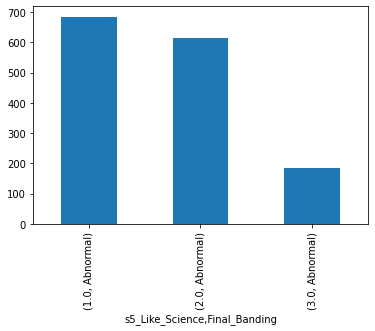

In [69]:
s5_Like_Science = IV2[['s5_Like_Science', 'Final_Banding', 'Cohort_ID']]
s5_Like_Science_0 = s5_Like_Science[~s5_Like_Science['Final_Banding'].str.contains('Normal')]
cmefreq4 = s5_Like_Science_0.groupby(['s5_Like_Science', 'Final_Banding']).size()
cmefreq4.plot.bar('s5_Like_Science', 'Final_Banding')

print(check_score_perc(s5_Like_Science, 's5_Like_Science', 'Final_Banding', 1))
print(check_score_perc(s5_Like_Science, 's5_Like_Science', 'Final_Banding', 2))
print(check_score_perc(s5_Like_Science, 's5_Like_Science', 'Final_Banding', 3))

print(check_band_perc(s5_Like_Science, 'Final_Banding', 's5_Like_Science', 'Normal'))
print(check_band_perc(s5_Like_Science, 'Final_Banding', 's5_Like_Science', 'Abnormal'))

### CM Attitude to School

####Tries Hardest

Normal      81.812474
Abnormal    18.187526
Name: Final_Banding, dtype: float64
Normal      81.84466
Abnormal    18.15534
Name: Final_Banding, dtype: float64
Normal      78.174603
Abnormal    21.825397
Name: Final_Banding, dtype: float64
Normal      54.166667
Abnormal    45.833333
Name: Final_Banding, dtype: float64
1.0    58.799639
2.0    38.041516
3.0     2.963297
4.0     0.195548
Name: s5_Try_School, dtype: float64
1.0    58.088235
2.0    37.500000
3.0     3.676471
4.0     0.735294
Name: s5_Try_School, dtype: float64


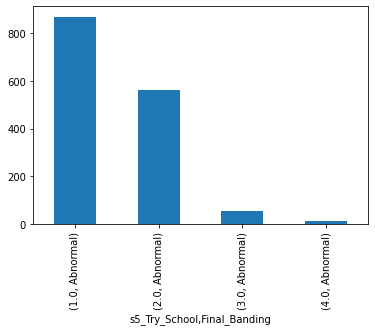

In [70]:
#1 - All the Time, 4 - Never
s5_Try_School = IV2[['s5_Try_School', 'Final_Banding', 'Cohort_ID']]
s5_Try_School_0 = s5_Try_School[~s5_Try_School['Final_Banding'].str.contains('Normal')]
cmafreq1 = s5_Try_School_0.groupby(['s5_Try_School', 'Final_Banding']).size()
cmafreq1.plot.bar('s5_Try_School', 'Final_Banding')

print(check_score_perc(s5_Try_School, 's5_Try_School', 'Final_Banding', 1))
print(check_score_perc(s5_Try_School, 's5_Try_School', 'Final_Banding', 2))
print(check_score_perc(s5_Try_School, 's5_Try_School', 'Final_Banding', 3))
print(check_score_perc(s5_Try_School, 's5_Try_School', 'Final_Banding', 4))

print(check_band_perc(s5_Try_School, 'Final_Banding', 's5_Try_School', 'Normal'))
print(check_band_perc(s5_Try_School, 'Final_Banding', 's5_Try_School', 'Abnormal'))

Normal      82.045929
Abnormal    17.954071
Name: Final_Banding, dtype: float64
Normal      82.737203
Abnormal    17.262797
Name: Final_Banding, dtype: float64
Normal      72.819767
Abnormal    27.180233
Name: Final_Banding, dtype: float64
Normal      62.5
Abnormal    37.5
Name: Final_Banding, dtype: float64
2.0    57.382650
1.0    35.026738
3.0     7.442068
4.0     0.148544
Name: s6_Try_School, dtype: float64
2.0    53.201320
1.0    34.059406
3.0    12.343234
4.0     0.396040
Name: s6_Try_School, dtype: float64


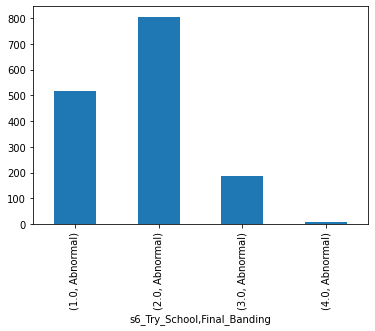

In [71]:
s6_Try_School = IV2[['s6_Try_School', 'Final_Banding', 'Cohort_ID']]
s6_Try_School_0 = s6_Try_School[~s6_Try_School['Final_Banding'].str.contains('Normal')]
cmafreq2 = s6_Try_School_0.groupby(['s6_Try_School', 'Final_Banding']).size()
cmafreq2.plot.bar('s6_Try_School', 'Final_Banding')

print(check_score_perc(s6_Try_School, 's6_Try_School', 'Final_Banding', 1))
print(check_score_perc(s6_Try_School, 's6_Try_School', 'Final_Banding', 2))
print(check_score_perc(s6_Try_School, 's6_Try_School', 'Final_Banding', 3))
print(check_score_perc(s6_Try_School, 's6_Try_School', 'Final_Banding', 4))

print(check_band_perc(s6_Try_School, 'Final_Banding', 's6_Try_School', 'Normal'))
print(check_band_perc(s6_Try_School, 'Final_Banding', 's6_Try_School', 'Abnormal'))

#### Finds School Interesting

Normal      81.642512
Abnormal    18.357488
Name: Final_Banding, dtype: float64
Normal      83.23603
Abnormal    16.76397
Name: Final_Banding, dtype: float64
Normal      78.705637
Abnormal    21.294363
Name: Final_Banding, dtype: float64
Normal      72.375691
Abnormal    27.624309
Name: Final_Banding, dtype: float64
2.0    60.075245
3.0    22.693755
1.0    15.259594
4.0     1.971407
Name: s5_School_Interesting, dtype: float64
2.0    53.959732
3.0    27.382550
1.0    15.302013
4.0     3.355705
Name: s5_School_Interesting, dtype: float64


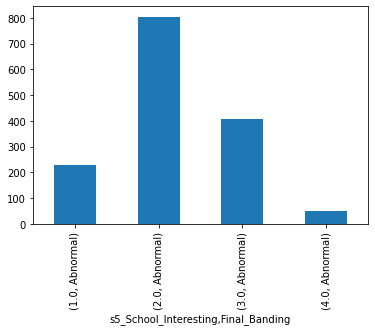

In [72]:
s5_School_Interesting = IV2[['s5_School_Interesting', 'Final_Banding', 'Cohort_ID']]
s5_School_Interesting_0 = s5_School_Interesting[~s5_School_Interesting['Final_Banding'].str.contains('Normal')]
cmafreq3 = s5_School_Interesting_0.groupby(['s5_School_Interesting', 'Final_Banding']).size()
cmafreq3.plot.bar('s5_School_Interesting', 'Final_Banding')

print(check_score_perc(s5_School_Interesting, 's5_School_Interesting', 'Final_Banding', 1))
print(check_score_perc(s5_School_Interesting, 's5_School_Interesting', 'Final_Banding', 2))
print(check_score_perc(s5_School_Interesting, 's5_School_Interesting', 'Final_Banding', 3))
print(check_score_perc(s5_School_Interesting, 's5_School_Interesting', 'Final_Banding', 4))

print(check_band_perc(s5_School_Interesting, 'Final_Banding', 's5_School_Interesting', 'Normal'))
print(check_band_perc(s5_School_Interesting, 'Final_Banding', 's5_School_Interesting', 'Abnormal'))

Normal      80.981595
Abnormal    19.018405
Name: Final_Banding, dtype: float64
Normal      84.955272
Abnormal    15.044728
Name: Final_Banding, dtype: float64
Normal      79.6106
Abnormal    20.3894
Name: Final_Banding, dtype: float64
Normal      69.705094
Abnormal    30.294906
Name: Final_Banding, dtype: float64
2.0    46.539947
3.0    43.718444
1.0     5.880606
4.0     3.861004
Name: s6_School_Interesting, dtype: float64
3.0    49.768977
2.0    36.633663
4.0     7.458746
1.0     6.138614
Name: s6_School_Interesting, dtype: float64


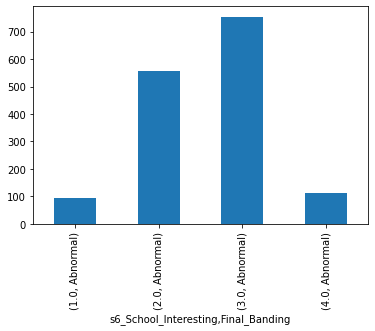

In [73]:
s6_School_Interesting = IV2[['s6_School_Interesting', 'Final_Banding', 'Cohort_ID']]
s6_School_Interesting_0 = s6_School_Interesting[~s6_School_Interesting['Final_Banding'].str.contains('Normal')]
cmafreq4 = s6_School_Interesting_0.groupby(['s6_School_Interesting', 'Final_Banding']).size()
cmafreq4.plot.bar('s6_School_Interesting', 'Final_Banding')

print(check_score_perc(s6_School_Interesting, 's6_School_Interesting', 'Final_Banding', 1))
print(check_score_perc(s6_School_Interesting, 's6_School_Interesting', 'Final_Banding', 2))
print(check_score_perc(s6_School_Interesting, 's6_School_Interesting', 'Final_Banding', 3))
print(check_score_perc(s6_School_Interesting, 's6_School_Interesting', 'Final_Banding', 4))

print(check_band_perc(s6_School_Interesting, 'Final_Banding', 's6_School_Interesting', 'Normal'))
print(check_band_perc(s6_School_Interesting, 'Final_Banding', 's6_School_Interesting', 'Abnormal'))

#### Unhappy at School

Normal      66.35514
Abnormal    33.64486
Name: Final_Banding, dtype: float64
Normal      69.453925
Abnormal    30.546075
Name: Final_Banding, dtype: float64
Normal      80.840009
Abnormal    19.159991
Name: Final_Banding, dtype: float64
Normal      86.339381
Abnormal    13.660619
Name: Final_Banding, dtype: float64
3.0    56.243410
4.0    36.556710
2.0     6.130441
1.0     1.069438
Name: s5_Unhappy_School, dtype: float64
3.0    59.636119
4.0    25.876011
2.0    12.061995
1.0     2.425876
Name: s5_Unhappy_School, dtype: float64


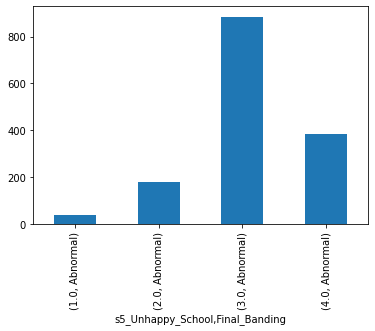

In [74]:
s5_Unhappy_School = IV2[['s5_Unhappy_School', 'Final_Banding', 'Cohort_ID']]
s5_Unhappy_School_0 = s5_Unhappy_School[~s5_Unhappy_School['Final_Banding'].str.contains('Normal')]
cmafreq5 = s5_Unhappy_School_0.groupby(['s5_Unhappy_School', 'Final_Banding']).size()
cmafreq5.plot.bar('s5_Unhappy_School', 'Final_Banding')

print(check_score_perc(s5_Unhappy_School, 's5_Unhappy_School', 'Final_Banding', 1))
print(check_score_perc(s5_Unhappy_School, 's5_Unhappy_School', 'Final_Banding', 2))
print(check_score_perc(s5_Unhappy_School, 's5_Unhappy_School', 'Final_Banding', 3))
print(check_score_perc(s5_Unhappy_School, 's5_Unhappy_School', 'Final_Banding', 4))

print(check_band_perc(s5_Unhappy_School, 'Final_Banding', 's5_Unhappy_School', 'Normal'))
print(check_band_perc(s5_Unhappy_School, 'Final_Banding', 's5_Unhappy_School', 'Abnormal'))

Abnormal    56.221198
Normal      43.778802
Name: Final_Banding, dtype: float64
Normal      63.151365
Abnormal    36.848635
Name: Final_Banding, dtype: float64
Normal      81.162011
Abnormal    18.837989
Name: Final_Banding, dtype: float64
Normal      90.859432
Abnormal     9.140568
Name: Final_Banding, dtype: float64
3.0    53.959293
4.0    37.067301
2.0     7.562026
1.0     1.411380
Name: s6_Unhappy_School, dtype: float64
3.0    55.717118
2.0    19.629874
4.0    16.589557
1.0     8.063450
Name: s6_Unhappy_School, dtype: float64


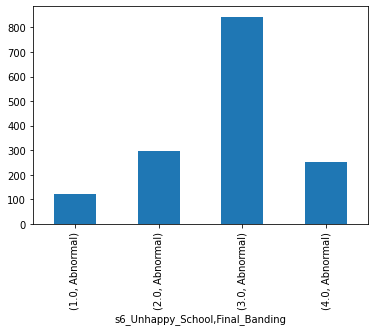

In [75]:
s6_Unhappy_School = IV2[['s6_Unhappy_School', 'Final_Banding', 'Cohort_ID']]
s6_Unhappy_School_0 = s6_Unhappy_School[~s6_Unhappy_School['Final_Banding'].str.contains('Normal')]
cmafreq6 = s6_Unhappy_School_0.groupby(['s6_Unhappy_School', 'Final_Banding']).size()
cmafreq6.plot.bar('s6_Unhappy_School', 'Final_Banding')

print(check_score_perc(s6_Unhappy_School, 's6_Unhappy_School', 'Final_Banding', 1))
print(check_score_perc(s6_Unhappy_School, 's6_Unhappy_School', 'Final_Banding', 2))
print(check_score_perc(s6_Unhappy_School, 's6_Unhappy_School', 'Final_Banding', 3))
print(check_score_perc(s6_Unhappy_School, 's6_Unhappy_School', 'Final_Banding', 4))

print(check_band_perc(s6_Unhappy_School, 'Final_Banding', 's6_Unhappy_School', 'Normal'))
print(check_band_perc(s6_Unhappy_School, 'Final_Banding', 's6_Unhappy_School', 'Abnormal'))

#### Gets tired at School

Normal      73.381295
Abnormal    26.618705
Name: Final_Banding, dtype: float64
Normal      77.584781
Abnormal    22.415219
Name: Final_Banding, dtype: float64
Normal      82.270874
Abnormal    17.729126
Name: Final_Banding, dtype: float64
Normal      84.770742
Abnormal    15.229258
Name: Final_Banding, dtype: float64
3.0    57.812971
4.0    23.423831
2.0    14.147813
1.0     4.615385
Name: s5_Tired_School, dtype: float64
3.0    55.548083
4.0    18.762609
2.0    18.224613
1.0     7.464694
Name: s5_Tired_School, dtype: float64


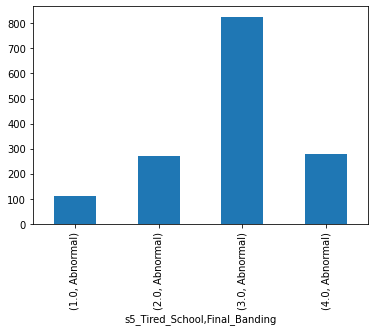

In [76]:
s5_Tired_School = IV2[['s5_Tired_School', 'Final_Banding', 'Cohort_ID']]
s5_Tired_School_0 = s5_Tired_School[~s5_Tired_School['Final_Banding'].str.contains('Normal')]
cmafreq6 = s5_Tired_School_0.groupby(['s5_Tired_School', 'Final_Banding']).size()
cmafreq6.plot.bar('s5_Tired_School', 'Final_Banding')

print(check_score_perc(s5_Tired_School, 's5_Tired_School', 'Final_Banding', 1))
print(check_score_perc(s5_Tired_School, 's5_Tired_School', 'Final_Banding', 2))
print(check_score_perc(s5_Tired_School, 's5_Tired_School', 'Final_Banding', 3))
print(check_score_perc(s5_Tired_School, 's5_Tired_School', 'Final_Banding', 4))

print(check_band_perc(s5_Tired_School, 'Final_Banding', 's5_Tired_School', 'Normal'))
print(check_band_perc(s5_Tired_School, 'Final_Banding', 's5_Tired_School', 'Abnormal'))

Normal      66.47343
Abnormal    33.52657
Name: Final_Banding, dtype: float64
Normal      78.509905
Abnormal    21.490095
Name: Final_Banding, dtype: float64
Normal      86.154933
Abnormal    13.845067
Name: Final_Banding, dtype: float64
Normal      87.402799
Abnormal    12.597201
Name: Final_Banding, dtype: float64
3.0    54.352347
2.0    27.079620
1.0    10.219846
4.0     8.348188
Name: s6_Tired_School, dtype: float64
3.0    38.811881
2.0    32.937294
1.0    22.904290
4.0     5.346535
Name: s6_Tired_School, dtype: float64


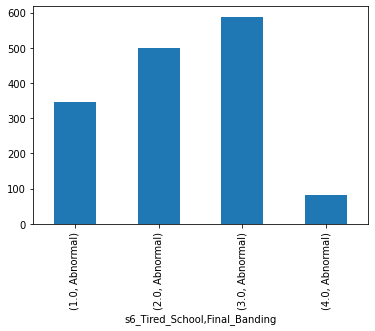

In [77]:
s6_Tired_School = IV2[['s6_Tired_School', 'Final_Banding', 'Cohort_ID']]
s6_Tired_School_0 = s6_Tired_School[~s6_Tired_School['Final_Banding'].str.contains('Normal')]
cmafreq7 = s6_Tired_School_0.groupby(['s6_Tired_School', 'Final_Banding']).size()
cmafreq7.plot.bar('s6_Tired_School', 'Final_Banding')

print(check_score_perc(s6_Tired_School, 's6_Tired_School', 'Final_Banding', 1))
print(check_score_perc(s6_Tired_School, 's6_Tired_School', 'Final_Banding', 2))
print(check_score_perc(s6_Tired_School, 's6_Tired_School', 'Final_Banding', 3))
print(check_score_perc(s6_Tired_School, 's6_Tired_School', 'Final_Banding', 4))

print(check_band_perc(s6_Tired_School, 'Final_Banding', 's6_Tired_School', 'Normal'))
print(check_band_perc(s6_Tired_School, 'Final_Banding', 's6_Tired_School', 'Abnormal'))

#### School is Waste of Time

Normal      67.634855
Abnormal    32.365145
Name: Final_Banding, dtype: float64
Normal      76.836158
Abnormal    23.163842
Name: Final_Banding, dtype: float64
Normal      82.184808
Abnormal    17.815192
Name: Final_Banding, dtype: float64
Normal      82.626853
Abnormal    17.373147
Name: Final_Banding, dtype: float64
4.0    59.710276
3.0    31.673457
2.0     6.156632
1.0     2.459635
Name: s5_School_Waste, dtype: float64
4.0    55.913978
3.0    30.577957
2.0     8.266129
1.0     5.241935
Name: s5_School_Waste, dtype: float64


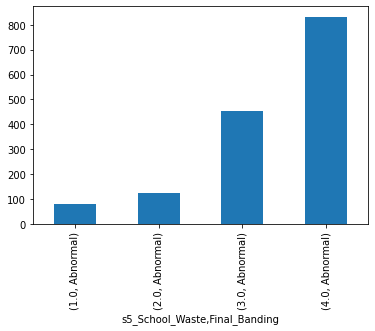

In [78]:
s5_School_Waste = IV2[['s5_School_Waste', 'Final_Banding', 'Cohort_ID']]
s5_School_Waste_0 = s5_School_Waste[~s5_School_Waste['Final_Banding'].str.contains('Normal')]
cmafreq8 = s5_School_Waste_0.groupby(['s5_School_Waste', 'Final_Banding']).size()
cmafreq8.plot.bar('s5_School_Waste', 'Final_Banding')

print(check_score_perc(s5_School_Waste, 's5_School_Waste', 'Final_Banding', 1))
print(check_score_perc(s5_School_Waste, 's5_School_Waste', 'Final_Banding', 2))
print(check_score_perc(s5_School_Waste, 's5_School_Waste', 'Final_Banding', 3))
print(check_score_perc(s5_School_Waste, 's5_School_Waste', 'Final_Banding', 4))

print(check_band_perc(s5_School_Waste, 'Final_Banding', 's5_School_Waste', 'Normal'))
print(check_band_perc(s5_School_Waste, 'Final_Banding', 's5_School_Waste', 'Abnormal'))

Normal      67.619048
Abnormal    32.380952
Name: Final_Banding, dtype: float64
Normal      73.698264
Abnormal    26.301736
Name: Final_Banding, dtype: float64
Normal      81.420613
Abnormal    18.579387
Name: Final_Banding, dtype: float64
Normal      84.731123
Abnormal    15.268877
Name: Final_Banding, dtype: float64
4.0    45.192451
3.0    43.438847
2.0     8.203299
1.0     3.165403
Name: s6_School_Waste, dtype: float64
3.0    44.055482
4.0    36.195509
2.0    13.011889
1.0     6.737120
Name: s6_School_Waste, dtype: float64


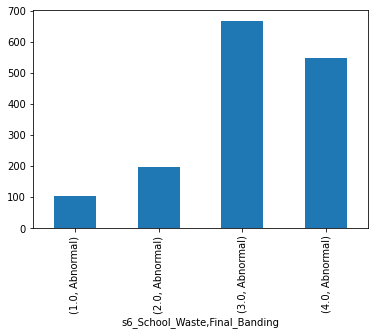

In [79]:
s6_School_Waste = IV2[['s6_School_Waste', 'Final_Banding', 'Cohort_ID']]
s6_School_Waste_0 = s6_School_Waste[~s6_School_Waste['Final_Banding'].str.contains('Normal')]
cmafreq9 = s6_School_Waste_0.groupby(['s6_School_Waste', 'Final_Banding']).size()
cmafreq9.plot.bar('s6_School_Waste', 'Final_Banding')

print(check_score_perc(s6_School_Waste, 's6_School_Waste', 'Final_Banding', 1))
print(check_score_perc(s6_School_Waste, 's6_School_Waste', 'Final_Banding', 2))
print(check_score_perc(s6_School_Waste, 's6_School_Waste', 'Final_Banding', 3))
print(check_score_perc(s6_School_Waste, 's6_School_Waste', 'Final_Banding', 4))

print(check_band_perc(s6_School_Waste, 'Final_Banding', 's6_School_Waste', 'Normal'))
print(check_band_perc(s6_School_Waste, 'Final_Banding', 's6_School_Waste', 'Abnormal'))

#### Cares About doing Well

Normal      71.544715
Abnormal    28.455285
Name: Final_Banding, dtype: float64
Normal      77.974684
Abnormal    22.025316
Name: Final_Banding, dtype: float64
Normal      81.690739
Abnormal    18.309261
Name: Final_Banding, dtype: float64
Normal      82.581322
Abnormal    17.418678
Name: Final_Banding, dtype: float64
4.0    59.966474
3.0    29.305090
2.0     9.387382
1.0     1.341055
Name: s5_Care_School_Achievement, dtype: float64
4.0    56.462585
3.0    29.319728
2.0    11.836735
1.0     2.380952
Name: s5_Care_School_Achievement, dtype: float64


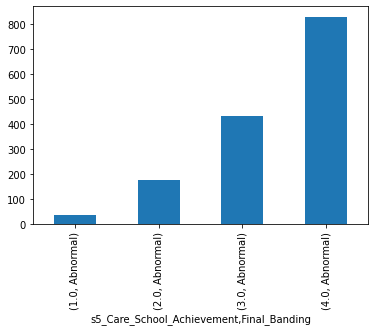

In [80]:
# 1 - Not True, 4 - Definitely True
s5_Care_School_Achievement = IV2[['s5_Care_School_Achievement', 'Final_Banding', 'Cohort_ID']]
s5_Care_School_Achievement_0 = s5_Care_School_Achievement[~s5_Care_School_Achievement['Final_Banding'].str.contains('Normal')]
cmafreq10 = s5_Care_School_Achievement_0.groupby(['s5_Care_School_Achievement', 'Final_Banding']).size()
cmafreq10.plot.bar('s5_Care_School_Achievement', 'Final_Banding')

print(check_score_perc(s5_Care_School_Achievement, 's5_Care_School_Achievement', 'Final_Banding', 1))
print(check_score_perc(s5_Care_School_Achievement, 's5_Care_School_Achievement', 'Final_Banding', 2))
print(check_score_perc(s5_Care_School_Achievement, 's5_Care_School_Achievement', 'Final_Banding', 3))
print(check_score_perc(s5_Care_School_Achievement, 's5_Care_School_Achievement', 'Final_Banding', 4))

print(check_band_perc(s5_Care_School_Achievement, 'Final_Banding', 's5_Care_School_Achievement', 'Normal'))
print(check_band_perc(s5_Care_School_Achievement, 'Final_Banding', 's5_Care_School_Achievement', 'Abnormal'))

#### Excited for Secondary School

Normal      82.848837
Abnormal    17.151163
Name: Final_Banding, dtype: float64
Normal      80.444283
Abnormal    19.555717
Name: Final_Banding, dtype: float64
Normal      72.274143
Abnormal    27.725857
Name: Final_Banding, dtype: float64
1.0    60.180995
2.0    33.318250
3.0     3.499246
4.0     3.001508
Name: s5_Excited_For_SecondSchool, dtype: float64
1.0    55.177021
2.0    35.871743
3.0     5.945224
4.0     3.006012
Name: s5_Excited_For_SecondSchool, dtype: float64


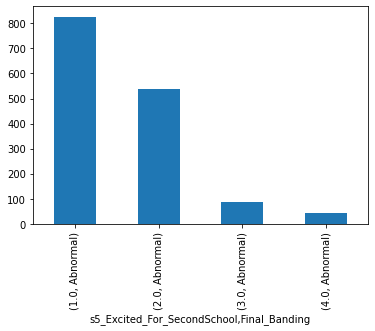

In [81]:
# 1- A lot, 3-not at all, 4 - already there
s5_Excited_For_SecondSchool = IV2[['s5_Excited_For_SecondSchool', 'Final_Banding', 'Cohort_ID']]
s5_Excited_For_SecondSchool_0 = s5_Excited_For_SecondSchool[~s5_Excited_For_SecondSchool['Final_Banding'].str.contains('Normal')]
cmafreq11 = s5_Excited_For_SecondSchool_0.groupby(['s5_Excited_For_SecondSchool', 'Final_Banding']).size()
cmafreq11.plot.bar('s5_Excited_For_SecondSchool', 'Final_Banding')

print(check_score_perc(s5_Excited_For_SecondSchool, 's5_Excited_For_SecondSchool', 'Final_Banding', 1))
print(check_score_perc(s5_Excited_For_SecondSchool, 's5_Excited_For_SecondSchool', 'Final_Banding', 2))
print(check_score_perc(s5_Excited_For_SecondSchool, 's5_Excited_For_SecondSchool', 'Final_Banding', 3))

print(check_band_perc(s5_Excited_For_SecondSchool, 'Final_Banding', 's5_Excited_For_SecondSchool', 'Normal'))
print(check_band_perc(s5_Excited_For_SecondSchool, 'Final_Banding', 's5_Excited_For_SecondSchool', 'Abnormal'))

#### Difficult to Focus on School

Normal      60.917431
Abnormal    39.082569
Name: Final_Banding, dtype: float64
Normal      74.231242
Abnormal    25.768758
Name: Final_Banding, dtype: float64
Normal      84.166492
Abnormal    15.833508
Name: Final_Banding, dtype: float64
Normal      90.372671
Abnormal     9.627329
Name: Final_Banding, dtype: float64
3.0    59.818641
2.0    17.942619
4.0    17.303404
1.0     4.935335
Name: s6_Keep_Mind_School, dtype: float64
3.0    50.033047
2.0    27.693325
1.0    14.077991
4.0     8.195638
Name: s6_Keep_Mind_School, dtype: float64


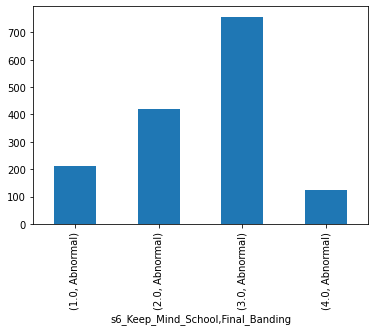

In [82]:
#1 - All the Time, 4 - Never
s6_Keep_Mind_School = IV2[['s6_Keep_Mind_School', 'Final_Banding', 'Cohort_ID']]
s6_Keep_Mind_School_0 = s6_Keep_Mind_School[~s6_Keep_Mind_School['Final_Banding'].str.contains('Normal')]
cmafreq12 = s6_Keep_Mind_School_0.groupby(['s6_Keep_Mind_School', 'Final_Banding']).size()
cmafreq12.plot.bar('s6_Keep_Mind_School', 'Final_Banding')

print(check_score_perc(s6_Keep_Mind_School, 's6_Keep_Mind_School', 'Final_Banding', 1))
print(check_score_perc(s6_Keep_Mind_School, 's6_Keep_Mind_School', 'Final_Banding', 2))
print(check_score_perc(s6_Keep_Mind_School, 's6_Keep_Mind_School', 'Final_Banding', 3))
print(check_score_perc(s6_Keep_Mind_School, 's6_Keep_Mind_School', 'Final_Banding', 4))

print(check_band_perc(s6_Keep_Mind_School, 'Final_Banding', 's6_Keep_Mind_School', 'Normal'))
print(check_band_perc(s6_Keep_Mind_School, 'Final_Banding', 's6_Keep_Mind_School', 'Abnormal'))

#### Happy with School / School Work

Normal      88.425739
Abnormal    11.574261
Name: Final_Banding, dtype: float64
Normal      84.67183
Abnormal    15.32817
Name: Final_Banding, dtype: float64
Normal      78.571429
Abnormal    21.428571
Name: Final_Banding, dtype: float64
Normal      74.584323
Abnormal    25.415677
Name: Final_Banding, dtype: float64
Normal      70.152505
Abnormal    29.847495
Name: Final_Banding, dtype: float64
Normal      65.587045
Abnormal    34.412955
Name: Final_Banding, dtype: float64
Normal      61.081081
Abnormal    38.918919
Name: Final_Banding, dtype: float64
1.0    32.842327
2.0    31.218999
3.0    17.525928
4.0     9.439351
5.0     4.839922
6.0     2.434992
7.0     1.698482
Name: s6_Happy_School, dtype: float64
2.0    25.268817
3.0    21.370968
1.0    19.220430
4.0    14.381720
5.0     9.206989
6.0     5.712366
7.0     4.838710
Name: s6_Happy_School, dtype: float64


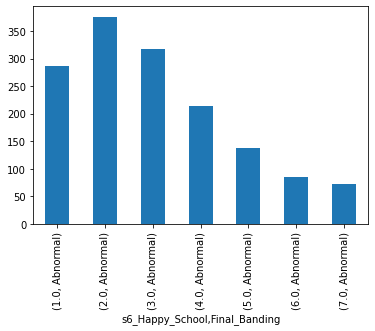

In [83]:
#1 - Completely Happy, 7 - Not at all Happy
s6_Happy_School = IV2[['s6_Happy_School', 'Final_Banding', 'Cohort_ID']]
s6_Happy_School_0 = s6_Happy_School[~s6_Happy_School['Final_Banding'].str.contains('Normal')]
cmafreq13 = s6_Happy_School_0.groupby(['s6_Happy_School', 'Final_Banding']).size()
cmafreq13.plot.bar('s6_Happy_School', 'Final_Banding')

print(check_score_perc(s6_Happy_School, 's6_Happy_School', 'Final_Banding', 1))
print(check_score_perc(s6_Happy_School, 's6_Happy_School', 'Final_Banding', 2))
print(check_score_perc(s6_Happy_School, 's6_Happy_School', 'Final_Banding', 3))
print(check_score_perc(s6_Happy_School, 's6_Happy_School', 'Final_Banding', 4))
print(check_score_perc(s6_Happy_School, 's6_Happy_School', 'Final_Banding', 5))
print(check_score_perc(s6_Happy_School, 's6_Happy_School', 'Final_Banding', 6))
print(check_score_perc(s6_Happy_School, 's6_Happy_School', 'Final_Banding', 7))

print(check_band_perc(s6_Happy_School, 'Final_Banding', 's6_Happy_School', 'Normal'))
print(check_band_perc(s6_Happy_School, 'Final_Banding', 's6_Happy_School', 'Abnormal'))

Normal      89.719626
Abnormal    10.280374
Name: Final_Banding, dtype: float64
Normal      85.826033
Abnormal    14.173967
Name: Final_Banding, dtype: float64
Normal      79.626168
Abnormal    20.373832
Name: Final_Banding, dtype: float64
Normal      75.121007
Abnormal    24.878993
Name: Final_Banding, dtype: float64
Normal      67.210145
Abnormal    32.789855
Name: Final_Banding, dtype: float64
Normal      66.312057
Abnormal    33.687943
Name: Final_Banding, dtype: float64
Normal      63.333333
Abnormal    36.666667
Name: Final_Banding, dtype: float64
2.0    41.186186
3.0    19.189189
1.0    18.738739
4.0    11.651652
5.0     5.570571
6.0     2.807808
7.0     0.855856
Name: s6_Happy_School_Work, dtype: float64
2.0    30.423103
3.0    21.961048
4.0    17.259906
5.0    12.155809
1.0     9.603761
6.0     6.380121
7.0     2.216253
Name: s6_Happy_School_Work, dtype: float64


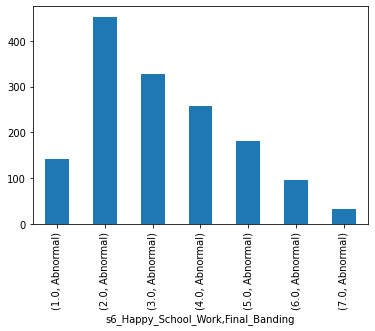

In [84]:
s6_Happy_School_Work = IV2[['s6_Happy_School_Work', 'Final_Banding', 'Cohort_ID']]
s6_Happy_School_Work_0 = s6_Happy_School_Work[~s6_Happy_School_Work['Final_Banding'].str.contains('Normal')]
cmafreq14 = s6_Happy_School_Work_0.groupby(['s6_Happy_School_Work', 'Final_Banding']).size()
cmafreq14.plot.bar('s6_Happy_School_Work', 'Final_Banding')

print(check_score_perc(s6_Happy_School_Work, 's6_Happy_School_Work', 'Final_Banding', 1))
print(check_score_perc(s6_Happy_School_Work, 's6_Happy_School_Work', 'Final_Banding', 2))
print(check_score_perc(s6_Happy_School_Work, 's6_Happy_School_Work', 'Final_Banding', 3))
print(check_score_perc(s6_Happy_School_Work, 's6_Happy_School_Work', 'Final_Banding', 4))
print(check_score_perc(s6_Happy_School_Work, 's6_Happy_School_Work', 'Final_Banding', 5))
print(check_score_perc(s6_Happy_School_Work, 's6_Happy_School_Work', 'Final_Banding', 6))
print(check_score_perc(s6_Happy_School_Work, 's6_Happy_School_Work', 'Final_Banding', 7))

print(check_band_perc(s6_Happy_School_Work, 'Final_Banding', 's6_Happy_School_Work', 'Normal'))
print(check_band_perc(s6_Happy_School_Work, 'Final_Banding', 's6_Happy_School_Work', 'Abnormal'))

##Misbehaviour & Punishment 



* s5 Freq of CM suspensions 
* s5 CM Missing school without permission
* s5 Freq of CM suspensions 
* s5 Freq of CM expellsions  
* s5 Freq CM reports misbehaves in class
* s5 CM Reported missed school without parental permission 
* s6 Freq CM misbehaves in lessons 
* s6 Freq CM misses school without permission 
* s6 Num of suspensions 
* s6 Num of expelsions 

In [85]:
Punishment = all_data[['Suspended_School', 'Num_Suspended', 'Missed_School_NoPermission', 's5_Temp_Suspension', 's5_Num_Suspensions', 's5_CM_Expelled', 's5_Num_Expelled', 'Misbehaves_School', 's5_Misbehave_School',
                       's5_Teacher_Discipline', 's5_Missed_School', 's6_Misbehave_Lessons', 's6_Missed_School_No_ParenetalPermission', 's6_Missed_School_NoPermission', 's6_Temp_Suspension', 's6_Num_Suspensions', 
                       's6_CM_Expelled', 's6_Num_Expelled', 'Cohort_ID']]

IV3 = Punishment.merge(DV, on='Cohort_ID')

#### Misbehaves at School

Normal      78.571429
Abnormal    21.428571
Name: Final_Banding, dtype: float64
Normal      83.529412
Abnormal    16.470588
Name: Final_Banding, dtype: float64
Normal      82.311734
Abnormal    17.688266
Name: Final_Banding, dtype: float64
Normal      81.270903
Abnormal    18.729097
Name: Final_Banding, dtype: float64
4.0    74.047740
3.0    23.869985
2.0     1.802946
1.0     0.279330
Name: Misbehaves_School, dtype: float64
4.0    75.420875
3.0    22.671156
2.0     1.571268
1.0     0.336700
Name: Misbehaves_School, dtype: float64


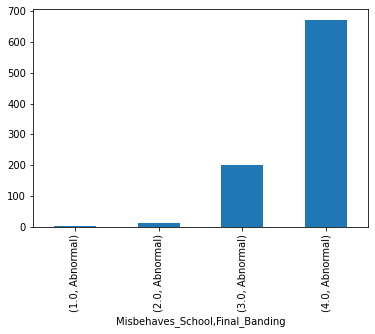

In [86]:
Misbehaves_School = IV3[['Misbehaves_School', 'Final_Banding', 'Cohort_ID']]
Misbehaves_School_0 = Misbehaves_School[~Misbehaves_School['Final_Banding'].str.contains('Normal')]
pafreq6 = Misbehaves_School_0.groupby(['Misbehaves_School', 'Final_Banding']).size()
pafreq6.plot.bar('Misbehaves_School', 'Final_Banding')

print(check_score_perc(Misbehaves_School, 'Misbehaves_School', 'Final_Banding', 1))
print(check_score_perc(Misbehaves_School, 'Misbehaves_School', 'Final_Banding', 2))
print(check_score_perc(Misbehaves_School, 'Misbehaves_School', 'Final_Banding', 3))
print(check_score_perc(Misbehaves_School, 'Misbehaves_School', 'Final_Banding', 4))

print(check_band_perc(Misbehaves_School, 'Final_Banding', 'Misbehaves_School', 'Normal'))
print(check_band_perc(Misbehaves_School, 'Final_Banding', 'Misbehaves_School', 'Abnormal'))

Normal      69.387755
Abnormal    30.612245
Name: Final_Banding, dtype: float64
Normal      74.460432
Abnormal    25.539568
Name: Final_Banding, dtype: float64
Normal      82.105263
Abnormal    17.894737
Name: Final_Banding, dtype: float64
Normal      81.933133
Abnormal    18.066867
Name: Final_Banding, dtype: float64
4.0    57.592648
3.0    38.776740
2.0     3.118409
1.0     0.512202
Name: s5_Misbehave_School, dtype: float64
4.0    56.577181
3.0    37.651007
2.0     4.765101
1.0     1.006711
Name: s5_Misbehave_School, dtype: float64


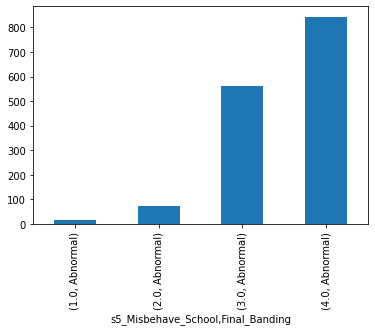

In [87]:
s5_Misbehave_School = IV3[['s5_Misbehave_School', 'Final_Banding', 'Cohort_ID']]
Misbehaves_School_0 = s5_Misbehave_School[~s5_Misbehave_School['Final_Banding'].str.contains('Normal')]
pafreq6 = Misbehaves_School_0.groupby(['s5_Misbehave_School', 'Final_Banding']).size()
pafreq6.plot.bar('s5_Misbehave_School', 'Final_Banding')

print(check_score_perc(s5_Misbehave_School, 's5_Misbehave_School', 'Final_Banding', 1))
print(check_score_perc(s5_Misbehave_School, 's5_Misbehave_School', 'Final_Banding', 2))
print(check_score_perc(s5_Misbehave_School, 's5_Misbehave_School', 'Final_Banding', 3))
print(check_score_perc(s5_Misbehave_School, 's5_Misbehave_School', 'Final_Banding', 4))

print(check_band_perc(s5_Misbehave_School, 'Final_Banding', 's5_Misbehave_School', 'Normal'))
print(check_band_perc(s5_Misbehave_School, 'Final_Banding', 's5_Misbehave_School', 'Abnormal'))

Normal      69.84127
Abnormal    30.15873
Name: Final_Banding, dtype: float64
Normal      70.194986
Abnormal    29.805014
Name: Final_Banding, dtype: float64
Normal      81.527292
Abnormal    18.472708
Name: Final_Banding, dtype: float64
Normal      82.919103
Abnormal    17.080897
Name: Final_Banding, dtype: float64
4.0    50.557124
3.0    45.045313
2.0     3.743872
1.0     0.653692
Name: s6_Misbehave_Lessons, dtype: float64
4.0    46.301189
3.0    45.376486
2.0     7.067371
1.0     1.254954
Name: s6_Misbehave_Lessons, dtype: float64


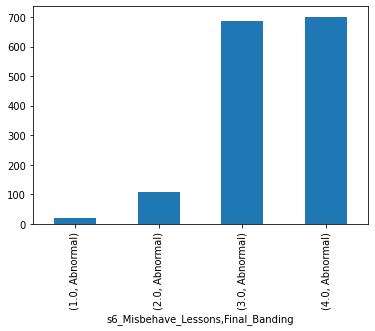

In [88]:
s6_Misbehave_Lessons = IV3[['s6_Misbehave_Lessons', 'Final_Banding', 'Cohort_ID']]
Misbehaves_School_0 = s6_Misbehave_Lessons[~s6_Misbehave_Lessons['Final_Banding'].str.contains('Normal')]
pafreq6 = Misbehaves_School_0.groupby(['s6_Misbehave_Lessons', 'Final_Banding']).size()
pafreq6.plot.bar('s6_Misbehave_Lessons', 'Final_Banding')

print(check_score_perc(s6_Misbehave_Lessons, 's6_Misbehave_Lessons', 'Final_Banding', 1))
print(check_score_perc(s6_Misbehave_Lessons, 's6_Misbehave_Lessons', 'Final_Banding', 2))
print(check_score_perc(s6_Misbehave_Lessons, 's6_Misbehave_Lessons', 'Final_Banding', 3))
print(check_score_perc(s6_Misbehave_Lessons, 's6_Misbehave_Lessons', 'Final_Banding', 4))

print(check_band_perc(s6_Misbehave_Lessons, 'Final_Banding', 's6_Misbehave_Lessons', 'Normal'))
print(check_band_perc(s6_Misbehave_Lessons, 'Final_Banding', 's6_Misbehave_Lessons', 'Abnormal'))

### Suspensions 

In [89]:
# Teacher's Report
# 1 - Yes, 2 - No
Suspended_School = IV3[['Suspended_School', 'Final_Banding', 'Cohort_ID']]
print(check_score_perc(Suspended_School, 'Suspended_School', 'Final_Banding', 1))
print(check_score_perc(Suspended_School, 'Suspended_School', 'Final_Banding', 2))

print(check_band_perc(Suspended_School, 'Final_Banding', 'Suspended_School', 'Normal'))
print(check_band_perc(Suspended_School, 'Final_Banding', 'Suspended_School', 'Abnormal'))

Normal      70.27027
Abnormal    29.72973
Name: Final_Banding, dtype: float64
Normal      81.572327
Abnormal    18.427673
Name: Final_Banding, dtype: float64
2.0    99.336227
1.0     0.663773
Name: Suspended_School, dtype: float64
2.0    98.764045
1.0     1.235955
Name: Suspended_School, dtype: float64


In [90]:
# s5 Parent's Report of Suspensions
s5_Temp_Suspension = IV3[['s5_Temp_Suspension', 'Final_Banding', 'Cohort_ID']]
print(check_score_perc(s5_Temp_Suspension, 's5_Temp_Suspension', 'Final_Banding', 1))
print(check_score_perc(s5_Temp_Suspension, 's5_Temp_Suspension', 'Final_Banding', 2))

print(check_band_perc(s5_Temp_Suspension, 'Final_Banding', 's5_Temp_Suspension', 'Normal'))
print(check_band_perc(s5_Temp_Suspension, 'Final_Banding', 's5_Temp_Suspension', 'Abnormal'))

Normal      68.918919
Abnormal    31.081081
Name: Final_Banding, dtype: float64
Normal      81.776795
Abnormal    18.223205
Name: Final_Banding, dtype: float64
2.0    99.19533
1.0     0.80467
Name: s5_Temp_Suspension, dtype: float64
2.0    98.384831
1.0     1.615169
Name: s5_Temp_Suspension, dtype: float64


In [91]:
# s6 Parent's Report of Suspensions
s6_Temp_Suspension = IV3[['s6_Temp_Suspension', 'Final_Banding', 'Cohort_ID']]
print(check_score_perc(s6_Temp_Suspension, 's6_Temp_Suspension', 'Final_Banding', 1))
print(check_score_perc(s6_Temp_Suspension, 's6_Temp_Suspension', 'Final_Banding', 2))

print(check_band_perc(s6_Temp_Suspension, 'Final_Banding', 's6_Temp_Suspension', 'Normal'))
print(check_band_perc(s6_Temp_Suspension, 'Final_Banding', 's6_Temp_Suspension', 'Abnormal'))

Normal      66.769231
Abnormal    33.230769
Name: Final_Banding, dtype: float64
Normal      82.20043
Abnormal    17.79957
Name: Final_Banding, dtype: float64
2.0    96.575126
1.0     3.424874
Name: s6_Temp_Suspension, dtype: float64
2.0    92.463364
1.0     7.536636
Name: s6_Temp_Suspension, dtype: float64


### Expellsions

In [92]:
s5_CM_Expelled = IV3[['s5_CM_Expelled', 'Final_Banding', 'Cohort_ID']]
print(check_score_perc(s5_CM_Expelled, 's5_CM_Expelled', 'Final_Banding', 1))
print(check_score_perc(s5_CM_Expelled, 's5_CM_Expelled', 'Final_Banding', 2))

print(check_band_perc(s5_CM_Expelled, 'Final_Banding', 's5_CM_Expelled', 'Normal'))
print(check_band_perc(s5_CM_Expelled, 'Final_Banding', 's5_CM_Expelled', 'Abnormal'))

Normal      75.0
Abnormal    25.0
Name: Final_Banding, dtype: float64
Normal      81.657644
Abnormal    18.342356
Name: Final_Banding, dtype: float64
2.0    99.952666
1.0     0.047334
Name: s5_CM_Expelled, dtype: float64
2.0    99.929775
1.0     0.070225
Name: s5_CM_Expelled, dtype: float64


In [93]:
s6_CM_Expelled = IV3[['s6_CM_Expelled', 'Final_Banding', 'Cohort_ID']]
print(check_score_perc(s6_CM_Expelled, 's6_CM_Expelled', 'Final_Banding', 1))
print(check_score_perc(s6_CM_Expelled, 's6_CM_Expelled', 'Final_Banding', 2))

print(check_band_perc(s6_CM_Expelled, 'Final_Banding', 's6_CM_Expelled', 'Normal'))
print(check_band_perc(s6_CM_Expelled, 'Final_Banding', 's6_CM_Expelled', 'Abnormal'))

#22 Expellsions 

Normal      50.0
Abnormal    50.0
Name: Final_Banding, dtype: float64
Normal      81.644508
Abnormal    18.355492
Name: Final_Banding, dtype: float64
2.0    99.826389
1.0     0.173611
Name: s6_CM_Expelled, dtype: float64
2.0    99.23238
1.0     0.76762
Name: s6_CM_Expelled, dtype: float64


### Missed School

In [94]:
# Teachers Report 
Missed_School_NoPermission = IV3[['Missed_School_NoPermission', 'Final_Banding', 'Cohort_ID']]
print(check_score_perc(Missed_School_NoPermission, 'Missed_School_NoPermission', 'Final_Banding', 1))
print(check_score_perc(Missed_School_NoPermission, 'Missed_School_NoPermission', 'Final_Banding', 2))

print(check_band_perc(Missed_School_NoPermission, 'Final_Banding', 'Missed_School_NoPermission', 'Normal'))
print(check_band_perc(Missed_School_NoPermission, 'Final_Banding', 'Missed_School_NoPermission', 'Abnormal'))

Normal      72.727273
Abnormal    27.272727
Name: Final_Banding, dtype: float64
Normal      81.721573
Abnormal    18.278427
Name: Final_Banding, dtype: float64
2.0    98.362753
1.0     1.637247
Name: Missed_School_NoPermission, dtype: float64
2.0    97.285068
1.0     2.714932
Name: Missed_School_NoPermission, dtype: float64


In [95]:
# s5 Parental Report 
s5_Missed_School = IV3[['s5_Missed_School', 'Final_Banding', 'Cohort_ID']]
print(check_score_perc(s5_Missed_School, 's5_Missed_School', 'Final_Banding', 1))
print(check_score_perc(s5_Missed_School, 's5_Missed_School', 'Final_Banding', 2))

print(check_band_perc(s5_Missed_School, 'Final_Banding', 's5_Missed_School', 'Normal'))
print(check_band_perc(s5_Missed_School, 'Final_Banding', 's5_Missed_School', 'Abnormal'))

Normal      77.973568
Abnormal    22.026432
Name: Final_Banding, dtype: float64
Normal      81.68818
Abnormal    18.31182
Name: Final_Banding, dtype: float64
2.0    97.331122
1.0     2.668878
Name: s5_Missed_School, dtype: float64
2.0    96.659987
1.0     3.340013
Name: s5_Missed_School, dtype: float64


In [96]:
#s6 Cohort Member Report 
#1 - Yes, 2 - No
s6_Missed_School_No_ParenetalPermission = IV3[['s6_Missed_School_No_ParenetalPermission', 'Final_Banding', 'Cohort_ID']]
print(check_score_perc(s6_Missed_School_No_ParenetalPermission, 's6_Missed_School_No_ParenetalPermission', 'Final_Banding', 1))
print(check_score_perc(s6_Missed_School_No_ParenetalPermission, 's6_Missed_School_No_ParenetalPermission', 'Final_Banding', 2))

print(check_band_perc(s6_Missed_School_No_ParenetalPermission, 'Final_Banding', 's6_Missed_School_No_ParenetalPermission', 'Normal'))
print(check_band_perc(s6_Missed_School_No_ParenetalPermission, 'Final_Banding', 's6_Missed_School_No_ParenetalPermission', 'Abnormal'))

Normal      67.868339
Abnormal    32.131661
Name: Final_Banding, dtype: float64
Normal      82.811678
Abnormal    17.188322
Name: Final_Banding, dtype: float64
2.0    93.566122
1.0     6.433878
Name: s6_Missed_School_No_ParenetalPermission, dtype: float64
2.0    86.441799
1.0    13.558201
Name: s6_Missed_School_No_ParenetalPermission, dtype: float64


Normal      62.5
Abnormal    37.5
Name: Final_Banding, dtype: float64
Normal      51.351351
Abnormal    48.648649
Name: Final_Banding, dtype: float64
Normal      61.538462
Abnormal    38.461538
Name: Final_Banding, dtype: float64
Normal      65.217391
Abnormal    34.782609
Name: Final_Banding, dtype: float64
Normal      69.798658
Abnormal    30.201342
Name: Final_Banding, dtype: float64
Normal      69.822485
Abnormal    30.177515
Name: Final_Banding, dtype: float64
6.0    55.140187
5.0    24.299065
4.0     7.009346
3.0     5.607477
2.0     4.439252
1.0     3.504673
Name: s6_Missed_School_NoPermission, dtype: float64
6.0    49.756098
5.0    21.951220
2.0     8.780488
4.0     7.804878
3.0     7.317073
1.0     4.390244
Name: s6_Missed_School_NoPermission, dtype: float64


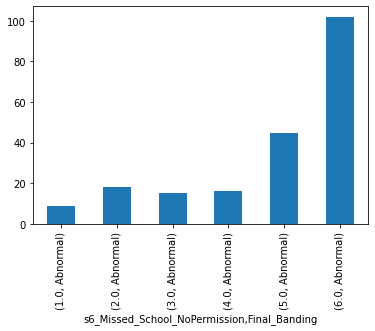

In [97]:
#s6 Cohort Member Report How Often missed School
# 1 - Most Days, 2 - 2/3 Week, 3 -Once Week, 4 - Once Month, 5 - Less then Once a Month, 6 - Once 
s6_Missed_School_NoPermission = IV3[['s6_Missed_School_NoPermission', 'Final_Banding', 'Cohort_ID']]
s6_Missed_School_NoPermission_0 = s6_Missed_School_NoPermission[~s6_Missed_School_NoPermission['Final_Banding'].str.contains('Normal')]
punfreq4 = s6_Missed_School_NoPermission_0.groupby(['s6_Missed_School_NoPermission', 'Final_Banding']).size()
punfreq4.plot.bar('s6_Missed_School_NoPermission', 'Final_Banding')

print(check_score_perc(s6_Missed_School_NoPermission, 's6_Missed_School_NoPermission', 'Final_Banding', 1))
print(check_score_perc(s6_Missed_School_NoPermission, 's6_Missed_School_NoPermission', 'Final_Banding', 2))
print(check_score_perc(s6_Missed_School_NoPermission, 's6_Missed_School_NoPermission', 'Final_Banding', 3))
print(check_score_perc(s6_Missed_School_NoPermission, 's6_Missed_School_NoPermission', 'Final_Banding', 4))
print(check_score_perc(s6_Missed_School_NoPermission, 's6_Missed_School_NoPermission', 'Final_Banding', 5))
print(check_score_perc(s6_Missed_School_NoPermission, 's6_Missed_School_NoPermission', 'Final_Banding', 6))

print(check_band_perc(s6_Missed_School_NoPermission, 'Final_Banding', 's6_Missed_School_NoPermission', 'Normal'))
print(check_band_perc(s6_Missed_School_NoPermission, 'Final_Banding', 's6_Missed_School_NoPermission', 'Abnormal'))

##School Support



* s5 Amount of support CM recieves at school
* s5 Support given to CMs class
* s6 Does CM recieve support from school 

In [98]:
Support = all_data[['Support_Ind_Teacher', 'Support_Emot_Support', 'Support_English', 'Support_Maths', 'Support', 'Support_Teacher_Assistant', 'Support_Out_Class', 'Support_In_Class', 'Support_Group', 'Support_Tuition', 
                    'Support_Vague', 'Support_No_Help', 'Support_Dont_Know', 'Support_Refused', 'Class_Support_SpecialistTeach','Class_Support_SpecialNeed_Teacher', 'Class_Support_TeachAssist', 'Class_Support_StudentTeach', 
                    'Class_Support_NonSpecialist_Teach', 'Class_Support_BoosterGroup', 'Class_Support_Cover', 'Class_Support_LearningSup_Assist', 'Class_Support_Reading_Support', 'Class_Support_Tuiton', 'Class_Support_None', 
                    'Class_Support_Dont_Know', 'Class_Support_Refused', 's6_CM_Support', 'Cohort_ID']]

IV4 = Support.merge(DV, on='Cohort_ID')

### s5 Individual Support 


Normal      78.712871
Abnormal    21.287129
Name: Final_Banding, dtype: float64
Normal      82.016149
Abnormal    17.983851
Name: Final_Banding, dtype: float64
0.0    87.542439
1.0    12.457561
Name: Support_Ind_Teacher, dtype: float64
0.0    85.069444
1.0    14.930556
Name: Support_Ind_Teacher, dtype: float64


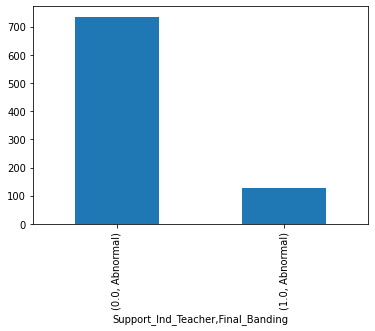

In [99]:
# 1 - Yes, 0 - No
Support_Ind_Teacher = IV4[['Support_Ind_Teacher', 'Final_Banding', 'Cohort_ID']]
Support_Ind_Teacher_0 = Support_Ind_Teacher[~Support_Ind_Teacher['Final_Banding'].str.contains('Normal')]
supfreq1 = Support_Ind_Teacher_0.groupby(['Support_Ind_Teacher', 'Final_Banding']).size()
supfreq1.plot.bar('Support_Ind_Teacher', 'Final_Banding')

print(check_score_perc(Support_Ind_Teacher, 'Support_Ind_Teacher', 'Final_Banding', 1))
print(check_score_perc(Support_Ind_Teacher, 'Support_Ind_Teacher', 'Final_Banding', 0))

print(check_band_perc(Support_Ind_Teacher, 'Final_Banding', 'Support_Ind_Teacher', 'Normal'))
print(check_band_perc(Support_Ind_Teacher, 'Final_Banding', 'Support_Ind_Teacher', 'Abnormal'))

In [100]:
# 1 - Yes, 0 - No
Support_Teacher_Assistant = IV4[['Support_Teacher_Assistant', 'Final_Banding', 'Cohort_ID']]

print(check_score_perc(Support_Teacher_Assistant, 'Support_Teacher_Assistant', 'Final_Banding', 1))
print(check_score_perc(Support_Teacher_Assistant, 'Support_Teacher_Assistant', 'Final_Banding', 0))

print(check_band_perc(Support_Teacher_Assistant, 'Final_Banding', 'Support_Teacher_Assistant', 'Normal'))
print(check_band_perc(Support_Teacher_Assistant, 'Final_Banding', 'Support_Teacher_Assistant', 'Abnormal'))

Normal      80.0
Abnormal    20.0
Name: Final_Banding, dtype: float64
Normal      81.601546
Abnormal    18.398454
Name: Final_Banding, dtype: float64
0.0    99.268739
1.0     0.731261
Name: Support_Teacher_Assistant, dtype: float64
0.0    99.189815
1.0     0.810185
Name: Support_Teacher_Assistant, dtype: float64


In [101]:
Support_Group = IV4[['Support_Group', 'Final_Banding', 'Cohort_ID']]

print(check_score_perc(Support_Group, 'Support_Group', 'Final_Banding', 1))
print(check_score_perc(Support_Group, 'Support_Group', 'Final_Banding', 0))

print(check_band_perc(Support_Group, 'Final_Banding', 'Support_Group', 'Normal'))
print(check_band_perc(Support_Group, 'Final_Banding', 'Support_Group', 'Abnormal'))

Normal      73.239437
Abnormal    26.760563
Name: Final_Banding, dtype: float64
Normal      81.717871
Abnormal    18.282129
Name: Final_Banding, dtype: float64
0.0    98.641943
1.0     1.358057
Name: Support_Group, dtype: float64
0.0    97.800926
1.0     2.199074
Name: Support_Group, dtype: float64


Normal      82.198265
Abnormal    17.801735
Name: Final_Banding, dtype: float64
Normal      78.988764
Abnormal    21.011236
Name: Final_Banding, dtype: float64
1.0    81.640115
0.0    18.359885
Name: Support_No_Help, dtype: float64
1.0    78.356481
0.0    21.643519
Name: Support_No_Help, dtype: float64


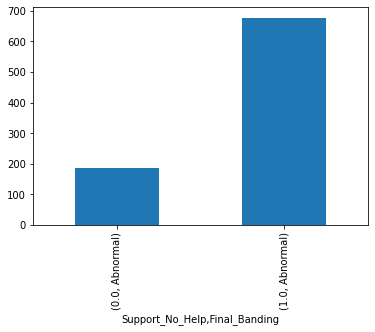

In [102]:
Support_No_Help = IV4[['Support_No_Help', 'Final_Banding', 'Cohort_ID']]
Support_No_Help_0 = Support_No_Help[~Support_No_Help['Final_Banding'].str.contains('Normal')]
supfreq2 = Support_No_Help_0.groupby(['Support_No_Help', 'Final_Banding']).size()
supfreq2.plot.bar('Support_No_Help', 'Final_Banding')

print(check_score_perc(Support_No_Help, 'Support_No_Help', 'Final_Banding', 1))
print(check_score_perc(Support_No_Help, 'Support_No_Help', 'Final_Banding', 0))

print(check_band_perc(Support_No_Help, 'Final_Banding', 'Support_No_Help', 'Normal'))
print(check_band_perc(Support_No_Help, 'Final_Banding', 'Support_No_Help', 'Abnormal'))

### s6 Individual Support

Normal      75.0
Abnormal    25.0
Name: Final_Banding, dtype: float64
Normal      78.195489
Abnormal    21.804511
Name: Final_Banding, dtype: float64
2.0    58.100559
1.0    41.899441
Name: s6_CM_Support, dtype: float64
2.0    53.703704
1.0    46.296296
Name: s6_CM_Support, dtype: float64


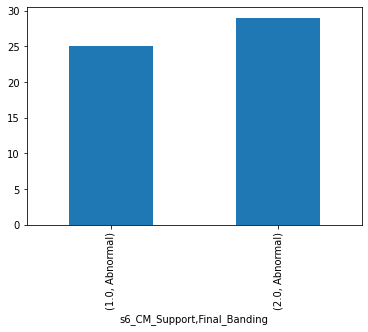

In [103]:
# 1 - Yes, 2 - No
s6_CM_Support = IV4[['s6_CM_Support', 'Final_Banding', 'Cohort_ID']]
s6_CM_Support_0 = s6_CM_Support[~s6_CM_Support['Final_Banding'].str.contains('Normal')]
supfreq1 = s6_CM_Support_0.groupby(['s6_CM_Support', 'Final_Banding']).size()
supfreq1.plot.bar('s6_CM_Support', 'Final_Banding')

print(check_score_perc(s6_CM_Support, 's6_CM_Support', 'Final_Banding', 1))
print(check_score_perc(s6_CM_Support, 's6_CM_Support', 'Final_Banding', 2))

print(check_band_perc(s6_CM_Support, 'Final_Banding', 's6_CM_Support', 'Normal'))
print(check_band_perc(s6_CM_Support, 'Final_Banding', 's6_CM_Support', 'Abnormal'))

##Academic Expectation 


In [104]:
Acad_Expect = all_data[['Prepared_SecondSchool', 'Stay_School_Age16', 'Likelihood_Uni', 's5_Expectations_CM_Age15', 's5_Likelihood_Uni', 's5_Move_SecondSchool_Easy_Difficult', 's5_Stay_School_Age16', 's6_Parents_Subject', 
                        's6_Teachers_Subjects', 's6_Yourself_Subjects', 's6_Someone_Subjects', 's6_Stay_Education', 's6_Likelihood_University', 's6_Expectations_CM_Age16', 's6_Likelihood_Uni', 's7_Likelihood_Uni',
                        's7_Likelihood_University', 'Cohort_ID']]

IV5 = Acad_Expect.merge(DV, on='Cohort_ID')

### Secondary School Move

Normal      83.514774
Abnormal    16.485226
Name: Final_Banding, dtype: float64
Normal      81.218274
Abnormal    18.781726
Name: Final_Banding, dtype: float64
Normal      73.924051
Abnormal    26.075949
Name: Final_Banding, dtype: float64
Normal      76.363636
Abnormal    23.636364
Name: Final_Banding, dtype: float64
Normal      84.415584
Abnormal    15.584416
Name: Final_Banding, dtype: float64
2.0    48.854962
1.0    40.992366
3.0     7.430025
5.0     1.653944
4.0     1.068702
Name: Prepared_SecondSchool, dtype: float64
2.0    49.887640
1.0    35.730337
3.0    11.573034
4.0     1.460674
5.0     1.348315
Name: Prepared_SecondSchool, dtype: float64


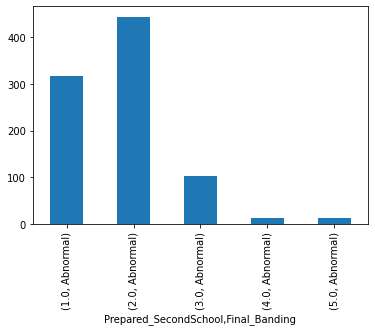

In [105]:
#Teacher Report
#1 - Fully Prepared, 4 - Not at all, 5 - Not going 
Prepared_SecondSchool = IV5[['Prepared_SecondSchool', 'Final_Banding', 'Cohort_ID']]
Prepared_SecondSchool_0 = Prepared_SecondSchool[~Prepared_SecondSchool['Final_Banding'].str.contains('Normal')]
expfreq1 = Prepared_SecondSchool_0.groupby(['Prepared_SecondSchool', 'Final_Banding']).size()
expfreq1.plot.bar('Prepared_SecondSchool', 'Final_Banding')

print(check_score_perc(Prepared_SecondSchool, 'Prepared_SecondSchool', 'Final_Banding', 1))
print(check_score_perc(Prepared_SecondSchool, 'Prepared_SecondSchool', 'Final_Banding', 2))
print(check_score_perc(Prepared_SecondSchool, 'Prepared_SecondSchool', 'Final_Banding', 3))
print(check_score_perc(Prepared_SecondSchool, 'Prepared_SecondSchool', 'Final_Banding', 4))
print(check_score_perc(Prepared_SecondSchool, 'Prepared_SecondSchool', 'Final_Banding', 5))

print(check_band_perc(Prepared_SecondSchool, 'Final_Banding', 'Prepared_SecondSchool', 'Normal'))
print(check_band_perc(Prepared_SecondSchool, 'Final_Banding', 'Prepared_SecondSchool', 'Abnormal'))

Normal      84.315846
Abnormal    15.684154
Name: Final_Banding, dtype: float64
Normal      82.615424
Abnormal    17.384576
Name: Final_Banding, dtype: float64
Normal      79.867257
Abnormal    20.132743
Name: Final_Banding, dtype: float64
Normal      72.594752
Abnormal    27.405248
Name: Final_Banding, dtype: float64
Normal      69.565217
Abnormal    30.434783
Name: Final_Banding, dtype: float64
 2.0    52.811212
 1.0    25.704864
 3.0    11.904369
 4.0     8.211047
 5.0     1.319044
-3.0     0.049464
Name: s5_Move_SecondSchool_Easy_Difficult, dtype: float64
2.0    49.233017
1.0    21.183346
4.0    13.732652
3.0    13.294375
5.0     2.556611
Name: s5_Move_SecondSchool_Easy_Difficult, dtype: float64


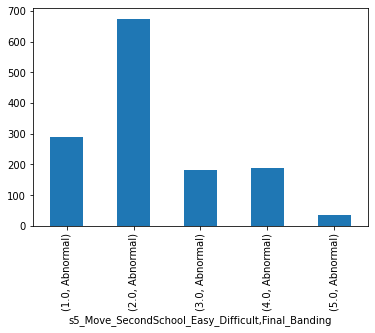

In [106]:
# Parent Report
# 1 - Very Easy, 5 - Very Difficult 
s5_Move_SecondSchool_Easy_Difficult = IV5[['s5_Move_SecondSchool_Easy_Difficult', 'Final_Banding', 'Cohort_ID']]
s5_Move_SecondSchool_Easy_Difficult_0 = s5_Move_SecondSchool_Easy_Difficult[~s5_Move_SecondSchool_Easy_Difficult['Final_Banding'].str.contains('Normal')]
expfreq2 = s5_Move_SecondSchool_Easy_Difficult_0.groupby(['s5_Move_SecondSchool_Easy_Difficult', 'Final_Banding']).size()
expfreq2.plot.bar('s5_Move_SecondSchool_Easy_Difficult', 'Final_Banding')

print(check_score_perc(s5_Move_SecondSchool_Easy_Difficult, 's5_Move_SecondSchool_Easy_Difficult', 'Final_Banding', 1))
print(check_score_perc(s5_Move_SecondSchool_Easy_Difficult, 's5_Move_SecondSchool_Easy_Difficult', 'Final_Banding', 2))
print(check_score_perc(s5_Move_SecondSchool_Easy_Difficult, 's5_Move_SecondSchool_Easy_Difficult', 'Final_Banding', 3))
print(check_score_perc(s5_Move_SecondSchool_Easy_Difficult, 's5_Move_SecondSchool_Easy_Difficult', 'Final_Banding', 4))
print(check_score_perc(s5_Move_SecondSchool_Easy_Difficult, 's5_Move_SecondSchool_Easy_Difficult', 'Final_Banding', 5))

print(check_band_perc(s5_Move_SecondSchool_Easy_Difficult, 'Final_Banding', 's5_Move_SecondSchool_Easy_Difficult', 'Normal'))
print(check_band_perc(s5_Move_SecondSchool_Easy_Difficult, 'Final_Banding', 's5_Move_SecondSchool_Easy_Difficult', 'Abnormal'))

### Post 16

Normal      82.828283
Abnormal    17.171717
Name: Final_Banding, dtype: float64
Normal      81.805746
Abnormal    18.194254
Name: Final_Banding, dtype: float64
Normal      75.892857
Abnormal    24.107143
Name: Final_Banding, dtype: float64
Normal      76.106195
Abnormal    23.893805
Name: Final_Banding, dtype: float64
1.0    56.465187
2.0    30.502423
3.0    10.839072
4.0     2.193318
Name: Stay_School_Age16, dtype: float64
1.0    51.747463
2.0    29.988726
3.0    15.219842
4.0     3.043968
Name: Stay_School_Age16, dtype: float64


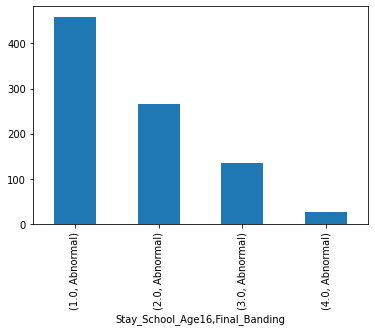

In [107]:
# Teacher Report - Stay in School post 16
# 1 - Very Likely, 4 - Not very likely
Stay_School_Age16 = IV5[['Stay_School_Age16', 'Final_Banding', 'Cohort_ID']]
Stay_School_Age16_0 = Stay_School_Age16[~Stay_School_Age16['Final_Banding'].str.contains('Normal')]
expfreq3 = Stay_School_Age16_0.groupby(['Stay_School_Age16', 'Final_Banding']).size()
expfreq3.plot.bar('Stay_School_Age16', 'Final_Banding')

print(check_score_perc(Stay_School_Age16, 'Stay_School_Age16', 'Final_Banding', 1))
print(check_score_perc(Stay_School_Age16, 'Stay_School_Age16', 'Final_Banding', 2))
print(check_score_perc(Stay_School_Age16, 'Stay_School_Age16', 'Final_Banding', 3))
print(check_score_perc(Stay_School_Age16, 'Stay_School_Age16', 'Final_Banding', 4))

print(check_band_perc(Stay_School_Age16, 'Final_Banding', 'Stay_School_Age16', 'Normal'))
print(check_band_perc(Stay_School_Age16, 'Final_Banding', 'Stay_School_Age16', 'Abnormal'))

Normal      81.838774
Abnormal    18.161226
Name: Final_Banding, dtype: float64
Normal      79.120879
Abnormal    20.879121
Name: Final_Banding, dtype: float64
Normal      77.06422
Abnormal    22.93578
Name: Final_Banding, dtype: float64
Normal      83.636364
Abnormal    16.363636
Name: Final_Banding, dtype: float64
1.0    91.344438
2.0     5.353956
4.0     2.052350
3.0     1.249256
Name: s5_Expectations_CM_Age15, dtype: float64
1.0    90.264901
2.0     6.291391
4.0     1.788079
3.0     1.655629
Name: s5_Expectations_CM_Age15, dtype: float64


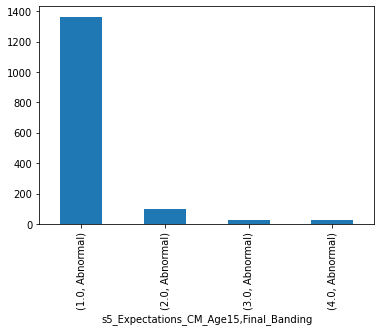

In [108]:
# s5 Parent Report -Expectations for CM post 16
# 1 -Full Education, 2 - Apprenticeship, 3 - Job, 4 - Other
s5_Expectations_CM_Age15 = IV5[['s5_Expectations_CM_Age15', 'Final_Banding', 'Cohort_ID']]
s5_Expectations_CM_Age15_0 = s5_Expectations_CM_Age15[~s5_Expectations_CM_Age15['Final_Banding'].str.contains('Normal')]
expfreq3 = s5_Expectations_CM_Age15_0.groupby(['s5_Expectations_CM_Age15', 'Final_Banding']).size()
expfreq3.plot.bar('s5_Expectations_CM_Age15', 'Final_Banding')

print(check_score_perc(s5_Expectations_CM_Age15, 's5_Expectations_CM_Age15', 'Final_Banding', 1))
print(check_score_perc(s5_Expectations_CM_Age15, 's5_Expectations_CM_Age15', 'Final_Banding', 2))
print(check_score_perc(s5_Expectations_CM_Age15, 's5_Expectations_CM_Age15', 'Final_Banding', 3))
print(check_score_perc(s5_Expectations_CM_Age15, 's5_Expectations_CM_Age15', 'Final_Banding', 4))

print(check_band_perc(s5_Expectations_CM_Age15, 'Final_Banding', 's5_Expectations_CM_Age15', 'Normal'))
print(check_band_perc(s5_Expectations_CM_Age15, 'Final_Banding', 's5_Expectations_CM_Age15', 'Abnormal'))

Normal      81.747187
Abnormal    18.252813
Name: Final_Banding, dtype: float64
Normal      81.205674
Abnormal    18.794326
Name: Final_Banding, dtype: float64
Normal      76.237624
Abnormal    23.762376
Name: Final_Banding, dtype: float64
Normal      80.882353
Abnormal    19.117647
Name: Final_Banding, dtype: float64
1.0    91.279929
2.0     6.769140
3.0     1.138043
4.0     0.812888
Name: s6_Expectations_CM_Age16, dtype: float64
1.0    90.604468
2.0     6.964520
3.0     1.576873
4.0     0.854139
Name: s6_Expectations_CM_Age16, dtype: float64


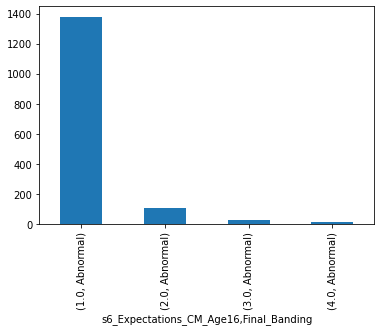

In [109]:
#s6 Parent Report - Expectations post 16 
# 1 -Full Education, 2 - Apprenticeship, 3 - Job, 4 - Other
s6_Expectations_CM_Age16 = IV5[['s6_Expectations_CM_Age16', 'Final_Banding', 'Cohort_ID']]
s6_Expectations_CM_Age16_0 = s6_Expectations_CM_Age16[~s6_Expectations_CM_Age16['Final_Banding'].str.contains('Normal')]
expfreq4 = s6_Expectations_CM_Age16_0.groupby(['s6_Expectations_CM_Age16', 'Final_Banding']).size()
expfreq4.plot.bar('s6_Expectations_CM_Age16', 'Final_Banding')

print(check_score_perc(s6_Expectations_CM_Age16, 's6_Expectations_CM_Age16', 'Final_Banding', 1))
print(check_score_perc(s6_Expectations_CM_Age16, 's6_Expectations_CM_Age16', 'Final_Banding', 2))
print(check_score_perc(s6_Expectations_CM_Age16, 's6_Expectations_CM_Age16', 'Final_Banding', 3))
print(check_score_perc(s6_Expectations_CM_Age16, 's6_Expectations_CM_Age16', 'Final_Banding', 4))

print(check_band_perc(s6_Expectations_CM_Age16, 'Final_Banding', 's6_Expectations_CM_Age16', 'Normal'))
print(check_band_perc(s6_Expectations_CM_Age16, 'Final_Banding', 's6_Expectations_CM_Age16', 'Abnormal'))

### Likelihood attending UNi

Normal      83.426823
Abnormal    16.573177
Name: Final_Banding, dtype: float64
Normal      82.321548
Abnormal    17.678452
Name: Final_Banding, dtype: float64
Normal      78.102926
Abnormal    21.897074
Name: Final_Banding, dtype: float64
Normal      76.582278
Abnormal    23.417722
Name: Final_Banding, dtype: float64
1.0    42.099846
2.0    31.755018
3.0    19.917653
4.0     6.227483
Name: Likelihood_Uni, dtype: float64
1.0    36.889898
2.0    30.079455
3.0    24.631101
4.0     8.399546
Name: Likelihood_Uni, dtype: float64


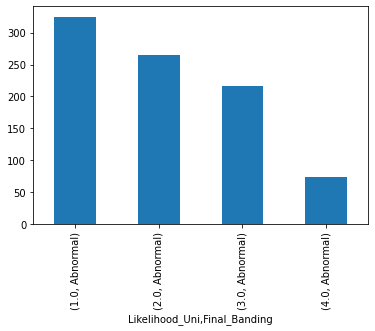

In [110]:
# Teacher Report 
# 1- Very Likely, 4 - Not very likely
Likelihood_Uni = IV5[['Likelihood_Uni', 'Final_Banding', 'Cohort_ID']]
Likelihood_Uni_0 = Likelihood_Uni[~Likelihood_Uni['Final_Banding'].str.contains('Normal')]
expfreq5 = Likelihood_Uni_0.groupby(['Likelihood_Uni', 'Final_Banding']).size()
expfreq5.plot.bar('Likelihood_Uni', 'Final_Banding')

print(check_score_perc(Likelihood_Uni, 'Likelihood_Uni', 'Final_Banding', 1))
print(check_score_perc(Likelihood_Uni, 'Likelihood_Uni', 'Final_Banding', 2))
print(check_score_perc(Likelihood_Uni, 'Likelihood_Uni', 'Final_Banding', 3))
print(check_score_perc(Likelihood_Uni, 'Likelihood_Uni', 'Final_Banding', 4))

print(check_band_perc(Likelihood_Uni, 'Final_Banding', 'Likelihood_Uni', 'Normal'))
print(check_band_perc(Likelihood_Uni, 'Final_Banding', 'Likelihood_Uni', 'Abnormal'))

Normal      83.551457
Abnormal    16.448543
Name: Final_Banding, dtype: float64
Normal      80.315917
Abnormal    19.684083
Name: Final_Banding, dtype: float64
Normal      80.781011
Abnormal    19.218989
Name: Final_Banding, dtype: float64
Normal      76.579926
Abnormal    23.420074
Name: Final_Banding, dtype: float64
1.0    41.837951
2.0    39.380399
3.0    15.713435
4.0     3.068216
Name: s5_Likelihood_Uni, dtype: float64
2.0    42.772277
1.0    36.501650
3.0    16.567657
4.0     4.158416
Name: s5_Likelihood_Uni, dtype: float64


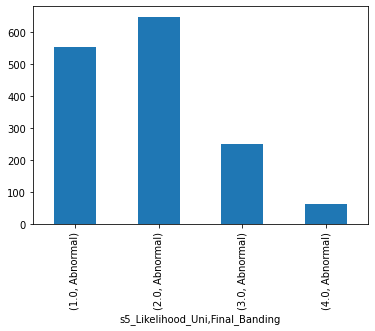

In [111]:
#s5 Parent Report
s5_Likelihood_Uni = IV5[['s5_Likelihood_Uni', 'Final_Banding', 'Cohort_ID']]
s5_Likelihood_Uni_0 = s5_Likelihood_Uni[~s5_Likelihood_Uni['Final_Banding'].str.contains('Normal')]
expfreq6 = s5_Likelihood_Uni_0.groupby(['s5_Likelihood_Uni', 'Final_Banding']).size()
expfreq6.plot.bar('s5_Likelihood_Uni', 'Final_Banding')

print(check_score_perc(s5_Likelihood_Uni, 's5_Likelihood_Uni', 'Final_Banding', 1))
print(check_score_perc(s5_Likelihood_Uni, 's5_Likelihood_Uni', 'Final_Banding', 2))
print(check_score_perc(s5_Likelihood_Uni, 's5_Likelihood_Uni', 'Final_Banding', 3))
print(check_score_perc(s5_Likelihood_Uni, 's5_Likelihood_Uni', 'Final_Banding', 4))

print(check_band_perc(s5_Likelihood_Uni, 'Final_Banding', 's5_Likelihood_Uni', 'Normal'))
print(check_band_perc(s5_Likelihood_Uni, 'Final_Banding', 's5_Likelihood_Uni', 'Abnormal'))

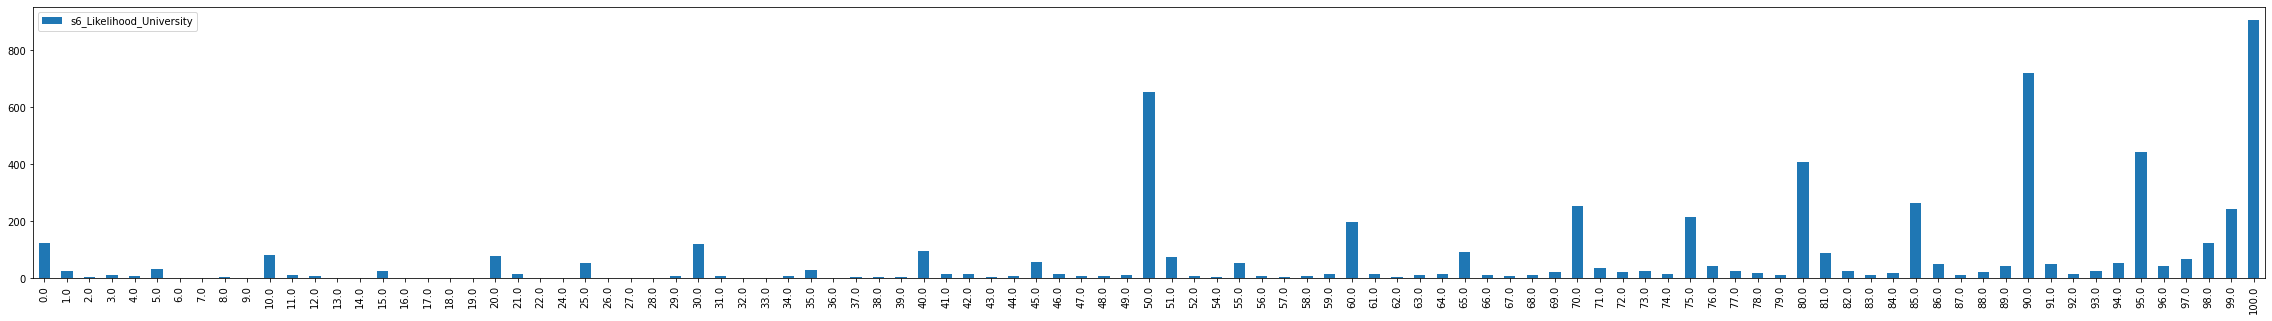

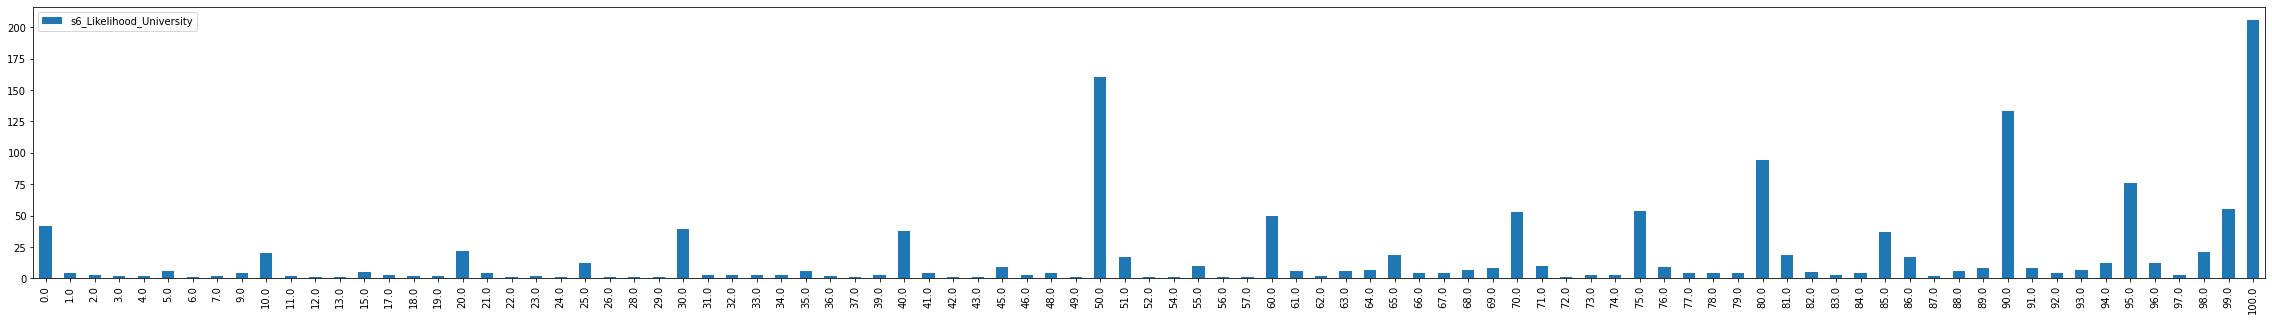

In [112]:
#s6 CM Report
s6_Likelihood_University = IV5[['s6_Likelihood_University', 'Final_Banding', 'Cohort_ID']]
s6_Likelihood_University_Normal = s6_Likelihood_University[s6_Likelihood_University['Final_Banding'] == 'Normal']
s6_Likelihood_University_Abnormal = s6_Likelihood_University[s6_Likelihood_University['Final_Banding'] == 'Abnormal']

expfreq7_0 = s6_Likelihood_University_Normal['s6_Likelihood_University'].value_counts()
expfreq7 = pd.DataFrame(expfreq7_0)
expfreq7 = expfreq7.sort_index()
expfreq7.plot.bar(figsize=(40,5))

expfreq9_0 = s6_Likelihood_University_Abnormal['s6_Likelihood_University'].value_counts()
expfreq9 = pd.DataFrame(expfreq9_0)
expfreq9 = expfreq9.sort_index()
expfreq9.plot.bar(figsize=(40,5))

Normal      83.658537
Abnormal    16.341463
Name: Final_Banding, dtype: float64
Normal      80.054752
Abnormal    19.945248
Name: Final_Banding, dtype: float64
Normal      80.345395
Abnormal    19.654605
Name: Final_Banding, dtype: float64
Normal      75.252525
Abnormal    24.747475
Name: Final_Banding, dtype: float64
1.0    50.799763
2.0    30.316943
3.0    14.469787
4.0     4.413507
Name: s6_Likelihood_Uni, dtype: float64
1.0    44.166117
2.0    33.618985
3.0    15.754779
4.0     6.460119
Name: s6_Likelihood_Uni, dtype: float64


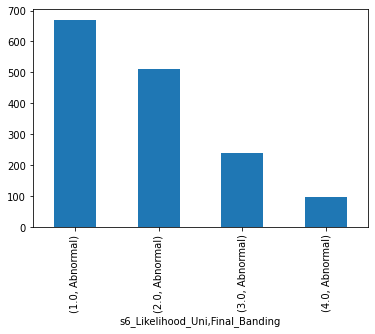

In [113]:
#s6 Parent Report
s6_Likelihood_Uni = IV5[['s6_Likelihood_Uni', 'Final_Banding', 'Cohort_ID']]
s6_Likelihood_Uni_0 = s6_Likelihood_Uni[~s6_Likelihood_Uni['Final_Banding'].str.contains('Normal')]
expfreq10 = s6_Likelihood_Uni_0.groupby(['s6_Likelihood_Uni', 'Final_Banding']).size()
expfreq10.plot.bar('s6_Likelihood_Uni', 'Final_Banding')

print(check_score_perc(s6_Likelihood_Uni, 's6_Likelihood_Uni', 'Final_Banding', 1))
print(check_score_perc(s6_Likelihood_Uni, 's6_Likelihood_Uni', 'Final_Banding', 2))
print(check_score_perc(s6_Likelihood_Uni, 's6_Likelihood_Uni', 'Final_Banding', 3))
print(check_score_perc(s6_Likelihood_Uni, 's6_Likelihood_Uni', 'Final_Banding', 4))

print(check_band_perc(s6_Likelihood_Uni, 'Final_Banding', 's6_Likelihood_Uni', 'Normal'))
print(check_band_perc(s6_Likelihood_Uni, 'Final_Banding', 's6_Likelihood_Uni', 'Abnormal'))

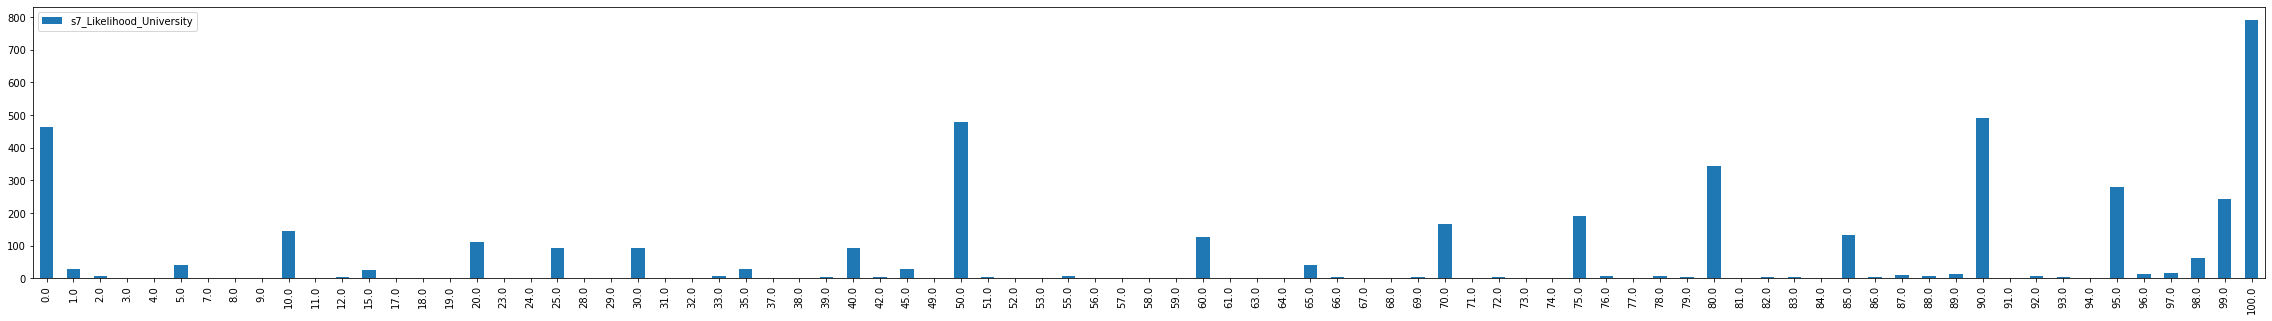

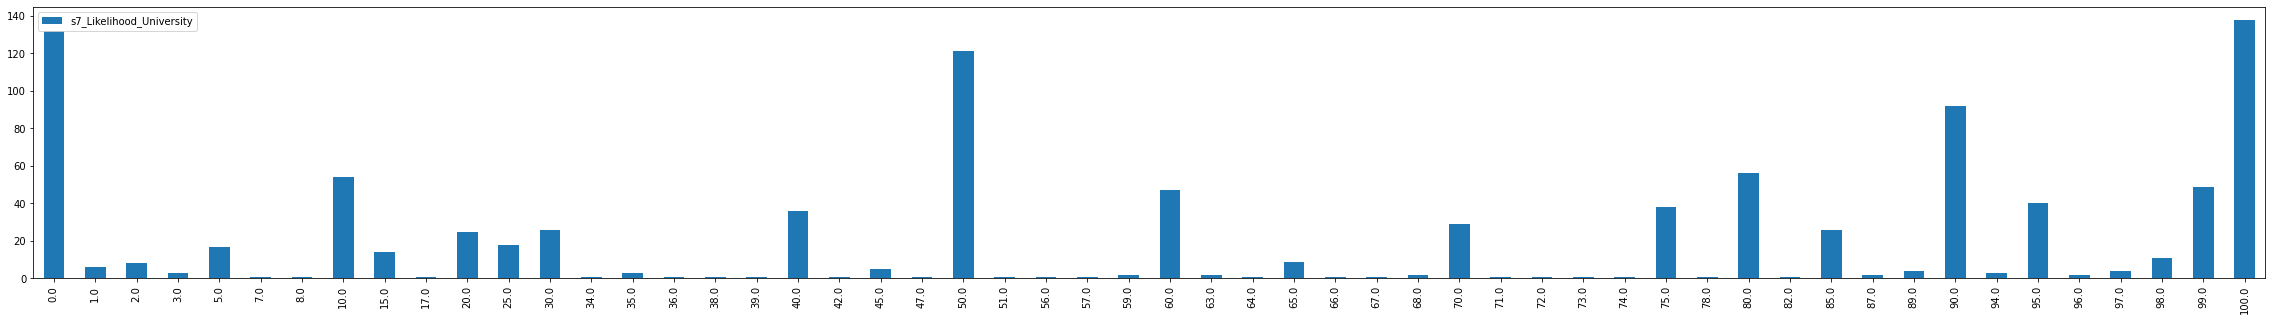

In [114]:
#s7 CM Report
s7_Likelihood_University = IV5[['s7_Likelihood_University', 'Final_Banding', 'Cohort_ID']]
s7_Likelihood_University_Normal = s7_Likelihood_University[s6_Likelihood_University['Final_Banding'] == 'Normal']
s7_Likelihood_University_Abnormal = s7_Likelihood_University[s6_Likelihood_University['Final_Banding'] == 'Abnormal']

expfreq11_0 = s7_Likelihood_University_Normal['s7_Likelihood_University'].value_counts()
expfreq11 = pd.DataFrame(expfreq11_0)
expfreq11 = expfreq11.sort_index()
expfreq11.plot.bar(figsize=(40,5))

expfreq13_0 = s7_Likelihood_University_Abnormal['s7_Likelihood_University'].value_counts()
expfreq13 = pd.DataFrame(expfreq13_0)
expfreq13 = expfreq13.sort_index()
expfreq13.plot.bar(figsize=(40,5))

Normal      85.339652
Abnormal    14.660348
Name: Final_Banding, dtype: float64
Normal      80.573066
Abnormal    19.426934
Name: Final_Banding, dtype: float64
Normal      77.811094
Abnormal    22.188906
Name: Final_Banding, dtype: float64
Normal      78.86057
Abnormal    21.13943
Name: Final_Banding, dtype: float64
1.0    39.738120
2.0    20.685597
7.0    16.492570
3.0    15.271443
4.0     7.738708
5.0     0.058849
6.0     0.014712
Name: s7_Likelihood_Uni, dtype: float64
1.0    30.287206
2.0    22.127937
3.0    19.321149
7.0    19.060052
4.0     9.203655
Name: s7_Likelihood_Uni, dtype: float64


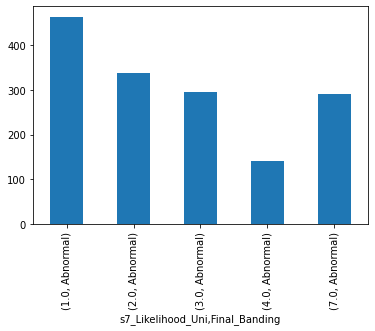

In [115]:
#s7 Parent Report
s7_Likelihood_Uni = IV5[['s7_Likelihood_Uni', 'Final_Banding', 'Cohort_ID']]
s7_Likelihood_Uni_0 = s7_Likelihood_Uni[~s7_Likelihood_Uni['Final_Banding'].str.contains('Normal')]
expfreq10 = s7_Likelihood_Uni_0.groupby(['s7_Likelihood_Uni', 'Final_Banding']).size()
expfreq10.plot.bar('s7_Likelihood_Uni', 'Final_Banding')

print(check_score_perc(s7_Likelihood_Uni, 's7_Likelihood_Uni', 'Final_Banding', 1))
print(check_score_perc(s7_Likelihood_Uni, 's7_Likelihood_Uni', 'Final_Banding', 2))
print(check_score_perc(s7_Likelihood_Uni, 's7_Likelihood_Uni', 'Final_Banding', 3))
print(check_score_perc(s7_Likelihood_Uni, 's7_Likelihood_Uni', 'Final_Banding', 4))

print(check_band_perc(s7_Likelihood_Uni, 'Final_Banding', 's7_Likelihood_Uni', 'Normal'))
print(check_band_perc(s7_Likelihood_Uni, 'Final_Banding', 's7_Likelihood_Uni', 'Abnormal'))

##Parental Involvement 


* s5 Teacher perception of mothers interest in CM's education
* s5 Teacher perception of fathers interest in CM's education
* s5 Who attends CM parent evenings 
* s5 CM Reported parents interest in school 
* s6 Whether anyone attends CM parent evenings 
* s7 Parent's involved in CM School Life

In [116]:
Parent_Involve = all_data[['Interest_Mother', 'Interest_Father', 's5_Attending_Parents_Evening', 's5_Attendent_Respondent', 's5_Attendent_Partner', 's5_Attendent_Grandparent', 's5_Attendent_Non-Resident_Parent', 
                           's5_Attendent_Other_Relative', 's5_Attendent_Dont_Know', 's5_Attendent_Refusal', 's5_Parents_Interested_School', 's6_Attending_Parents_Evening', 's6_Attendent_Respondent', 's6_Attendent_Partner',
                           's6_Attendent_Grandparent', 's6_Attendent_Non-Resident_Parent', 's6_Attendent_Other_Relative', 's7_Involvement_CM_School', 'Cohort_ID']]


IV6 = Parent_Involve.merge(DV, on='Cohort_ID')

###Parental Interest

Normal      82.594836
Abnormal    17.405164
Name: Final_Banding, dtype: float64
Normal      81.083481
Abnormal    18.916519
Name: Final_Banding, dtype: float64
Normal      77.386935
Abnormal    22.613065
Name: Final_Banding, dtype: float64
Normal      77.241379
Abnormal    22.758621
Name: Final_Banding, dtype: float64
Normal      72.131148
Abnormal    27.868852
Name: Final_Banding, dtype: float64
1.0    66.046393
2.0    23.273005
3.0     3.925567
4.0     2.854958
6.0     2.523579
5.0     1.121591
7.0     0.254907
Name: Interest_Mother, dtype: float64
1.0    61.486486
2.0    23.986486
3.0     5.067568
6.0     3.828829
4.0     3.716216
5.0     1.914414
Name: Interest_Mother, dtype: float64


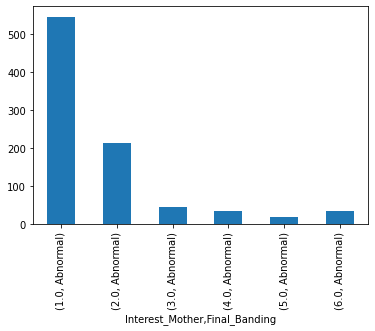

In [117]:
# Teacher Report - Mother
#1 - Very Interested, 5 - Very Uninterested, 6 - Can't Say, 7 - No Mother 
Interest_Mother = IV6[['Interest_Mother', 'Final_Banding', 'Cohort_ID']]
Interest_Mother_0 = Interest_Mother[~Interest_Mother['Final_Banding'].str.contains('Normal')]
supfreq1 = Interest_Mother_0.groupby(['Interest_Mother', 'Final_Banding']).size()
supfreq1.plot.bar('Interest_Mother', 'Final_Banding')

print(check_score_perc(Interest_Mother, 'Interest_Mother', 'Final_Banding', 1))
print(check_score_perc(Interest_Mother, 'Interest_Mother', 'Final_Banding', 2))
print(check_score_perc(Interest_Mother, 'Interest_Mother', 'Final_Banding', 3))
print(check_score_perc(Interest_Mother, 'Interest_Mother', 'Final_Banding', 4))
print(check_score_perc(Interest_Mother, 'Interest_Mother', 'Final_Banding', 5))

print(check_band_perc(Interest_Mother, 'Final_Banding', 'Interest_Mother', 'Normal'))
print(check_band_perc(Interest_Mother, 'Final_Banding', 'Interest_Mother', 'Abnormal'))

Normal      83.356578
Abnormal    16.643422
Name: Final_Banding, dtype: float64
Normal      81.509033
Abnormal    18.490967
Name: Final_Banding, dtype: float64
Normal      80.514706
Abnormal    19.485294
Name: Final_Banding, dtype: float64
Normal      77.319588
Abnormal    22.680412
Name: Final_Banding, dtype: float64
Normal      84.931507
Abnormal    15.068493
Name: Final_Banding, dtype: float64
1.0    46.163749
6.0    22.373841
2.0    19.747683
3.0     5.638517
7.0     2.548919
4.0     1.930999
5.0     1.596292
Name: Interest_Father, dtype: float64
1.0    40.820981
6.0    25.769669
2.0    19.840365
3.0     6.043330
7.0     3.762828
4.0     2.508552
5.0     1.254276
Name: Interest_Father, dtype: float64


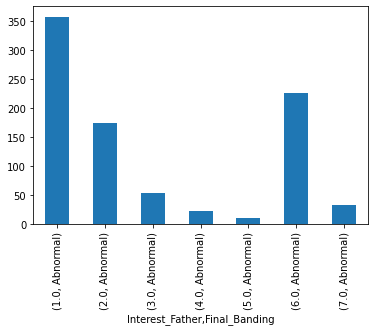

In [118]:
# Teacher Report - Father
#1 - Very Interested, 5 - Very Uninterested, 6 - Can't Say, 7 - No Father
Interest_Father = IV6[['Interest_Father', 'Final_Banding', 'Cohort_ID']]
Interest_Father_0 = Interest_Father[~Interest_Father['Final_Banding'].str.contains('Normal')]
supfreq1 = Interest_Father_0.groupby(['Interest_Father', 'Final_Banding']).size()
supfreq1.plot.bar('Interest_Father', 'Final_Banding')

print(check_score_perc(Interest_Father, 'Interest_Father', 'Final_Banding', 1))
print(check_score_perc(Interest_Father, 'Interest_Father', 'Final_Banding', 2))
print(check_score_perc(Interest_Father, 'Interest_Father', 'Final_Banding', 3))
print(check_score_perc(Interest_Father, 'Interest_Father', 'Final_Banding', 4))
print(check_score_perc(Interest_Father, 'Interest_Father', 'Final_Banding', 5))

print(check_band_perc(Interest_Father, 'Final_Banding', 'Interest_Father', 'Normal'))
print(check_band_perc(Interest_Father, 'Final_Banding', 'Interest_Father', 'Abnormal'))

Normal      82.103498
Abnormal    17.896502
Name: Final_Banding, dtype: float64
Normal      83.073412
Abnormal    16.926588
Name: Final_Banding, dtype: float64
Normal      77.918782
Abnormal    22.081218
Name: Final_Banding, dtype: float64
Normal      74.452555
Abnormal    25.547445
Name: Final_Banding, dtype: float64
1.0    51.658125
2.0    32.921314
3.0    13.883027
4.0     1.537534
Name: s5_Parents_Interested_School, dtype: float64
1.0    50.201613
2.0    29.905914
3.0    17.540323
4.0     2.352151
Name: s5_Parents_Interested_School, dtype: float64


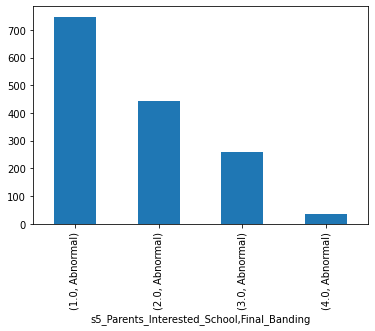

In [119]:
#s5 CM reported 
# 1 - ALl the time, 4 - Never 
s5_Parents_Interested_School = IV6[['s5_Parents_Interested_School', 'Final_Banding', 'Cohort_ID']]
s5_Parents_Interested_School_0 = s5_Parents_Interested_School[~s5_Parents_Interested_School['Final_Banding'].str.contains('Normal')]
supfreq1 = s5_Parents_Interested_School_0.groupby(['s5_Parents_Interested_School', 'Final_Banding']).size()
supfreq1.plot.bar('s5_Parents_Interested_School', 'Final_Banding')

print(check_score_perc(s5_Parents_Interested_School, 's5_Parents_Interested_School', 'Final_Banding', 1))
print(check_score_perc(s5_Parents_Interested_School, 's5_Parents_Interested_School', 'Final_Banding', 2))
print(check_score_perc(s5_Parents_Interested_School, 's5_Parents_Interested_School', 'Final_Banding', 3))
print(check_score_perc(s5_Parents_Interested_School, 's5_Parents_Interested_School', 'Final_Banding', 4))

print(check_band_perc(s5_Parents_Interested_School, 'Final_Banding', 's5_Parents_Interested_School', 'Normal'))
print(check_band_perc(s5_Parents_Interested_School, 'Final_Banding', 's5_Parents_Interested_School', 'Abnormal'))

Normal      83.452426
Abnormal    16.547574
Name: Final_Banding, dtype: float64
Normal      83.344459
Abnormal    16.655541
Name: Final_Banding, dtype: float64
Normal      79.213483
Abnormal    20.786517
Name: Final_Banding, dtype: float64
Normal      73.770492
Abnormal    26.229508
Name: Final_Banding, dtype: float64
2.0    36.736796
1.0    32.646756
7.0    21.656613
3.0     8.297778
4.0     0.662057
Name: s7_Involvement_CM_School, dtype: float64
2.0    32.571802
1.0    28.720627
7.0    28.002611
3.0     9.660574
4.0     1.044386
Name: s7_Involvement_CM_School, dtype: float64


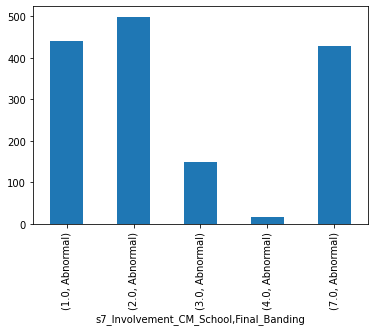

In [120]:
#s7 Parent Reported
# 1 - ALl the time, 4 - Never 
s7_Involvement_CM_School = IV6[['s7_Involvement_CM_School', 'Final_Banding', 'Cohort_ID']]
s7_Involvement_CM_School_0 = s7_Involvement_CM_School[~s7_Involvement_CM_School['Final_Banding'].str.contains('Normal')]
supfreq1 = s7_Involvement_CM_School_0.groupby(['s7_Involvement_CM_School', 'Final_Banding']).size()
supfreq1.plot.bar('s7_Involvement_CM_School', 'Final_Banding')

print(check_score_perc(s7_Involvement_CM_School, 's7_Involvement_CM_School', 'Final_Banding', 1))
print(check_score_perc(s7_Involvement_CM_School, 's7_Involvement_CM_School', 'Final_Banding', 2))
print(check_score_perc(s7_Involvement_CM_School, 's7_Involvement_CM_School', 'Final_Banding', 3))
print(check_score_perc(s7_Involvement_CM_School, 's7_Involvement_CM_School', 'Final_Banding', 4))

print(check_band_perc(s7_Involvement_CM_School, 'Final_Banding', 's7_Involvement_CM_School', 'Normal'))
print(check_band_perc(s7_Involvement_CM_School, 'Final_Banding', 's7_Involvement_CM_School', 'Abnormal'))

### Parent Evenings 

Normal      82.002219
Abnormal    17.997781
Name: Final_Banding, dtype: float64
Normal      76.497696
Abnormal    23.502304
Name: Final_Banding, dtype: float64
1.0    93.310192
3.0     4.070685
2.0     2.619123
Name: s5_Attending_Parents_Evening, dtype: float64
1.0    91.151685
3.0     5.266854
2.0     3.581461
Name: s5_Attending_Parents_Evening, dtype: float64


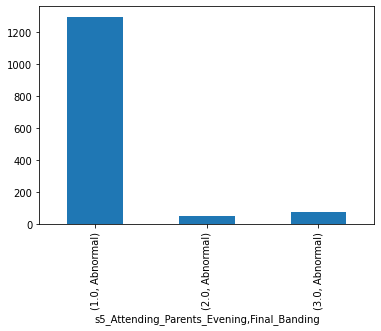

In [121]:
#1 - Yes, 2 - No, 3 - No, none have taken place
s5_Attending_Parents_Evening = IV6[['s5_Attending_Parents_Evening', 'Final_Banding', 'Cohort_ID']]
s5_Attending_Parents_Evening_0 = s5_Attending_Parents_Evening[~s5_Attending_Parents_Evening['Final_Banding'].str.contains('Normal')]
supfreq1 = s5_Attending_Parents_Evening_0.groupby(['s5_Attending_Parents_Evening', 'Final_Banding']).size()
supfreq1.plot.bar('s5_Attending_Parents_Evening', 'Final_Banding')

print(check_score_perc(s5_Attending_Parents_Evening, 's5_Attending_Parents_Evening', 'Final_Banding', 1))
print(check_score_perc(s5_Attending_Parents_Evening, 's5_Attending_Parents_Evening', 'Final_Banding', 2))

print(check_band_perc(s5_Attending_Parents_Evening, 'Final_Banding', 's5_Attending_Parents_Evening', 'Normal'))
print(check_band_perc(s5_Attending_Parents_Evening, 'Final_Banding', 's5_Attending_Parents_Evening', 'Abnormal'))

Normal      82.129561
Abnormal    17.870439
Name: Final_Banding, dtype: float64
Normal      73.799127
Abnormal    26.200873
Name: Final_Banding, dtype: float64
1.0    87.042298
3.0     7.623106
2.0     5.334596
Name: s6_Attending_Parents_Evening, dtype: float64
1.0    83.740405
2.0     8.374040
3.0     7.885555
Name: s6_Attending_Parents_Evening, dtype: float64


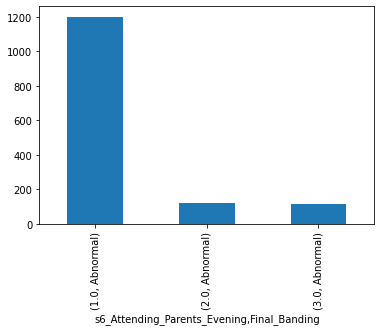

In [122]:
#1 - Yes, 2 - No, 3 - No, none have taken place
s6_Attending_Parents_Evening = IV6[['s6_Attending_Parents_Evening', 'Final_Banding', 'Cohort_ID']]
s6_Attending_Parents_Evening_0 = s6_Attending_Parents_Evening[~s6_Attending_Parents_Evening['Final_Banding'].str.contains('Normal')]
supfreq1 = s6_Attending_Parents_Evening_0.groupby(['s6_Attending_Parents_Evening', 'Final_Banding']).size()
supfreq1.plot.bar('s6_Attending_Parents_Evening', 'Final_Banding')

print(check_score_perc(s6_Attending_Parents_Evening, 's6_Attending_Parents_Evening', 'Final_Banding', 1))
print(check_score_perc(s6_Attending_Parents_Evening, 's6_Attending_Parents_Evening', 'Final_Banding', 2))

print(check_band_perc(s6_Attending_Parents_Evening, 'Final_Banding', 's6_Attending_Parents_Evening', 'Normal'))
print(check_band_perc(s6_Attending_Parents_Evening, 'Final_Banding', 's6_Attending_Parents_Evening', 'Abnormal'))

##School Enviroment 



* s5 Number of Children in CM class
* s5 Single or mixed sex school (Primary & Secondary)
* s5 Religious School (Primary & Secondary)
* s6 Number of Schools CM has attended
* s6 Single or Mixed Sex School
* s6 Religious School
* s7 How many education establishments attended 

In [123]:
School_Enviro = all_data[['Class_Size', 's5_Same_Mixed_Sex', 's5_Faith_School', 's5_SecondSchool_Same_Mixed_Sex', 's5_SecondSchool_Faith', 's6_Num_Schools', 's6_Same_Mixed_Sex', 's6_Faith_School', 
                          's7_Num_Edu_Establishments_Attended', 'Cohort_ID']]

IV7 = School_Enviro.merge(DV, on='Cohort_ID')

### Same or Mixed Sex 

Normal      87.5
Abnormal    12.5
Name: Final_Banding, dtype: float64
Normal      77.068404
Abnormal    22.931596
Name: Final_Banding, dtype: float64
2.0    96.022727
1.0     3.977273
Name: s5_Same_Mixed_Sex, dtype: float64
2.0    98.050139
1.0     1.949861
Name: s5_Same_Mixed_Sex, dtype: float64


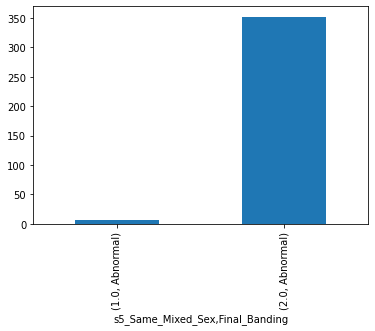

In [124]:
# s5 Parent Report
#1 - Single Sex, 2 - Mixed Sex
s5_Same_Mixed_Sex = IV7[['s5_Same_Mixed_Sex', 'Final_Banding', 'Cohort_ID']]
s5_Same_Mixed_Sex_0 = s5_Same_Mixed_Sex[~s5_Same_Mixed_Sex['Final_Banding'].str.contains('Normal')]
envfreq1 = s5_Same_Mixed_Sex_0.groupby(['s5_Same_Mixed_Sex', 'Final_Banding']).size()
envfreq1.plot.bar('s5_Same_Mixed_Sex', 'Final_Banding')

print(check_score_perc(s5_Same_Mixed_Sex, 's5_Same_Mixed_Sex', 'Final_Banding', 1))
print(check_score_perc(s5_Same_Mixed_Sex, 's5_Same_Mixed_Sex', 'Final_Banding', 2))

print(check_band_perc(s5_Same_Mixed_Sex, 'Final_Banding', 's5_Same_Mixed_Sex', 'Normal'))
print(check_band_perc(s5_Same_Mixed_Sex, 'Final_Banding', 's5_Same_Mixed_Sex', 'Abnormal'))

#56 instances of Same-Sex

Normal      85.322581
Abnormal    14.677419
Name: Final_Banding, dtype: float64
Normal      80.923077
Abnormal    19.076923
Name: Final_Banding, dtype: float64
2.0    88.832594
1.0    11.167406
Name: s5_SecondSchool_Same_Mixed_Sex, dtype: float64
2.0    91.597415
1.0     8.402585
Name: s5_SecondSchool_Same_Mixed_Sex, dtype: float64


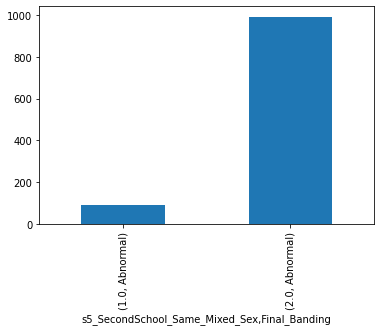

In [125]:
# s5 Parent Report 
#1 - Single Sex, 2 - Mixed Sex
s5_SecondSchool_Same_Mixed_Sex = IV7[['s5_SecondSchool_Same_Mixed_Sex', 'Final_Banding', 'Cohort_ID']]
s5_SecondSchool_Same_Mixed_Sex_0 = s5_SecondSchool_Same_Mixed_Sex[~s5_SecondSchool_Same_Mixed_Sex['Final_Banding'].str.contains('Normal')]
envfreq2 = s5_SecondSchool_Same_Mixed_Sex_0.groupby(['s5_SecondSchool_Same_Mixed_Sex', 'Final_Banding']).size()
envfreq2.plot.bar('s5_SecondSchool_Same_Mixed_Sex', 'Final_Banding')

print(check_score_perc(s5_SecondSchool_Same_Mixed_Sex, 's5_SecondSchool_Same_Mixed_Sex', 'Final_Banding', 1))
print(check_score_perc(s5_SecondSchool_Same_Mixed_Sex, 's5_SecondSchool_Same_Mixed_Sex', 'Final_Banding', 2))

print(check_band_perc(s5_SecondSchool_Same_Mixed_Sex, 'Final_Banding', 's5_SecondSchool_Same_Mixed_Sex', 'Normal'))
print(check_band_perc(s5_SecondSchool_Same_Mixed_Sex, 'Final_Banding', 's5_SecondSchool_Same_Mixed_Sex', 'Abnormal'))

#620 Same Sex Schools 

Normal      84.032753
Abnormal    15.967247
Name: Final_Banding, dtype: float64
Normal      81.198469
Abnormal    18.801531
Name: Final_Banding, dtype: float64
2.0    87.042298
1.0    12.957702
Name: s6_Same_Mixed_Sex, dtype: float64
2.0    89.113747
1.0    10.886253
Name: s6_Same_Mixed_Sex, dtype: float64


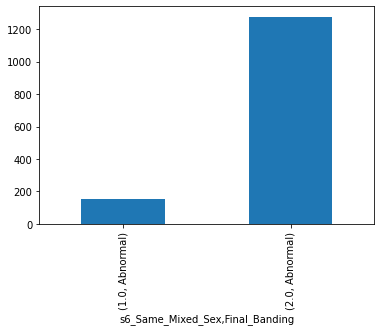

In [126]:
# s6 Parent Report
#1 - Single Sex, 2 - Mixed Sex
s6_Same_Mixed_Sex = IV7[['s6_Same_Mixed_Sex', 'Final_Banding', 'Cohort_ID']]
s6_Same_Mixed_Sex_0 = s6_Same_Mixed_Sex[~s6_Same_Mixed_Sex['Final_Banding'].str.contains('Normal')]
envfreq3 = s6_Same_Mixed_Sex_0.groupby(['s6_Same_Mixed_Sex', 'Final_Banding']).size()
envfreq3.plot.bar('s6_Same_Mixed_Sex', 'Final_Banding')

print(check_score_perc(s6_Same_Mixed_Sex, 's6_Same_Mixed_Sex', 'Final_Banding', 1))
print(check_score_perc(s6_Same_Mixed_Sex, 's6_Same_Mixed_Sex', 'Final_Banding', 2))

print(check_band_perc(s6_Same_Mixed_Sex, 'Final_Banding', 's6_Same_Mixed_Sex', 'Normal'))
print(check_band_perc(s6_Same_Mixed_Sex, 'Final_Banding', 's6_Same_Mixed_Sex', 'Abnormal'))

#977 Instances of Same Sex

### Faith School

Normal      77.3634
Abnormal    22.6366
Name: Final_Banding, dtype: float64
Normal      78.475336
Abnormal    21.524664
Name: Final_Banding, dtype: float64
Normal      78.899083
Abnormal    21.100917
Name: Final_Banding, dtype: float64
1.0    76.174210
2.0    14.944492
3.0     7.344150
4.0     0.768574
7.0     0.683177
5.0     0.085397
Name: s5_Faith_School, dtype: float64
1.0    78.143713
2.0    14.371257
3.0     6.886228
4.0     0.299401
7.0     0.299401
Name: s5_Faith_School, dtype: float64


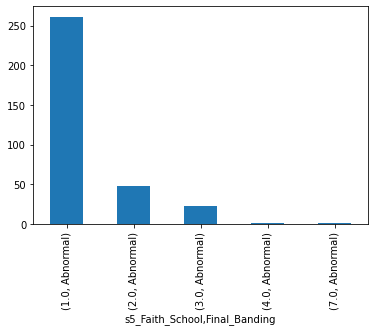

In [127]:
# s5 Parent Report
#1 - No faith, 2 - Christian (CoE), 3 - Christian (Cathotic), 4 - Other Christian, 5 - Jewish, 6 - Muslim, 7 - Other
s5_Faith_School = IV7[['s5_Faith_School', 'Final_Banding', 'Cohort_ID']]
s5_Faith_School_0 = s5_Faith_School[~s5_Faith_School['Final_Banding'].str.contains('Normal')]
envfreq4 = s5_Faith_School_0.groupby(['s5_Faith_School', 'Final_Banding']).size()
envfreq4.plot.bar('s5_Faith_School', 'Final_Banding')

print(check_score_perc(s5_Faith_School, 's5_Faith_School', 'Final_Banding', 1))
print(check_score_perc(s5_Faith_School, 's5_Faith_School', 'Final_Banding', 2))
print(check_score_perc(s5_Faith_School, 's5_Faith_School', 'Final_Banding', 3))

print(check_band_perc(s5_Faith_School, 'Final_Banding', 's5_Faith_School', 'Normal'))
print(check_band_perc(s5_Faith_School, 'Final_Banding', 's5_Faith_School', 'Abnormal'))

Normal      76.630964
Abnormal    23.369036
Name: Final_Banding, dtype: float64
Normal      81.818182
Abnormal    18.181818
Name: Final_Banding, dtype: float64
Normal      84.415584
Abnormal    15.584416
Name: Final_Banding, dtype: float64
1.0    86.483516
3.0     7.142857
2.0     4.945055
4.0     0.439560
6.0     0.439560
7.0     0.439560
5.0     0.109890
Name: s5_SecondSchool_Faith, dtype: float64
1.0    89.887640
3.0     4.494382
2.0     3.745318
4.0     0.749064
6.0     0.374532
5.0     0.374532
7.0     0.374532
Name: s5_SecondSchool_Faith, dtype: float64


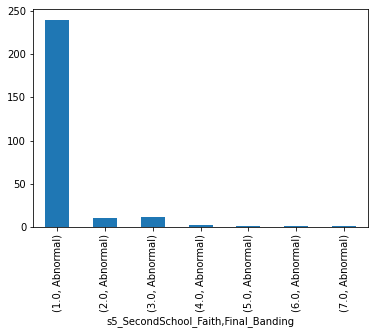

In [128]:
# s5 Parent Report
#1 - No faith, 2 - Christian (CoE), 3 - Christian (Cathotic), 4 - Other Christian, 5 - Jewish, 6 - Muslim, 7 - Other
s5_SecondSchool_Faith = IV7[['s5_SecondSchool_Faith', 'Final_Banding', 'Cohort_ID']]
s5_SecondSchool_Faith_0 = s5_SecondSchool_Faith[~s5_SecondSchool_Faith['Final_Banding'].str.contains('Normal')]
envfreq5 = s5_SecondSchool_Faith_0.groupby(['s5_SecondSchool_Faith', 'Final_Banding']).size()
envfreq5.plot.bar('s5_SecondSchool_Faith', 'Final_Banding')

print(check_score_perc(s5_SecondSchool_Faith, 's5_SecondSchool_Faith', 'Final_Banding', 1))
print(check_score_perc(s5_SecondSchool_Faith, 's5_SecondSchool_Faith', 'Final_Banding', 2))
print(check_score_perc(s5_SecondSchool_Faith, 's5_SecondSchool_Faith', 'Final_Banding', 3))

print(check_band_perc(s5_SecondSchool_Faith, 'Final_Banding', 's5_SecondSchool_Faith', 'Normal'))
print(check_band_perc(s5_SecondSchool_Faith, 'Final_Banding', 's5_SecondSchool_Faith', 'Abnormal'))

Normal      80.893008
Abnormal    19.106992
Name: Final_Banding, dtype: float64
Normal      81.845238
Abnormal    18.154762
Name: Final_Banding, dtype: float64
Normal      85.869565
Abnormal    14.130435
Name: Final_Banding, dtype: float64
1.0    83.904229
3.0     9.664453
2.0     4.806012
4.0     0.664103
6.0     0.454387
7.0     0.367005
5.0     0.139811
Name: s6_Faith_School, dtype: float64
1.0    86.963190
3.0     6.978528
2.0     4.677914
4.0     0.690184
6.0     0.306748
7.0     0.230061
5.0     0.153374
Name: s6_Faith_School, dtype: float64


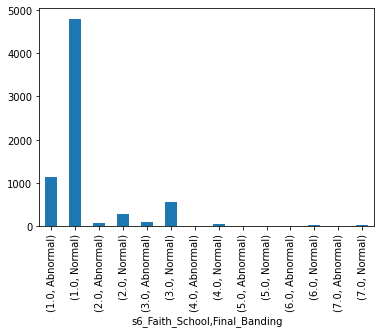

In [129]:
s6_Faith_School = IV7[['s6_Faith_School', 'Final_Banding', 'Cohort_ID']]
envfreq6 = s6_Faith_School.groupby(['s6_Faith_School', 'Final_Banding']).size()
envfreq6.plot.bar('s6_Faith_School', 'Final_Banding')

print(check_score_perc(s6_Faith_School, 's6_Faith_School', 'Final_Banding', 1))
print(check_score_perc(s6_Faith_School, 's6_Faith_School', 'Final_Banding', 2))
print(check_score_perc(s6_Faith_School, 's6_Faith_School', 'Final_Banding', 3))

print(check_band_perc(s6_Faith_School, 'Final_Banding', 's6_Faith_School', 'Normal'))
print(check_band_perc(s6_Faith_School, 'Final_Banding', 's6_Faith_School', 'Abnormal'))

#644 In Catholic School (3)

### Class Size

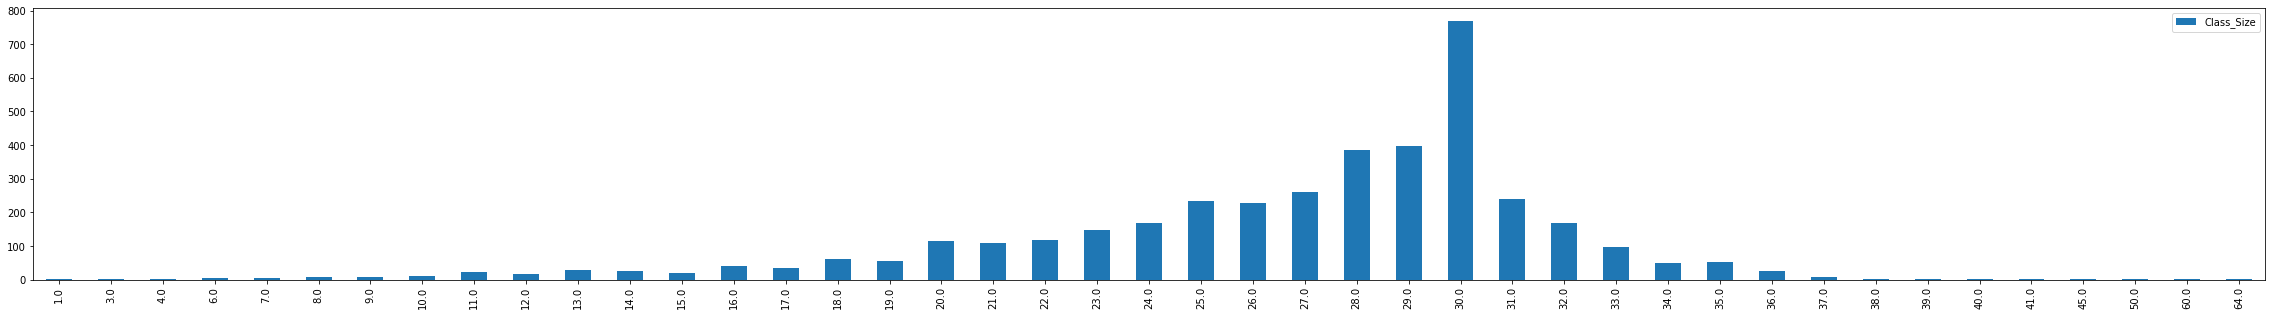

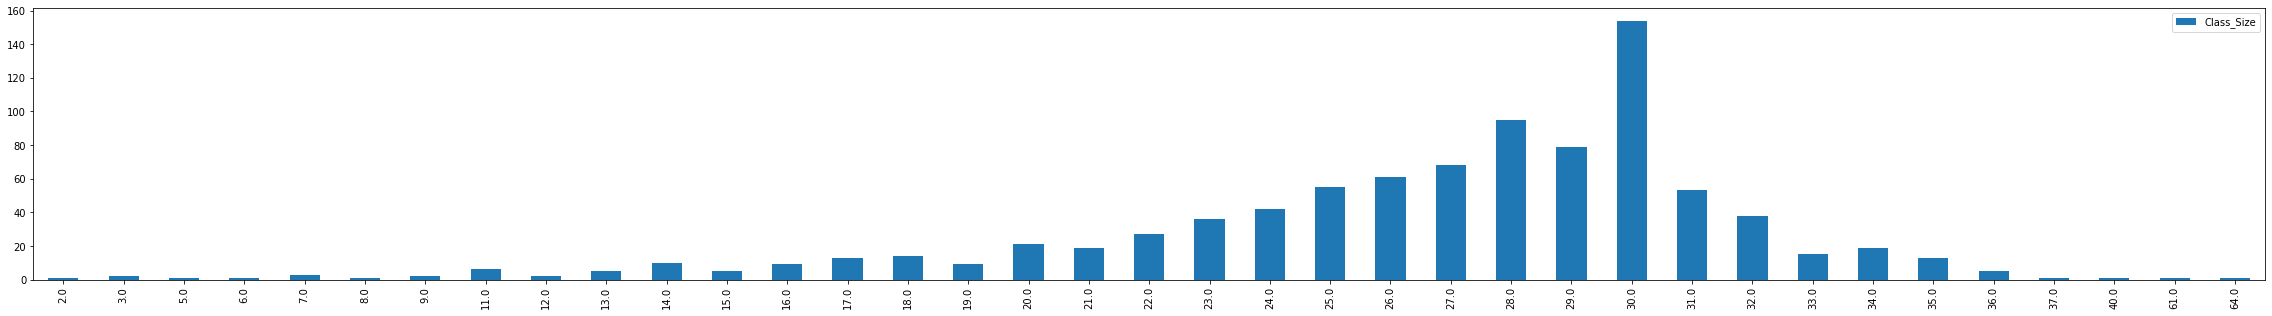

In [130]:
Class_Size = IV7[['Class_Size', 'Final_Banding', 'Cohort_ID']]
ClassSize_Normal = Class_Size[Class_Size['Final_Banding'] == 'Normal']
ClassSize_Abnormal = Class_Size[Class_Size['Final_Banding'] == 'Abnormal']
envfreq7_0 = ClassSize_Normal['Class_Size'].value_counts()
envfreq7 = pd.DataFrame(envfreq7_0)
envfreq7 = envfreq7.sort_index()
envfreq7.plot.bar(figsize=(40,5))

envfreq9_0 = ClassSize_Abnormal['Class_Size'].value_counts()
envfreq9 = pd.DataFrame(envfreq9_0)
envfreq9 = envfreq9.sort_index()
envfreq9.plot.bar(figsize=(40,5))

##Homework 


* s5 Expected time spent on Homework 
* s5 How long does CM spend doing homewokr
* s5 Does anyone help CM with homework
* s5 Does anyone make sure CMs homework is done
* s6 Time CM spends on homework

In [131]:
Homework = all_data[['Time_Homework', 's5_Time_Homework', 's5_Help_Homework', 's5_Check_Homework_Completed', 's6_Time_Homework', 's6_Help_Homework', 'Cohort_ID']]

IV8 = Homework.merge(DV, on='Cohort_ID')

### Time Spent

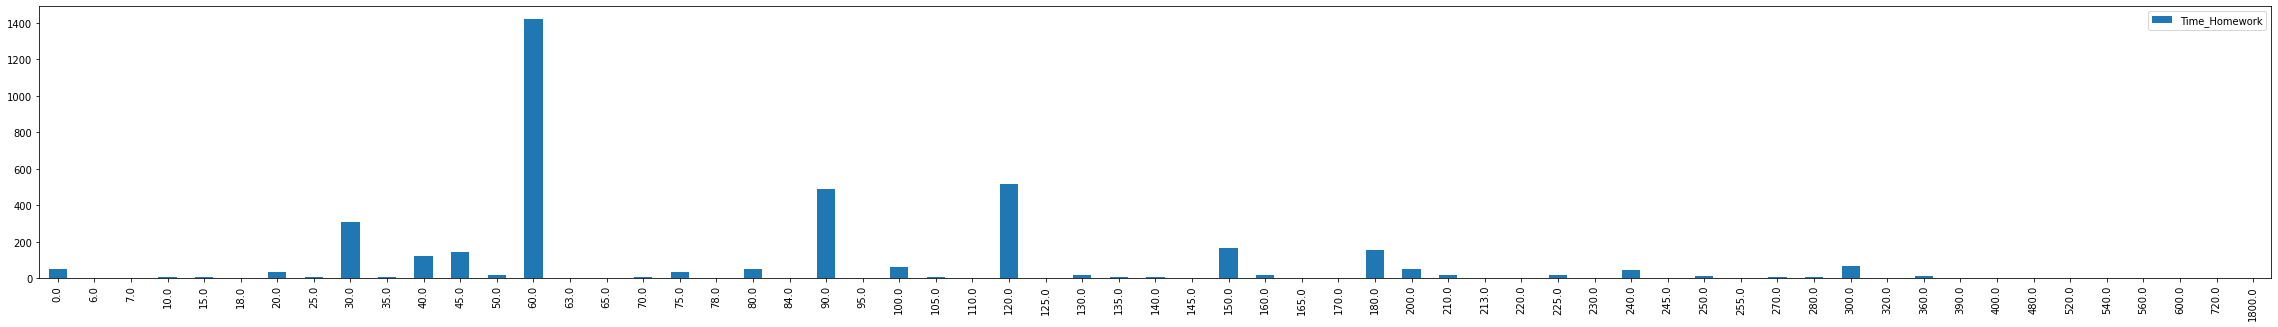

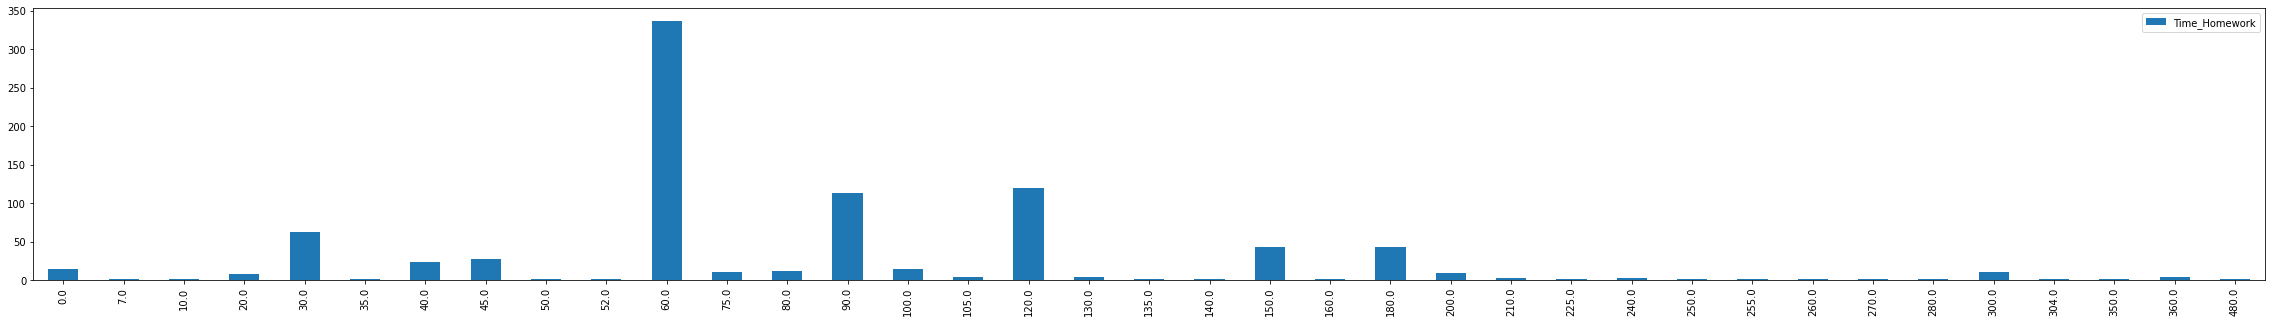

In [132]:
#Teacher Report

Time_Homework = IV8[['Time_Homework', 'Final_Banding', 'Cohort_ID']]
Time_Homework_Normal = Time_Homework[Time_Homework['Final_Banding'] == 'Normal']
Time_Homework_Abnormal = Time_Homework[Time_Homework['Final_Banding'] == 'Abnormal']
homefreq1_0 = Time_Homework_Normal['Time_Homework'].value_counts()
homefreq1 = pd.DataFrame(homefreq1_0)
homefreq1 = homefreq1.sort_index()
homefreq1.plot.bar(figsize=(40,5))

homefreq3_0 = Time_Homework_Abnormal['Time_Homework'].value_counts()
homefreq3 = pd.DataFrame(homefreq3_0)
homefreq3 = homefreq3.sort_index()
homefreq3.plot.bar(figsize=(40,5))

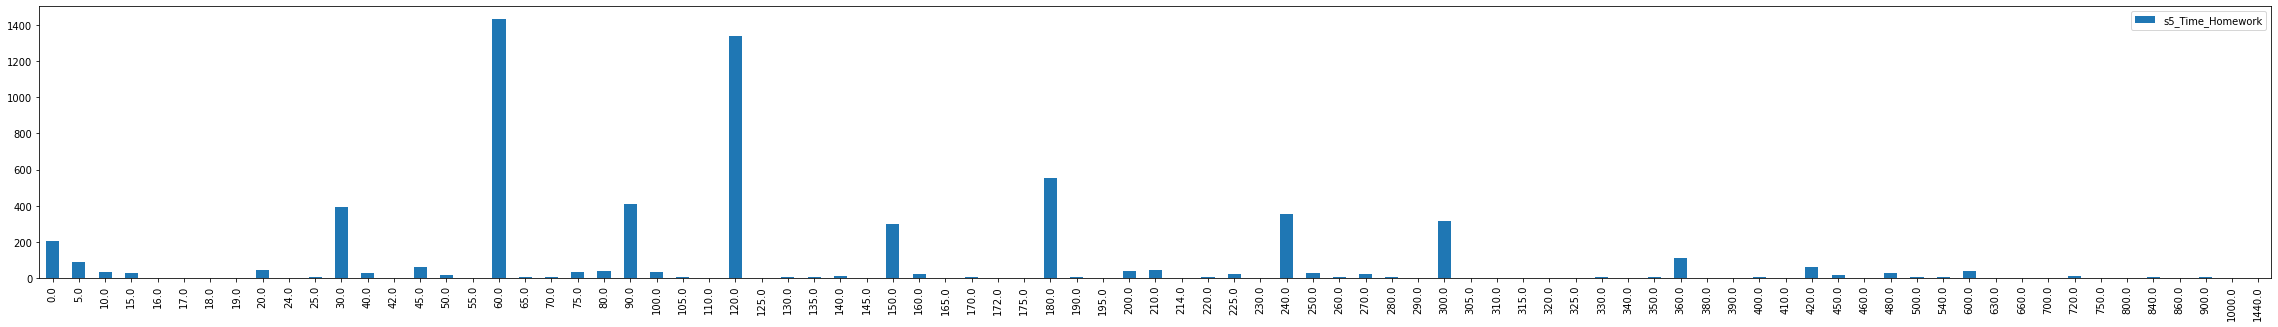

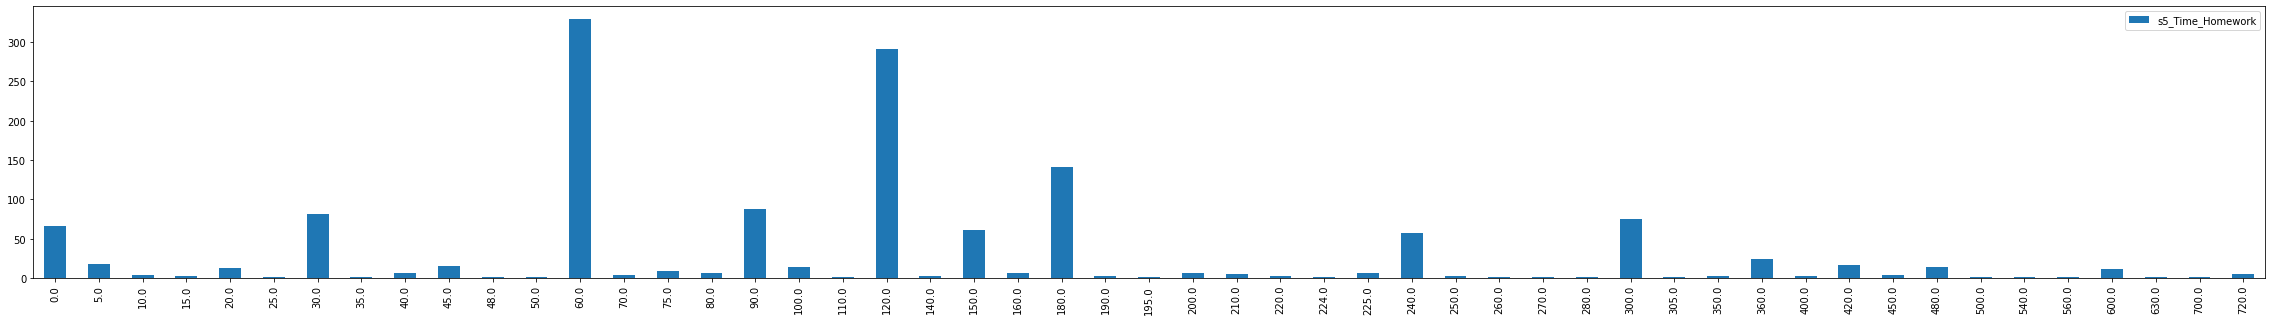

In [133]:
#s5 Parent REport

s5_Time_Homework = IV8[['s5_Time_Homework', 'Final_Banding', 'Cohort_ID']]
s5_Time_Homework_Normal = s5_Time_Homework[s5_Time_Homework['Final_Banding'] == 'Normal']
s5_Time_Homework_Abnormal = s5_Time_Homework[s5_Time_Homework['Final_Banding'] == 'Abnormal']
homefreq4_0 = s5_Time_Homework_Normal['s5_Time_Homework'].value_counts()
homefreq4 = pd.DataFrame(homefreq4_0)
homefreq4 = homefreq4.sort_index()
homefreq4.plot.bar(figsize=(40,5))

homefreq6_0 = s5_Time_Homework_Abnormal['s5_Time_Homework'].value_counts()
homefreq6 = pd.DataFrame(homefreq6_0)
homefreq6 = homefreq6.sort_index()
homefreq6.plot.bar(figsize=(40,5))

Normal      69.793621
Abnormal    30.206379
Name: Final_Banding, dtype: float64
Normal      82.609644
Abnormal    17.390356
Name: Final_Banding, dtype: float64
Normal      81.933962
Abnormal    18.066038
Name: Final_Banding, dtype: float64
Normal      83.050847
Abnormal    16.949153
Name: Final_Banding, dtype: float64
Normal      81.818182
Abnormal    18.181818
Name: Final_Banding, dtype: float64
2.0    56.222156
3.0    25.794476
4.0    10.187110
1.0     5.524206
5.0     2.272052
Name: s6_Time_Homework, dtype: float64
2.0    52.607261
3.0    25.280528
1.0    10.627063
4.0     9.240924
5.0     2.244224
Name: s6_Time_Homework, dtype: float64


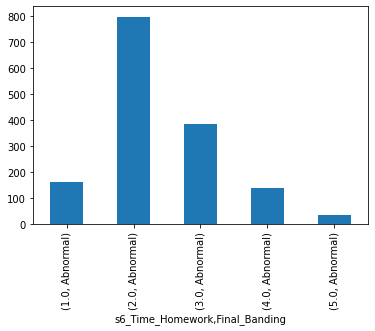

In [134]:
#s6 Report - Per Week
# 1 - None, 2 - 1-3, 3 - 3-5, 4 - 5-10, 5 - +10
s6_Time_Homework = IV8[['s6_Time_Homework', 'Final_Banding', 'Cohort_ID']]
s6_Time_Homework_0 = s6_Time_Homework[~s6_Time_Homework['Final_Banding'].str.contains('Normal')]
homefreq7 = s6_Time_Homework_0.groupby(['s6_Time_Homework', 'Final_Banding']).size()
homefreq7.plot.bar('s6_Time_Homework', 'Final_Banding')

print(check_score_perc(s6_Time_Homework, 's6_Time_Homework', 'Final_Banding', 1))
print(check_score_perc(s6_Time_Homework, 's6_Time_Homework', 'Final_Banding', 2))
print(check_score_perc(s6_Time_Homework, 's6_Time_Homework', 'Final_Banding', 3))
print(check_score_perc(s6_Time_Homework, 's6_Time_Homework', 'Final_Banding', 4))
print(check_score_perc(s6_Time_Homework, 's6_Time_Homework', 'Final_Banding', 5))

print(check_band_perc(s6_Time_Homework, 'Final_Banding', 's6_Time_Homework', 'Normal'))
print(check_band_perc(s6_Time_Homework, 'Final_Banding', 's6_Time_Homework', 'Abnormal'))

### Helps with Homework

Normal      79.821958
Abnormal    20.178042
Name: Final_Banding, dtype: float64
Normal      81.308875
Abnormal    18.691125
Name: Final_Banding, dtype: float64
Normal      83.0
Abnormal    17.0
Name: Final_Banding, dtype: float64
Normal      80.820106
Abnormal    19.179894
Name: Final_Banding, dtype: float64
3.0    43.235991
2.0    25.887924
1.0    21.231255
4.0     9.644830
Name: s5_Help_Homework, dtype: float64
3.0    39.423753
2.0    26.493324
1.0    23.893183
4.0    10.189740
Name: s5_Help_Homework, dtype: float64


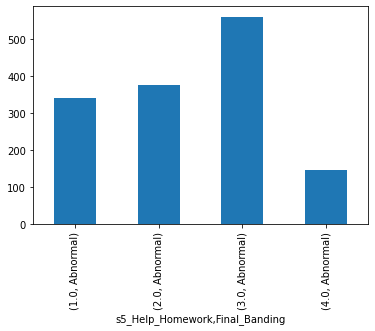

In [135]:
#s5 Parent Report
# 1 - Always, 4 - Never
s5_Help_Homework = IV8[['s5_Help_Homework', 'Final_Banding', 'Cohort_ID']]
s5_Help_Homework_0 = s5_Help_Homework[~s5_Help_Homework['Final_Banding'].str.contains('Normal')]
homefreq8 = s5_Help_Homework_0.groupby(['s5_Help_Homework', 'Final_Banding']).size()
homefreq8.plot.bar('s5_Help_Homework', 'Final_Banding')

print(check_score_perc(s5_Help_Homework, 's5_Help_Homework', 'Final_Banding', 1))
print(check_score_perc(s5_Help_Homework, 's5_Help_Homework', 'Final_Banding', 2))
print(check_score_perc(s5_Help_Homework, 's5_Help_Homework', 'Final_Banding', 3))
print(check_score_perc(s5_Help_Homework, 's5_Help_Homework', 'Final_Banding', 4))

print(check_band_perc(s5_Help_Homework, 'Final_Banding', 's5_Help_Homework', 'Normal'))
print(check_band_perc(s5_Help_Homework, 'Final_Banding', 's5_Help_Homework', 'Abnormal'))

Normal      82.171025
Abnormal    17.828975
Name: Final_Banding, dtype: float64
Normal      81.475319
Abnormal    18.524681
Name: Final_Banding, dtype: float64
Normal      81.0
Abnormal    19.0
Name: Final_Banding, dtype: float64
Normal      77.701149
Abnormal    22.298851
Name: Final_Banding, dtype: float64
1.0    62.513817
2.0    23.195958
3.0     8.953103
4.0     5.337123
Name: s5_Check_Homework_Completed, dtype: float64
1.0    60.365425
2.0    23.471539
3.0     9.346451
4.0     6.816585
Name: s5_Check_Homework_Completed, dtype: float64


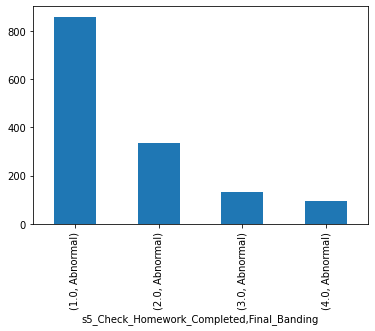

In [136]:
#s5 Parent Report
# 1 - Always, 4 - Never
s5_Check_Homework_Completed = IV8[['s5_Check_Homework_Completed', 'Final_Banding', 'Cohort_ID']]
s5_Check_Homework_Completed_0 = s5_Check_Homework_Completed[~s5_Check_Homework_Completed['Final_Banding'].str.contains('Normal')]
homefreq9 = s5_Check_Homework_Completed_0.groupby(['s5_Check_Homework_Completed', 'Final_Banding']).size()
homefreq9.plot.bar('s5_Check_Homework_Completed', 'Final_Banding')

print(check_score_perc(s5_Check_Homework_Completed, 's5_Check_Homework_Completed', 'Final_Banding', 1))
print(check_score_perc(s5_Check_Homework_Completed, 's5_Check_Homework_Completed', 'Final_Banding', 2))
print(check_score_perc(s5_Check_Homework_Completed, 's5_Check_Homework_Completed', 'Final_Banding', 3))
print(check_score_perc(s5_Check_Homework_Completed, 's5_Check_Homework_Completed', 'Final_Banding', 4))

print(check_band_perc(s5_Check_Homework_Completed, 'Final_Banding', 's5_Check_Homework_Completed', 'Normal'))
print(check_band_perc(s5_Check_Homework_Completed, 'Final_Banding', 's5_Check_Homework_Completed', 'Abnormal'))

Normal      83.188607
Abnormal    16.811393
Name: Final_Banding, dtype: float64
Normal      83.316169
Abnormal    16.683831
Name: Final_Banding, dtype: float64
Normal      80.251142
Abnormal    19.748858
Name: Final_Banding, dtype: float64
Normal      71.8529
Abnormal    28.1471
Name: Final_Banding, dtype: float64
2.0    36.030285
1.0    35.555226
3.0    20.872922
4.0     7.541568
Name: s6_Help_Homework, dtype: float64
2.0    32.079208
1.0    31.947195
3.0    22.838284
4.0    13.135314
Name: s6_Help_Homework, dtype: float64


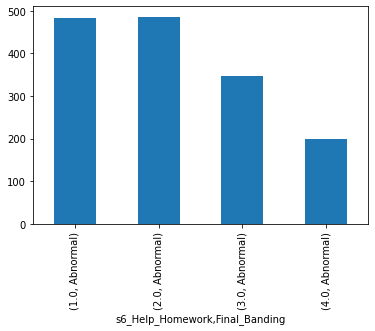

In [137]:
#s6 Parent Report
# 1 - Always, 4 - Never
s6_Help_Homework = IV8[['s6_Help_Homework', 'Final_Banding', 'Cohort_ID']]
s6_Help_Homework_0 = s6_Help_Homework[~s6_Help_Homework['Final_Banding'].str.contains('Normal')]
homefreq10 = s6_Help_Homework_0.groupby(['s6_Help_Homework', 'Final_Banding']).size()
homefreq10.plot.bar('s6_Help_Homework', 'Final_Banding')

print(check_score_perc(s6_Help_Homework, 's6_Help_Homework', 'Final_Banding', 1))
print(check_score_perc(s6_Help_Homework, 's6_Help_Homework', 'Final_Banding', 2))
print(check_score_perc(s6_Help_Homework, 's6_Help_Homework', 'Final_Banding', 3))
print(check_score_perc(s6_Help_Homework, 's6_Help_Homework', 'Final_Banding', 4))

print(check_band_perc(s6_Help_Homework, 'Final_Banding', 's6_Help_Homework', 'Normal'))
print(check_band_perc(s6_Help_Homework, 'Final_Banding', 's6_Help_Homework', 'Abnormal'))

##Post 16

* s7 Where are you currently studying/training
* s7 What are you doing most of the time (EDU/Tra/job)
* s7 Currently attending college full/part time
* s7 Currently doing an Apprenticeship
* s7 Currently doing a traineeship 
* s7 Currently attending university 

In [138]:
Post16 = all_data[['s7_Attending_School', 's7_Part_Full_Time', 's7_Apprenticeship', 's7_Traineeship', 's7_University', 's7_Currently_Doing', 's7_Where_Studying_Training', 'Cohort_ID']]

IV9 = Post16.merge(DV, on='Cohort_ID')

Normal      82.446531
Abnormal    17.553469
Name: Final_Banding, dtype: float64
Normal      71.818182
Abnormal    28.181818
Name: Final_Banding, dtype: float64
1.0    93.025309
2.0     6.974691
Name: s7_Attending_School, dtype: float64
1.0    87.859008
2.0    12.140992
Name: s7_Attending_School, dtype: float64


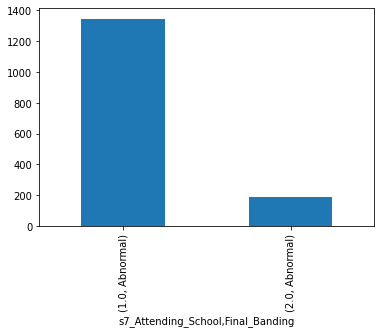

In [139]:
#Attending School
# 1 - Yes, 2 - No
s7_Attending_School = IV9[['s7_Attending_School', 'Final_Banding', 'Cohort_ID']]
s7_Attending_School_0 = s7_Attending_School[~s7_Attending_School['Final_Banding'].str.contains('Normal')]
p16freq1 = s7_Attending_School_0.groupby(['s7_Attending_School', 'Final_Banding']).size()
p16freq1.plot.bar('s7_Attending_School', 'Final_Banding')

print(check_score_perc(s7_Attending_School, 's7_Attending_School', 'Final_Banding', 1))
print(check_score_perc(s7_Attending_School, 's7_Attending_School', 'Final_Banding', 2))

print(check_band_perc(s7_Attending_School, 'Final_Banding', 's7_Attending_School', 'Normal'))
print(check_band_perc(s7_Attending_School, 'Final_Banding', 's7_Attending_School', 'Abnormal'))

Normal      82.628664
Abnormal    17.371336
Name: Final_Banding, dtype: float64
Normal      77.358491
Abnormal    22.641509
Name: Final_Banding, dtype: float64
1.0    96.757355
2.0     3.242645
Name: s7_Part_Full_Time, dtype: float64
1.0    95.542348
2.0     4.457652
Name: s7_Part_Full_Time, dtype: float64


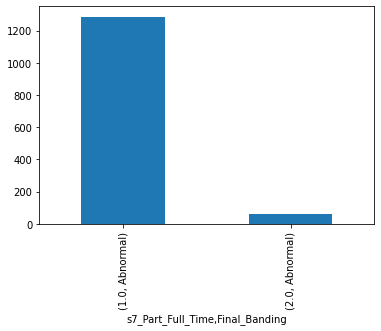

In [140]:
#Part of Full Time education
# 1 - Full Time, 2 - Part Time
s7_Part_Full_Time = IV9[['s7_Part_Full_Time', 'Final_Banding', 'Cohort_ID']]
s7_Part_Full_Time_0 = s7_Part_Full_Time[~s7_Part_Full_Time['Final_Banding'].str.contains('Normal')]
p16freq2 = s7_Part_Full_Time_0.groupby(['s7_Part_Full_Time', 'Final_Banding']).size()
p16freq2.plot.bar('s7_Part_Full_Time', 'Final_Banding')

print(check_score_perc(s7_Part_Full_Time, 's7_Part_Full_Time', 'Final_Banding', 1))
print(check_score_perc(s7_Part_Full_Time, 's7_Part_Full_Time', 'Final_Banding', 2))

print(check_band_perc(s7_Part_Full_Time, 'Final_Banding', 's7_Part_Full_Time', 'Normal'))
print(check_band_perc(s7_Part_Full_Time, 'Final_Banding', 's7_Part_Full_Time', 'Abnormal'))

Normal      82.436261
Abnormal    17.563739
Name: Final_Banding, dtype: float64
Normal      81.567398
Abnormal    18.432602
Name: Final_Banding, dtype: float64
2.0    95.703987
1.0     4.281301
5.0     0.014712
Name: s7_Apprenticeship, dtype: float64
2.0    95.953003
1.0     4.046997
Name: s7_Apprenticeship, dtype: float64


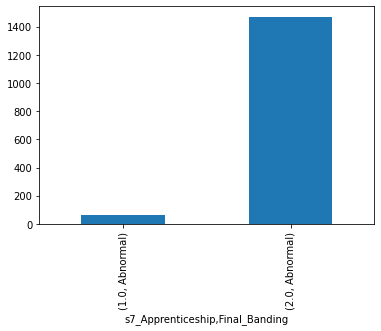

In [141]:
#Apprenticeship
# 1 - Yes, 2 - No
s7_Apprenticeship = IV9[['s7_Apprenticeship', 'Final_Banding', 'Cohort_ID']]
s7_Apprenticeship_0 = s7_Apprenticeship[~s7_Apprenticeship['Final_Banding'].str.contains('Normal')]
p16freq3 = s7_Apprenticeship_0.groupby(['s7_Apprenticeship', 'Final_Banding']).size()
p16freq3.plot.bar('s7_Apprenticeship', 'Final_Banding')

print(check_score_perc(s7_Apprenticeship, 's7_Apprenticeship', 'Final_Banding', 1))
print(check_score_perc(s7_Apprenticeship, 's7_Apprenticeship', 'Final_Banding', 2))

print(check_band_perc(s7_Apprenticeship, 'Final_Banding', 's7_Apprenticeship', 'Normal'))
print(check_band_perc(s7_Apprenticeship, 'Final_Banding', 's7_Apprenticeship', 'Abnormal'))

Normal      75.961538
Abnormal    24.038462
Name: Final_Banding, dtype: float64
Normal      81.717523
Abnormal    18.282477
Name: Final_Banding, dtype: float64
2.0    93.379432
5.0     4.296013
1.0     2.324555
Name: s7_Traineeship, dtype: float64
2.0    92.689295
5.0     4.046997
1.0     3.263708
Name: s7_Traineeship, dtype: float64


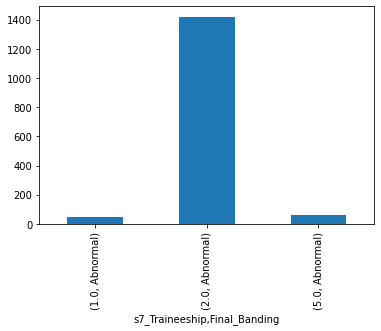

In [142]:
#Traineeship
# 1 - Yes, 2 - No
s7_Traineeship = IV9[['s7_Traineeship', 'Final_Banding', 'Cohort_ID']]
s7_Traineeship_0 = s7_Traineeship[~s7_Traineeship['Final_Banding'].str.contains('Normal')]
p16freq4 = s7_Traineeship_0.groupby(['s7_Traineeship', 'Final_Banding']).size()
p16freq4.plot.bar('s7_Traineeship', 'Final_Banding')

print(check_score_perc(s7_Traineeship, 's7_Traineeship', 'Final_Banding', 1))
print(check_score_perc(s7_Traineeship, 's7_Traineeship', 'Final_Banding', 2))

print(check_band_perc(s7_Traineeship, 'Final_Banding', 's7_Traineeship', 'Normal'))
print(check_band_perc(s7_Traineeship, 'Final_Banding', 's7_Traineeship', 'Abnormal'))

Normal      86.05755
Abnormal    13.94245
Name: Final_Banding, dtype: float64
Normal      82.409178
Abnormal    17.590822
Name: Final_Banding, dtype: float64
Normal      77.266046
Abnormal    22.733954
Name: Final_Banding, dtype: float64
Normal      78.26087
Abnormal    21.73913
Name: Final_Banding, dtype: float64
Normal      76.428571
Abnormal    23.571429
Name: Final_Banding, dtype: float64
Normal      84.269663
Abnormal    15.730337
Name: Final_Banding, dtype: float64
1.0    45.060578
2.0    26.778503
3.0    24.495185
5.0     1.662007
6.0     1.164958
4.0     0.838770
Name: s7_Where_Studying_Training, dtype: float64
1.0    34.457478
3.0    34.017595
2.0    26.979472
5.0     2.419355
4.0     1.099707
6.0     1.026393
Name: s7_Where_Studying_Training, dtype: float64


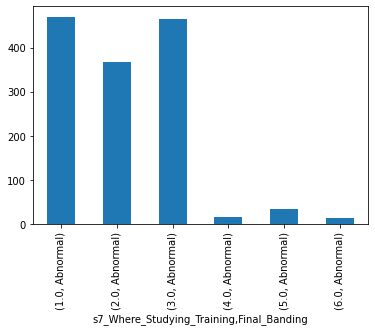

In [143]:
# 1 - 6th Form School, 2 - 6th Form College, 3 - FE College, 4 = Other, 5 - Training Provider, 6 - Specialist College 
s7_Where_Studying_Training = IV9[['s7_Where_Studying_Training', 'Final_Banding', 'Cohort_ID']]
s7_Where_Studying_Training_0 = s7_Where_Studying_Training[~s7_Where_Studying_Training['Final_Banding'].str.contains('Normal')]
p16freq4 = s7_Where_Studying_Training_0.groupby(['s7_Where_Studying_Training', 'Final_Banding']).size()
p16freq4.plot.bar('s7_Where_Studying_Training', 'Final_Banding')

print(check_score_perc(s7_Where_Studying_Training, 's7_Where_Studying_Training', 'Final_Banding', 1))
print(check_score_perc(s7_Where_Studying_Training, 's7_Where_Studying_Training', 'Final_Banding', 2))
print(check_score_perc(s7_Where_Studying_Training, 's7_Where_Studying_Training', 'Final_Banding', 3))
print(check_score_perc(s7_Where_Studying_Training, 's7_Where_Studying_Training', 'Final_Banding', 4))
print(check_score_perc(s7_Where_Studying_Training, 's7_Where_Studying_Training', 'Final_Banding', 5))
print(check_score_perc(s7_Where_Studying_Training, 's7_Where_Studying_Training', 'Final_Banding', 6))

print(check_band_perc(s7_Where_Studying_Training, 'Final_Banding', 's7_Where_Studying_Training', 'Normal'))
print(check_band_perc(s7_Where_Studying_Training, 'Final_Banding', 's7_Where_Studying_Training', 'Abnormal'))

#Feature Reduction - Chi Square Test & Cramer V

In [144]:
# Function to run a Chi Square Test 
def chi2(df, c1, c2):
  contingency = pd.crosstab(df[c1], df[c2])
  crosstab, res = researchpy.crosstab(df[c1], df[c2], test='chi-square')
  degf = min(contingency.shape)- 1
  V = res.iloc[2,1]
  P = res.iloc[1,1]
  print('The Chi Squared Test P Value for {}: {}'.format(c1, P))
  if P <= 0.05:
    print('The variable {} is Associated'.format(c1))
  else:
    print('The variable {} is Not Associated'.format(c1))
  print('The Cramer V value for {}: {}'.format(c1, V))
  if degf == 1:
    if V < 0.10:
      print('Association strength is Negligible')
    elif V < 0.30:
      print('Association strength is Small')
    elif V < 0.50:
      print('Association strength is Medium')
    else:
      print('Association strength is Large')
  elif degf == 2:
    if V < 0.07:
      print('Association strength is Negligible')
    elif V < 0.21:
      print('Association strength is Small')
    elif V < 0.35:
      print('Association strength is Medium')
    else:
      print('Association strength is Large')
  elif degf == 3:
    if V < 0.06:
      print('Association strength is Negligible')
    elif V < 0.17:
      print('Association strength is Small')
    elif V < 0.29:
      print('Association strength is Medium')
    else:
      print('Association strength is Large')
  elif degf == 4:
    if V < 0.05:
      print('Association strength is Negligible')
    elif V < 0.15:
      print('Association strength is Small')
    elif V < 0.25:
      print('Association strength is Medium')
    else:
      print('Association strength is Large')
  else:
    if V < 0.05:
      print('Association strength is Negligible')
    elif V < 0.13:
      print('Association strength is Small')
    elif V < 0.22:
      print('Association strength is Medium')
    else:
      print('Association strength is Large')
  return 

## School Performance

### Teacher Reported Performance

In [145]:
chi2(IV1, 'English_Performance', 'Final_Banding')

The Chi Squared Test P Value for English_Performance: 0.4892
The variable English_Performance is Not Associated
The Cramer V value for English_Performance: 0.0267
Association strength is Negligible


In [146]:
chi2(IV1, 'Maths_Performance', 'Final_Banding')

The Chi Squared Test P Value for Maths_Performance: 0.0001
The variable Maths_Performance is Associated
The Cramer V value for Maths_Performance: 0.0715
Association strength is Negligible


In [147]:
chi2(IV1, 'Science_Performance', 'Final_Banding')

The Chi Squared Test P Value for Science_Performance: 0.0014
The variable Science_Performance is Associated
The Cramer V value for Science_Performance: 0.0607
Association strength is Negligible


#### Female

In [148]:
chi2(female, 'English_Performance', 'Final_Banding')

The Chi Squared Test P Value for English_Performance: 0.0522
The variable English_Performance is Not Associated
The Cramer V value for English_Performance: 0.0611
Association strength is Negligible


In [149]:
chi2(female, 'Maths_Performance', 'Final_Banding')

The Chi Squared Test P Value for Maths_Performance: 0.0016
The variable Maths_Performance is Associated
The Cramer V value for Maths_Performance: 0.0833
Association strength is Negligible


In [150]:
chi2(female, 'Science_Performance', 'Final_Banding')

The Chi Squared Test P Value for Science_Performance: 0.0245
The variable Science_Performance is Associated
The Cramer V value for Science_Performance: 0.0668
Association strength is Negligible


#### Male


In [151]:
chi2(male, 'English_Performance', 'Final_Banding')

The Chi Squared Test P Value for English_Performance: 0.5457
The variable English_Performance is Not Associated
The Cramer V value for English_Performance: 0.0365
Association strength is Negligible


In [152]:
chi2(male, 'Maths_Performance', 'Final_Banding')

The Chi Squared Test P Value for Maths_Performance: 0.1164
The variable Maths_Performance is Not Associated
The Cramer V value for Maths_Performance: 0.0567
Association strength is Negligible


In [153]:
chi2(male, 'Science_Performance', 'Final_Banding')

The Chi Squared Test P Value for Science_Performance: 0.0523
The variable Science_Performance is Not Associated
The Cramer V value for Science_Performance: 0.0639
Association strength is Negligible


### Streaming

In [154]:
chi2(IV1, 'Set_English', 'Final_Banding')

The Chi Squared Test P Value for Set_English: 0.1637
The variable Set_English is Not Associated
The Cramer V value for Set_English: 0.0423
Association strength is Negligible


In [155]:
chi2(IV1, 'Set_Maths', 'Final_Banding')

The Chi Squared Test P Value for Set_Maths: 0.0028
The variable Set_Maths is Associated
The Cramer V value for Set_Maths: 0.062
Association strength is Negligible


In [156]:
chi2(IV1, 'Set_Science', 'Final_Banding')

The Chi Squared Test P Value for Set_Science: 0.1441
The variable Set_Science is Not Associated
The Cramer V value for Set_Science: 0.1125
Association strength is Small


#### Female

In [157]:
chi2(female, 'Set_English', 'Final_Banding')

The Chi Squared Test P Value for Set_English: 0.0295
The variable Set_English is Associated
The Cramer V value for Set_English: 0.0829
Association strength is Negligible


In [158]:
chi2(female, 'Set_Maths', 'Final_Banding')

The Chi Squared Test P Value for Set_Maths: 0.0078
The variable Set_Maths is Associated
The Cramer V value for Set_Maths: 0.078
Association strength is Negligible


In [159]:
chi2(female, 'Set_Science', 'Final_Banding')

The Chi Squared Test P Value for Set_Science: 0.1997
The variable Set_Science is Not Associated
The Cramer V value for Set_Science: 0.1451
Association strength is Small


#### Male

In [160]:
chi2(male, 'Set_English', 'Final_Banding')

The Chi Squared Test P Value for Set_English: 0.3604
The variable Set_English is Not Associated
The Cramer V value for Set_English: 0.0453
Association strength is Negligible


In [161]:
chi2(male, 'Set_Maths', 'Final_Banding')

The Chi Squared Test P Value for Set_Maths: 0.1274
The variable Set_Maths is Not Associated
The Cramer V value for Set_Maths: 0.0532
Association strength is Negligible


In [162]:
chi2(male, 'Set_Science', 'Final_Banding')

The Chi Squared Test P Value for Set_Science: 0.693
The variable Set_Science is Not Associated
The Cramer V value for Set_Science: 0.0692
Association strength is Negligible


### CM Subject Performance


In [163]:
chi2(IV1, 's5_Good_English', 'Final_Banding')

The Chi Squared Test P Value for s5_Good_English: 0.0148
The variable s5_Good_English is Associated
The Cramer V value for s5_Good_English: 0.0359
Association strength is Negligible


In [164]:
chi2(IV1, 's6_Good_English', 'Final_Banding')

The Chi Squared Test P Value for s6_Good_English: 0.0004
The variable s6_Good_English is Associated
The Cramer V value for s6_Good_English: 0.0472
Association strength is Negligible


In [165]:
chi2(IV1, 's5_Good_Maths', 'Final_Banding')

The Chi Squared Test P Value for s5_Good_Maths: 0.0
The variable s5_Good_Maths is Associated
The Cramer V value for s5_Good_Maths: 0.0985
Association strength is Negligible


In [166]:
chi2(IV1, 's6_Good_Maths', 'Final_Banding')

The Chi Squared Test P Value for s6_Good_Maths: 0.0
The variable s6_Good_Maths is Associated
The Cramer V value for s6_Good_Maths: 0.111
Association strength is Small


In [167]:
chi2(IV1, 's5_Good_Science', 'Final_Banding')

The Chi Squared Test P Value for s5_Good_Science: 0.0011
The variable s5_Good_Science is Associated
The Cramer V value for s5_Good_Science: 0.0448
Association strength is Negligible


In [168]:
chi2(IV1, 's6_Good_Science', 'Final_Banding')

The Chi Squared Test P Value for s6_Good_Science: 0.0
The variable s6_Good_Science is Associated
The Cramer V value for s6_Good_Science: 0.0525
Association strength is Negligible


#### Female

In [169]:
chi2(female, 's5_Good_English', 'Final_Banding')

The Chi Squared Test P Value for s5_Good_English: 0.0147
The variable s5_Good_English is Associated
The Cramer V value for s5_Good_English: 0.0499
Association strength is Negligible


In [170]:
chi2(female, 's6_Good_English', 'Final_Banding')

The Chi Squared Test P Value for s6_Good_English: 0.0048
The variable s6_Good_English is Associated
The Cramer V value for s6_Good_English: 0.055
Association strength is Negligible


In [171]:
chi2(female, 's5_Good_Maths', 'Final_Banding')

The Chi Squared Test P Value for s5_Good_Maths: 0.0
The variable s5_Good_Maths is Associated
The Cramer V value for s5_Good_Maths: 0.1004
Association strength is Small


In [172]:
chi2(female, 's6_Good_Maths', 'Final_Banding')

The Chi Squared Test P Value for s6_Good_Maths: 0.0
The variable s6_Good_Maths is Associated
The Cramer V value for s6_Good_Maths: 0.1304
Association strength is Small


In [173]:
chi2(female, 's5_Good_Science', 'Final_Banding')

The Chi Squared Test P Value for s5_Good_Science: 0.0514
The variable s5_Good_Science is Not Associated
The Cramer V value for s5_Good_Science: 0.0432
Association strength is Negligible


In [174]:
chi2(female, 's6_Good_Science', 'Final_Banding')

The Chi Squared Test P Value for s6_Good_Science: 0.0017
The variable s6_Good_Science is Associated
The Cramer V value for s6_Good_Science: 0.0595
Association strength is Negligible


#### Male


In [175]:
chi2(male, 's5_Good_English', 'Final_Banding')

The Chi Squared Test P Value for s5_Good_English: 0.0175
The variable s5_Good_English is Associated
The Cramer V value for s5_Good_English: 0.0509
Association strength is Negligible


In [176]:
chi2(male, 's6_Good_English', 'Final_Banding')

The Chi Squared Test P Value for s6_Good_English: 0.0326
The variable s6_Good_English is Associated
The Cramer V value for s6_Good_English: 0.0469
Association strength is Negligible


In [177]:
chi2(male, 's5_Good_Maths', 'Final_Banding')

The Chi Squared Test P Value for s5_Good_Maths: 0.0004
The variable s5_Good_Maths is Associated
The Cramer V value for s5_Good_Maths: 0.0681
Association strength is Negligible


In [178]:
chi2(male, 's6_Good_Maths', 'Final_Banding')

The Chi Squared Test P Value for s6_Good_Maths: 0.0427
The variable s6_Good_Maths is Associated
The Cramer V value for s6_Good_Maths: 0.0453
Association strength is Negligible


In [179]:
chi2(male, 's5_Good_Science', 'Final_Banding')

The Chi Squared Test P Value for s5_Good_Science: 0.0068
The variable s5_Good_Science is Associated
The Cramer V value for s5_Good_Science: 0.0561
Association strength is Negligible


In [180]:
chi2(male, 's6_Good_Science', 'Final_Banding')

The Chi Squared Test P Value for s6_Good_Science: 0.9503
The variable s6_Good_Science is Not Associated
The Cramer V value for s6_Good_Science: 0.0094
Association strength is Negligible


### Age17 Qualifications 

In [181]:
chi2(IV1, 'Qual_GCSE', 'Final_Banding')

The Chi Squared Test P Value for Qual_GCSE: 0.0052
The variable Qual_GCSE is Associated
The Cramer V value for Qual_GCSE: 0.0306
Association strength is Negligible


In [182]:
chi2(IV1, 'GCSE_Sub_Grade', 'Final_Banding')

The Chi Squared Test P Value for GCSE_Sub_Grade: 0.0074
The variable GCSE_Sub_Grade is Associated
The Cramer V value for GCSE_Sub_Grade: 0.1458
Association strength is Small


In [183]:
chi2(IV1, 'Qual_BTEC', 'Final_Banding')

The Chi Squared Test P Value for Qual_BTEC: 0.0247
The variable Qual_BTEC is Associated
The Cramer V value for Qual_BTEC: 0.0246
Association strength is Negligible


In [184]:
chi2(IV1, 'BTEC_Sub_Grade', 'Final_Banding')

The Chi Squared Test P Value for BTEC_Sub_Grade: 0.5201
The variable BTEC_Sub_Grade is Not Associated
The Cramer V value for BTEC_Sub_Grade: 0.0887
Association strength is Negligible


#### Female

In [185]:
chi2(female, 'Qual_GCSE', 'Final_Banding')

The Chi Squared Test P Value for Qual_GCSE: 0.0328
The variable Qual_GCSE is Associated
The Cramer V value for Qual_GCSE: 0.0326
Association strength is Negligible


In [186]:
chi2(female, 'GCSE_Sub_Grade', 'Final_Banding')

The Chi Squared Test P Value for GCSE_Sub_Grade: 0.0002
The variable GCSE_Sub_Grade is Associated
The Cramer V value for GCSE_Sub_Grade: 0.2127
Association strength is Small


In [187]:
chi2(female, 'Qual_BTEC', 'Final_Banding')

The Chi Squared Test P Value for Qual_BTEC: 0.0016
The variable Qual_BTEC is Associated
The Cramer V value for Qual_BTEC: 0.0482
Association strength is Negligible


In [188]:
chi2(female, 'BTEC_Sub_Grade', 'Final_Banding')

The Chi Squared Test P Value for BTEC_Sub_Grade: 0.4449
The variable BTEC_Sub_Grade is Not Associated
The Cramer V value for BTEC_Sub_Grade: 0.1267
Association strength is Small


#### Male

In [189]:
chi2(male, 'Qual_GCSE', 'Final_Banding')

The Chi Squared Test P Value for Qual_GCSE: 0.0105
The variable Qual_GCSE is Associated
The Cramer V value for Qual_GCSE: 0.0403
Association strength is Negligible


In [190]:
chi2(male, 'GCSE_Sub_Grade', 'Final_Banding')

The Chi Squared Test P Value for GCSE_Sub_Grade: 0.2014
The variable GCSE_Sub_Grade is Not Associated
The Cramer V value for GCSE_Sub_Grade: 0.187
Association strength is Small


In [191]:
chi2(male, 'Qual_BTEC', 'Final_Banding')

The Chi Squared Test P Value for Qual_BTEC: 0.7563
The variable Qual_BTEC is Not Associated
The Cramer V value for Qual_BTEC: 0.0049
Association strength is Negligible


In [192]:
chi2(male, 'BTEC_Sub_Grade', 'Final_Banding')

The Chi Squared Test P Value for BTEC_Sub_Grade: 0.6067
The variable BTEC_Sub_Grade is Not Associated
The Cramer V value for BTEC_Sub_Grade: 0.1047
Association strength is Small


## School Attitude

### Percieved CM Attitude

In [193]:
chi2(IV2, 'Enjoys_School', 'Final_Banding')

The Chi Squared Test P Value for Enjoys_School: 0.006
The variable Enjoys_School is Associated
The Cramer V value for Enjoys_School: 0.0507
Association strength is Negligible


In [194]:
chi2(IV2, 's5_CM_Enjoys_School', 'Final_Banding')

The Chi Squared Test P Value for s5_CM_Enjoys_School: 0.0
The variable s5_CM_Enjoys_School is Associated
The Cramer V value for s5_CM_Enjoys_School: 0.0892
Association strength is Negligible


In [195]:
chi2(IV2, 'Bored_School', 'Final_Banding')

The Chi Squared Test P Value for Bored_School: 0.6848
The variable Bored_School is Not Associated
The Cramer V value for Bored_School: 0.0176
Association strength is Negligible


In [196]:
chi2(IV2, 's5_CM_Bored_School', 'Final_Banding')

The Chi Squared Test P Value for s5_CM_Bored_School: 0.0
The variable s5_CM_Bored_School is Associated
The Cramer V value for s5_CM_Bored_School: 0.0565
Association strength is Negligible


In [197]:
chi2(IV2, 'Tries_School', 'Final_Banding')

The Chi Squared Test P Value for Tries_School: 0.4864
The variable Tries_School is Not Associated
The Cramer V value for Tries_School: 0.0225
Association strength is Negligible


In [198]:
chi2(IV2, 'Late_Homework_School', 'Final_Banding')

The Chi Squared Test P Value for Late_Homework_School: 0.48
The variable Late_Homework_School is Not Associated
The Cramer V value for Late_Homework_School: 0.0227
Association strength is Negligible


In [199]:
chi2(IV2, 's5_CM_Excited_SecondSchool', 'Final_Banding')

The Chi Squared Test P Value for s5_CM_Excited_SecondSchool: 0.0005
The variable s5_CM_Excited_SecondSchool is Associated
The Cramer V value for s5_CM_Excited_SecondSchool: 0.0518
Association strength is Negligible


#### Female

In [200]:
chi2(female, 'Enjoys_School', 'Final_Banding')

The Chi Squared Test P Value for Enjoys_School: 0.0
The variable Enjoys_School is Associated
The Cramer V value for Enjoys_School: 0.1174
Association strength is Small


In [201]:
chi2(female, 's5_CM_Enjoys_School', 'Final_Banding')

The Chi Squared Test P Value for s5_CM_Enjoys_School: 0.0
The variable s5_CM_Enjoys_School is Associated
The Cramer V value for s5_CM_Enjoys_School: 0.135
Association strength is Small


In [202]:
chi2(female, 'Bored_School', 'Final_Banding')

The Chi Squared Test P Value for Bored_School: 0.0119
The variable Bored_School is Associated
The Cramer V value for Bored_School: 0.0661
Association strength is Negligible


In [203]:
chi2(female, 's5_CM_Bored_School', 'Final_Banding')

The Chi Squared Test P Value for s5_CM_Bored_School: 0.0
The variable s5_CM_Bored_School is Associated
The Cramer V value for s5_CM_Bored_School: 0.0963
Association strength is Negligible


In [204]:
chi2(female, 'Tries_School', 'Final_Banding')

The Chi Squared Test P Value for Tries_School: 0.0
The variable Tries_School is Associated
The Cramer V value for Tries_School: 0.099
Association strength is Negligible


In [205]:
chi2(female, 'Late_Homework_School', 'Final_Banding')

The Chi Squared Test P Value for Late_Homework_School: 0.0057
The variable Late_Homework_School is Associated
The Cramer V value for Late_Homework_School: 0.0708
Association strength is Negligible


In [206]:
chi2(female, 's5_CM_Excited_SecondSchool', 'Final_Banding')

The Chi Squared Test P Value for s5_CM_Excited_SecondSchool: 0.0339
The variable s5_CM_Excited_SecondSchool is Associated
The Cramer V value for s5_CM_Excited_SecondSchool: 0.0519
Association strength is Negligible


#### Male

In [207]:
chi2(male, 'Enjoys_School', 'Final_Banding')

The Chi Squared Test P Value for Enjoys_School: 0.0025
The variable Enjoys_School is Associated
The Cramer V value for Enjoys_School: 0.0786
Association strength is Negligible


In [208]:
chi2(male, 's5_CM_Enjoys_School', 'Final_Banding')

The Chi Squared Test P Value for s5_CM_Enjoys_School: 0.0
The variable s5_CM_Enjoys_School is Associated
The Cramer V value for s5_CM_Enjoys_School: 0.0927
Association strength is Negligible


In [209]:
chi2(male, 'Bored_School', 'Final_Banding')

The Chi Squared Test P Value for Bored_School: 0.2586
The variable Bored_School is Not Associated
The Cramer V value for Bored_School: 0.0418
Association strength is Negligible


In [210]:
chi2(male, 's5_CM_Bored_School', 'Final_Banding')

The Chi Squared Test P Value for s5_CM_Bored_School: 0.0002
The variable s5_CM_Bored_School is Associated
The Cramer V value for s5_CM_Bored_School: 0.0718
Association strength is Negligible


In [211]:
chi2(male, 'Tries_School', 'Final_Banding')

The Chi Squared Test P Value for Tries_School: 0.2594
The variable Tries_School is Not Associated
The Cramer V value for Tries_School: 0.0417
Association strength is Negligible


In [212]:
chi2(male, 'Late_Homework_School', 'Final_Banding')

The Chi Squared Test P Value for Late_Homework_School: 0.2345
The variable Late_Homework_School is Not Associated
The Cramer V value for Late_Homework_School: 0.0432
Association strength is Negligible


In [213]:
chi2(male, 's5_CM_Excited_SecondSchool', 'Final_Banding')

The Chi Squared Test P Value for s5_CM_Excited_SecondSchool: 0.0147
The variable s5_CM_Excited_SecondSchool is Associated
The Cramer V value for s5_CM_Excited_SecondSchool: 0.0592
Association strength is Negligible


### s5 Enjoyment of Subjects

In [214]:
chi2(IV2, 's5_Like_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Like_School: 0.0
The variable s5_Like_School is Associated
The Cramer V value for s5_Like_School: 0.0663
Association strength is Negligible


In [215]:
chi2(IV2, 's5_Like_English', 'Final_Banding')

The Chi Squared Test P Value for s5_Like_English: 0.018
The variable s5_Like_English is Associated
The Cramer V value for s5_Like_English: 0.0314
Association strength is Negligible


In [216]:
chi2(IV2, 's5_Like_Maths', 'Final_Banding')

The Chi Squared Test P Value for s5_Like_Maths: 0.0
The variable s5_Like_Maths is Associated
The Cramer V value for s5_Like_Maths: 0.0751
Association strength is Negligible


In [217]:
chi2(IV2, 's5_Like_Science', 'Final_Banding')

The Chi Squared Test P Value for s5_Like_Science: 0.0183
The variable s5_Like_Science is Associated
The Cramer V value for s5_Like_Science: 0.0315
Association strength is Negligible


#### Female

In [218]:
chi2(female, 's5_Like_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Like_School: 0.0
The variable s5_Like_School is Associated
The Cramer V value for s5_Like_School: 0.0862
Association strength is Negligible


In [219]:
chi2(female, 's5_Like_English', 'Final_Banding')

The Chi Squared Test P Value for s5_Like_English: 0.0087
The variable s5_Like_English is Associated
The Cramer V value for s5_Like_English: 0.0474
Association strength is Negligible


In [220]:
chi2(female, 's5_Like_Maths', 'Final_Banding')

The Chi Squared Test P Value for s5_Like_Maths: 0.0
The variable s5_Like_Maths is Associated
The Cramer V value for s5_Like_Maths: 0.0843
Association strength is Negligible


In [221]:
chi2(female, 's5_Like_Science', 'Final_Banding')

The Chi Squared Test P Value for s5_Like_Science: 0.0032
The variable s5_Like_Science is Associated
The Cramer V value for s5_Like_Science: 0.0524
Association strength is Negligible


#### Male

In [222]:
chi2(male, 's5_Like_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Like_School: 0.0
The variable s5_Like_School is Associated
The Cramer V value for s5_Like_School: 0.0989
Association strength is Negligible


In [223]:
chi2(male, 's5_Like_English', 'Final_Banding')

The Chi Squared Test P Value for s5_Like_English: 0.0492
The variable s5_Like_English is Associated
The Cramer V value for s5_Like_English: 0.0392
Association strength is Negligible


In [224]:
chi2(male, 's5_Like_Maths', 'Final_Banding')

The Chi Squared Test P Value for s5_Like_Maths: 0.0263
The variable s5_Like_Maths is Associated
The Cramer V value for s5_Like_Maths: 0.0431
Association strength is Negligible


In [225]:
chi2(male, 's5_Like_Science', 'Final_Banding')

The Chi Squared Test P Value for s5_Like_Science: 0.1775
The variable s5_Like_Science is Not Associated
The Cramer V value for s5_Like_Science: 0.0298
Association strength is Negligible


### CM Attitude

#### Tries Hardest 

In [226]:
chi2(IV2, 's5_Try_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Try_School: 0.0025
The variable s5_Try_School is Associated
The Cramer V value for s5_Try_School: 0.0419
Association strength is Negligible


In [227]:
chi2(IV2, 's6_Try_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Try_School: 0.0
The variable s6_Try_School is Associated
The Cramer V value for s6_Try_School: 0.0728
Association strength is Negligible


##### Female

In [228]:
chi2(female, 's5_Try_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Try_School: 0.003
The variable s5_Try_School is Associated
The Cramer V value for s5_Try_School: 0.0573
Association strength is Negligible


In [229]:
chi2(female, 's6_Try_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Try_School: 0.0
The variable s6_Try_School is Associated
The Cramer V value for s6_Try_School: 0.0906
Association strength is Negligible


##### Male

In [230]:
chi2(male, 's5_Try_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Try_School: 0.0006
The variable s5_Try_School is Associated
The Cramer V value for s5_Try_School: 0.0668
Association strength is Negligible


In [231]:
chi2(male, 's6_Try_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Try_School: 0.0005
The variable s6_Try_School is Associated
The Cramer V value for s6_Try_School: 0.0667
Association strength is Negligible


#### Find School Interesting 

In [232]:
chi2(IV2, 's5_School_Interesting', 'Final_Banding')

The Chi Squared Test P Value for s5_School_Interesting: 0.0
The variable s5_School_Interesting is Associated
The Cramer V value for s5_School_Interesting: 0.0603
Association strength is Negligible


In [233]:
chi2(IV2, 's6_School_Interesting', 'Final_Banding')

The Chi Squared Test P Value for s6_School_Interesting: 0.0
The variable s6_School_Interesting is Associated
The Cramer V value for s6_School_Interesting: 0.0939
Association strength is Negligible


##### Female

In [234]:
chi2(female, 's5_School_Interesting', 'Final_Banding')

The Chi Squared Test P Value for s5_School_Interesting: 0.0
The variable s5_School_Interesting is Associated
The Cramer V value for s5_School_Interesting: 0.0874
Association strength is Negligible


In [235]:
chi2(female, 's6_School_Interesting', 'Final_Banding')

The Chi Squared Test P Value for s6_School_Interesting: 0.0
The variable s6_School_Interesting is Associated
The Cramer V value for s6_School_Interesting: 0.1133
Association strength is Small


##### Male

In [236]:
chi2(male, 's5_School_Interesting', 'Final_Banding')

The Chi Squared Test P Value for s5_School_Interesting: 0.0
The variable s5_School_Interesting is Associated
The Cramer V value for s5_School_Interesting: 0.0816
Association strength is Negligible


In [237]:
chi2(male, 's6_School_Interesting', 'Final_Banding')

The Chi Squared Test P Value for s6_School_Interesting: 0.0
The variable s6_School_Interesting is Associated
The Cramer V value for s6_School_Interesting: 0.0792
Association strength is Negligible


#### Unhappy at School

In [238]:
chi2(IV2, 's5_Unhappy_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Unhappy_School: 0.0
The variable s5_Unhappy_School is Associated
The Cramer V value for s5_Unhappy_School: 0.1208
Association strength is Small


In [239]:
chi2(IV2, 's6_Unhappy_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Unhappy_School: 0.0
The variable s6_Unhappy_School is Associated
The Cramer V value for s6_Unhappy_School: 0.2578
Association strength is Small


##### Female

In [240]:
chi2(female, 's5_Unhappy_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Unhappy_School: 0.0
The variable s5_Unhappy_School is Associated
The Cramer V value for s5_Unhappy_School: 0.1447
Association strength is Small


In [241]:
chi2(female, 's6_Unhappy_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Unhappy_School: 0.0
The variable s6_Unhappy_School is Associated
The Cramer V value for s6_Unhappy_School: 0.2869
Association strength is Small


##### Male

In [242]:
chi2(male, 's5_Unhappy_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Unhappy_School: 0.0
The variable s5_Unhappy_School is Associated
The Cramer V value for s5_Unhappy_School: 0.1218
Association strength is Small


In [243]:
chi2(male, 's6_Unhappy_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Unhappy_School: 0.0
The variable s6_Unhappy_School is Associated
The Cramer V value for s6_Unhappy_School: 0.1892
Association strength is Small


#### Gets Tired at School

In [244]:
chi2(IV2, 's5_Tired_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Tired_School: 0.0
The variable s5_Tired_School is Associated
The Cramer V value for s5_Tired_School: 0.0749
Association strength is Negligible


In [245]:
chi2(IV2, 's6_Tired_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Tired_School: 0.0
The variable s6_Tired_School is Associated
The Cramer V value for s6_Tired_School: 0.1727
Association strength is Small


##### Female

In [246]:
chi2(female, 's5_Tired_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Tired_School: 0.0
The variable s5_Tired_School is Associated
The Cramer V value for s5_Tired_School: 0.1039
Association strength is Small


In [247]:
chi2(female, 's6_Tired_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Tired_School: 0.0
The variable s6_Tired_School is Associated
The Cramer V value for s6_Tired_School: 0.188
Association strength is Small


##### Male

In [248]:
chi2(male, 's5_Tired_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Tired_School: 0.0
The variable s5_Tired_School is Associated
The Cramer V value for s5_Tired_School: 0.0788
Association strength is Negligible


In [249]:
chi2(male, 's6_Tired_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Tired_School: 0.0
The variable s6_Tired_School is Associated
The Cramer V value for s6_Tired_School: 0.115
Association strength is Small


#### School Waste of Time

In [250]:
chi2(IV2, 's5_School_Waste', 'Final_Banding')

The Chi Squared Test P Value for s5_School_Waste: 0.0
The variable s5_School_Waste is Associated
The Cramer V value for s5_School_Waste: 0.0731
Association strength is Negligible


In [251]:
chi2(IV2, 's6_School_Waste', 'Final_Banding')

The Chi Squared Test P Value for s6_School_Waste: 0.0
The variable s6_School_Waste is Associated
The Cramer V value for s6_School_Waste: 0.1078
Association strength is Small


##### Female

In [252]:
chi2(female, 's5_School_Waste', 'Final_Banding')

The Chi Squared Test P Value for s5_School_Waste: 0.0
The variable s5_School_Waste is Associated
The Cramer V value for s5_School_Waste: 0.0917
Association strength is Negligible


In [253]:
chi2(female, 's6_School_Waste', 'Final_Banding')

The Chi Squared Test P Value for s6_School_Waste: 0.0
The variable s6_School_Waste is Associated
The Cramer V value for s6_School_Waste: 0.143
Association strength is Small


##### Male

In [254]:
chi2(male, 's5_School_Waste', 'Final_Banding')

The Chi Squared Test P Value for s5_School_Waste: 0.0
The variable s5_School_Waste is Associated
The Cramer V value for s5_School_Waste: 0.1069
Association strength is Small


In [255]:
chi2(male, 's6_School_Waste', 'Final_Banding')

The Chi Squared Test P Value for s6_School_Waste: 0.0001
The variable s6_School_Waste is Associated
The Cramer V value for s6_School_Waste: 0.0728
Association strength is Negligible


#### Cares about School

In [256]:
chi2(IV2, 's5_Care_School_Achievement', 'Final_Banding')

The Chi Squared Test P Value for s5_Care_School_Achievement: 0.0004
The variable s5_Care_School_Achievement is Associated
The Cramer V value for s5_Care_School_Achievement: 0.0477
Association strength is Negligible


In [257]:
chi2(female, 's5_Care_School_Achievement', 'Final_Banding')

The Chi Squared Test P Value for s5_Care_School_Achievement: 0.0001
The variable s5_Care_School_Achievement is Associated
The Cramer V value for s5_Care_School_Achievement: 0.0697
Association strength is Negligible


In [258]:
chi2(male, 's5_Care_School_Achievement', 'Final_Banding')

The Chi Squared Test P Value for s5_Care_School_Achievement: 0.0009
The variable s5_Care_School_Achievement is Associated
The Cramer V value for s5_Care_School_Achievement: 0.0655
Association strength is Negligible


#### Excited Secondary School

In [259]:
chi2(IV2, 's5_Excited_For_SecondSchool', 'Final_Banding')

The Chi Squared Test P Value for s5_Excited_For_SecondSchool: 0.0
The variable s5_Excited_For_SecondSchool is Associated
The Cramer V value for s5_Excited_For_SecondSchool: 0.0566
Association strength is Negligible


In [260]:
chi2(female, 's5_Excited_For_SecondSchool', 'Final_Banding')

The Chi Squared Test P Value for s5_Excited_For_SecondSchool: 0.0173
The variable s5_Excited_For_SecondSchool is Associated
The Cramer V value for s5_Excited_For_SecondSchool: 0.049
Association strength is Negligible


In [261]:
chi2(male, 's5_Excited_For_SecondSchool', 'Final_Banding')

The Chi Squared Test P Value for s5_Excited_For_SecondSchool: 0.0004
The variable s5_Excited_For_SecondSchool is Associated
The Cramer V value for s5_Excited_For_SecondSchool: 0.0683
Association strength is Negligible


#### Focus on School

In [262]:
chi2(IV2, 's6_Keep_Mind_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Keep_Mind_School: 0.0
The variable s6_Keep_Mind_School is Associated
The Cramer V value for s6_Keep_Mind_School: 0.1913
Association strength is Small


In [263]:
chi2(female, 's6_Keep_Mind_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Keep_Mind_School: 0.0
The variable s6_Keep_Mind_School is Associated
The Cramer V value for s6_Keep_Mind_School: 0.2257
Association strength is Small


In [264]:
chi2(male, 's6_Keep_Mind_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Keep_Mind_School: 0.0
The variable s6_Keep_Mind_School is Associated
The Cramer V value for s6_Keep_Mind_School: 0.139
Association strength is Small


#### Happy with School/School Work

In [265]:
chi2(IV2, 's6_Happy_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Happy_School: 0.0
The variable s6_Happy_School is Associated
The Cramer V value for s6_Happy_School: 0.1801
Association strength is Small


In [266]:
chi2(IV2, 's6_Happy_School_Work', 'Final_Banding')

The Chi Squared Test P Value for s6_Happy_School_Work: 0.0
The variable s6_Happy_School_Work is Associated
The Cramer V value for s6_Happy_School_Work: 0.1832
Association strength is Small


##### Female

In [267]:
chi2(female, 's6_Happy_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Happy_School: 0.0
The variable s6_Happy_School is Associated
The Cramer V value for s6_Happy_School: 0.2042
Association strength is Small


In [268]:
chi2(female, 's6_Happy_School_Work', 'Final_Banding')

The Chi Squared Test P Value for s6_Happy_School_Work: 0.0
The variable s6_Happy_School_Work is Associated
The Cramer V value for s6_Happy_School_Work: 0.199
Association strength is Small


##### Male

In [269]:
chi2(male, 's6_Happy_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Happy_School: 0.0
The variable s6_Happy_School is Associated
The Cramer V value for s6_Happy_School: 0.142
Association strength is Small


In [270]:
chi2(male, 's6_Happy_School_Work', 'Final_Banding')

The Chi Squared Test P Value for s6_Happy_School_Work: 0.0
The variable s6_Happy_School_Work is Associated
The Cramer V value for s6_Happy_School_Work: 0.1563
Association strength is Small


## Punishment 

### Misbehaviour 

In [271]:
chi2(IV3, 'Misbehaves_School', 'Final_Banding')

The Chi Squared Test P Value for Misbehaves_School: 0.8182
The variable Misbehaves_School is Not Associated
The Cramer V value for Misbehaves_School: 0.0139
Association strength is Negligible


In [272]:
chi2(IV3, 's5_Misbehave_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Misbehave_School: 0.0017
The variable s5_Misbehave_School is Associated
The Cramer V value for s5_Misbehave_School: 0.0432
Association strength is Negligible


In [273]:
chi2(IV3, 's6_Misbehave_Lessons', 'Final_Banding')

The Chi Squared Test P Value for s6_Misbehave_Lessons: 0.0
The variable s6_Misbehave_Lessons is Associated
The Cramer V value for s6_Misbehave_Lessons: 0.0711
Association strength is Negligible


#### Female

In [274]:
chi2(female, 'Misbehaves_School', 'Final_Banding')

The Chi Squared Test P Value for Misbehaves_School: 0.0025
The variable Misbehaves_School is Associated
The Cramer V value for Misbehaves_School: 0.0755
Association strength is Negligible


In [275]:
chi2(female, 's5_Misbehave_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Misbehave_School: 0.0
The variable s5_Misbehave_School is Associated
The Cramer V value for s5_Misbehave_School: 0.0897
Association strength is Negligible


In [276]:
chi2(female, 's6_Misbehave_Lessons', 'Final_Banding')

The Chi Squared Test P Value for s6_Misbehave_Lessons: 0.0
The variable s6_Misbehave_Lessons is Associated
The Cramer V value for s6_Misbehave_Lessons: 0.0937
Association strength is Negligible


#### Male

In [277]:
chi2(male, 'Misbehaves_School', 'Final_Banding')

The Chi Squared Test P Value for Misbehaves_School: 0.7067
The variable Misbehaves_School is Not Associated
The Cramer V value for Misbehaves_School: 0.0246
Association strength is Negligible


In [278]:
chi2(male, 's5_Misbehave_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Misbehave_School: 0.0001
The variable s5_Misbehave_School is Associated
The Cramer V value for s5_Misbehave_School: 0.0737
Association strength is Negligible


In [279]:
chi2(male, 's6_Misbehave_Lessons', 'Final_Banding')

The Chi Squared Test P Value for s6_Misbehave_Lessons: 0.0
The variable s6_Misbehave_Lessons is Associated
The Cramer V value for s6_Misbehave_Lessons: 0.0768
Association strength is Negligible


### Suspension 

In [280]:
chi2(IV3, 'Suspended_School', 'Final_Banding')

The Chi Squared Test P Value for Suspended_School: 0.0779
The variable Suspended_School is Not Associated
The Cramer V value for Suspended_School: 0.0254
Association strength is Negligible


In [281]:
chi2(IV3, 's5_Temp_Suspension', 'Final_Banding')

The Chi Squared Test P Value for s5_Temp_Suspension: 0.0045
The variable s5_Temp_Suspension is Associated
The Cramer V value for s5_Temp_Suspension: 0.0323
Association strength is Negligible


In [282]:
chi2(IV3, 's6_Temp_Suspension', 'Final_Banding')

The Chi Squared Test P Value for s6_Temp_Suspension: 0.0
The variable s6_Temp_Suspension is Associated
The Cramer V value for s6_Temp_Suspension: 0.0797
Association strength is Negligible


#### Female

In [283]:
chi2(female, 'Suspended_School', 'Final_Banding')

The Chi Squared Test P Value for Suspended_School: 0.0038
The variable Suspended_School is Associated
The Cramer V value for Suspended_School: 0.0578
Association strength is Negligible


In [284]:
chi2(female, 's5_Temp_Suspension', 'Final_Banding')

The Chi Squared Test P Value for s5_Temp_Suspension: 0.0006
The variable s5_Temp_Suspension is Associated
The Cramer V value for s5_Temp_Suspension: 0.0543
Association strength is Negligible


In [285]:
chi2(female, 's6_Temp_Suspension', 'Final_Banding')

The Chi Squared Test P Value for s6_Temp_Suspension: 0.0
The variable s6_Temp_Suspension is Associated
The Cramer V value for s6_Temp_Suspension: 0.0767
Association strength is Negligible


#### Male

In [286]:
chi2(male, 'Suspended_School', 'Final_Banding')

The Chi Squared Test P Value for Suspended_School: 0.086
The variable Suspended_School is Not Associated
The Cramer V value for Suspended_School: 0.0358
Association strength is Negligible


In [287]:
chi2(male, 's5_Temp_Suspension', 'Final_Banding')

The Chi Squared Test P Value for s5_Temp_Suspension: 0.0025
The variable s5_Temp_Suspension is Associated
The Cramer V value for s5_Temp_Suspension: 0.0495
Association strength is Negligible


In [288]:
chi2(male, 's6_Temp_Suspension', 'Final_Banding')

The Chi Squared Test P Value for s6_Temp_Suspension: 0.0
The variable s6_Temp_Suspension is Associated
The Cramer V value for s6_Temp_Suspension: 0.1142
Association strength is Small


### Expellsion 

In [289]:
chi2(IV3, 's5_CM_Expelled', 'Final_Banding')

The Chi Squared Test P Value for s5_CM_Expelled: 0.7309
The variable s5_CM_Expelled is Not Associated
The Cramer V value for s5_CM_Expelled: 0.0039
Association strength is Negligible


In [290]:
chi2(IV3, 's6_CM_Expelled', 'Final_Banding')

The Chi Squared Test P Value for s6_CM_Expelled: 0.0001
The variable s6_CM_Expelled is Associated
The Cramer V value for s6_CM_Expelled: 0.0434
Association strength is Negligible


#### Female

In [291]:
chi2(female, 's5_CM_Expelled', 'Final_Banding')

The Chi Squared Test P Value for s5_CM_Expelled: 1.0
The variable s5_CM_Expelled is Not Associated
The Cramer V value for s5_CM_Expelled: 0.0
Association strength is Negligible


/usr/local/lib/python3.7/dist-packages/researchpy/crosstab.py:94: RuntimeWarning: invalid value encountered in true_divide
  V = numpy.sqrt(test_val / (n * min((num_row - 1), (num_col - 1))))


In [292]:
chi2(female, 's6_CM_Expelled', 'Final_Banding')

The Chi Squared Test P Value for s6_CM_Expelled: 0.5834
The variable s6_CM_Expelled is Not Associated
The Cramer V value for s6_CM_Expelled: 0.0086
Association strength is Negligible


#### Male

In [293]:
chi2(male, 's5_CM_Expelled', 'Final_Banding')

The Chi Squared Test P Value for s5_CM_Expelled: 0.4529
The variable s5_CM_Expelled is Not Associated
The Cramer V value for s5_CM_Expelled: 0.0123
Association strength is Negligible


In [294]:
chi2(male, 's6_CM_Expelled', 'Final_Banding')

The Chi Squared Test P Value for s6_CM_Expelled: 0.0
The variable s6_CM_Expelled is Associated
The Cramer V value for s6_CM_Expelled: 0.0861
Association strength is Negligible


### Missed School 

In [295]:
chi2(IV3, 'Missed_School_NoPermission', 'Final_Banding')

The Chi Squared Test P Value for Missed_School_NoPermission: 0.0311
The variable Missed_School_NoPermission is Associated
The Cramer V value for Missed_School_NoPermission: 0.0311
Association strength is Negligible


In [296]:
chi2(IV3, 's5_Missed_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Missed_School: 0.1546
The variable s5_Missed_School is Not Associated
The Cramer V value for s5_Missed_School: 0.0158
Association strength is Negligible


In [297]:
chi2(IV3, 's6_Missed_School_No_ParenetalPermission', 'Final_Banding')

The Chi Squared Test P Value for s6_Missed_School_No_ParenetalPermission: 0.0
The variable s6_Missed_School_No_ParenetalPermission is Associated
The Cramer V value for s6_Missed_School_No_ParenetalPermission: 0.1032
Association strength is Small


In [298]:
chi2(IV3,  's6_Missed_School_NoPermission', 'Final_Banding')

The Chi Squared Test P Value for s6_Missed_School_NoPermission: 0.2512
The variable s6_Missed_School_NoPermission is Not Associated
The Cramer V value for s6_Missed_School_NoPermission: 0.1022
Association strength is Small


####Female

In [299]:
chi2(female, 'Missed_School_NoPermission', 'Final_Banding')

The Chi Squared Test P Value for Missed_School_NoPermission: 0.0936
The variable Missed_School_NoPermission is Not Associated
The Cramer V value for Missed_School_NoPermission: 0.0335
Association strength is Negligible


In [300]:
chi2(female, 's5_Missed_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Missed_School: 0.0534
The variable s5_Missed_School is Not Associated
The Cramer V value for s5_Missed_School: 0.0297
Association strength is Negligible


In [301]:
chi2(female, 's6_Missed_School_No_ParenetalPermission', 'Final_Banding')

The Chi Squared Test P Value for s6_Missed_School_No_ParenetalPermission: 0.0
The variable s6_Missed_School_No_ParenetalPermission is Associated
The Cramer V value for s6_Missed_School_No_ParenetalPermission: 0.1161
Association strength is Small


In [302]:
chi2(female,  's6_Missed_School_NoPermission', 'Final_Banding')

The Chi Squared Test P Value for s6_Missed_School_NoPermission: 0.1706
The variable s6_Missed_School_NoPermission is Not Associated
The Cramer V value for s6_Missed_School_NoPermission: 0.1537
Association strength is Small


#### Male

In [303]:
chi2(male, 'Missed_School_NoPermission', 'Final_Banding')

The Chi Squared Test P Value for Missed_School_NoPermission: 0.1603
The variable Missed_School_NoPermission is Not Associated
The Cramer V value for Missed_School_NoPermission: 0.0293
Association strength is Negligible


In [304]:
chi2(male, 's5_Missed_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Missed_School: 0.2748
The variable s5_Missed_School is Not Associated
The Cramer V value for s5_Missed_School: 0.0175
Association strength is Negligible


In [305]:
chi2(male, 's6_Missed_School_No_ParenetalPermission', 'Final_Banding')

The Chi Squared Test P Value for s6_Missed_School_No_ParenetalPermission: 0.0
The variable s6_Missed_School_No_ParenetalPermission is Associated
The Cramer V value for s6_Missed_School_No_ParenetalPermission: 0.0901
Association strength is Negligible


In [306]:
chi2(male,  's6_Missed_School_NoPermission', 'Final_Banding')

The Chi Squared Test P Value for s6_Missed_School_NoPermission: 0.0762
The variable s6_Missed_School_NoPermission is Not Associated
The Cramer V value for s6_Missed_School_NoPermission: 0.1808
Association strength is Small


## School Support

In [307]:
chi2(IV4, 'Support_Ind_Teacher', 'Final_Banding')

The Chi Squared Test P Value for Support_Ind_Teacher: 0.0502
The variable Support_Ind_Teacher is Not Associated
The Cramer V value for Support_Ind_Teacher: 0.0286
Association strength is Negligible


In [308]:
chi2(IV4, 'Support_Teacher_Assistant', 'Final_Banding')

The Chi Squared Test P Value for Support_Teacher_Assistant: 0.8076
The variable Support_Teacher_Assistant is Not Associated
The Cramer V value for Support_Teacher_Assistant: 0.0036
Association strength is Negligible


In [309]:
chi2(IV4, 'Support_Group', 'Final_Banding')

The Chi Squared Test P Value for Support_Group: 0.0674
The variable Support_Group is Not Associated
The Cramer V value for Support_Group: 0.0267
Association strength is Negligible


In [310]:
chi2(IV4, 'Support_No_Help', 'Final_Banding')

The Chi Squared Test P Value for Support_No_Help: 0.0262
The variable Support_No_Help is Associated
The Cramer V value for Support_No_Help: 0.0325
Association strength is Negligible


In [311]:
chi2(IV4, 's6_CM_Support', 'Final_Banding')

The Chi Squared Test P Value for s6_CM_Support: 0.5672
The variable s6_CM_Support is Not Associated
The Cramer V value for s6_CM_Support: 0.0375
Association strength is Negligible


### Female

In [312]:
chi2(female, 'Support_Ind_Teacher', 'Final_Banding')

The Chi Squared Test P Value for Support_Ind_Teacher: 0.0069
The variable Support_Ind_Teacher is Associated
The Cramer V value for Support_Ind_Teacher: 0.0547
Association strength is Negligible


In [313]:
chi2(female, 'Support_Teacher_Assistant', 'Final_Banding')

The Chi Squared Test P Value for Support_Teacher_Assistant: 0.684
The variable Support_Teacher_Assistant is Not Associated
The Cramer V value for Support_Teacher_Assistant: 0.0082
Association strength is Negligible


In [314]:
chi2(female, 'Support_Group', 'Final_Banding')

The Chi Squared Test P Value for Support_Group: 0.2074
The variable Support_Group is Not Associated
The Cramer V value for Support_Group: 0.0255
Association strength is Negligible


In [315]:
chi2(female, 'Support_No_Help', 'Final_Banding')

The Chi Squared Test P Value for Support_No_Help: 0.0102
The variable Support_No_Help is Associated
The Cramer V value for Support_No_Help: 0.052
Association strength is Negligible


In [316]:
chi2(female, 's6_CM_Support', 'Final_Banding')

The Chi Squared Test P Value for s6_CM_Support: 0.2792
The variable s6_CM_Support is Not Associated
The Cramer V value for s6_CM_Support: 0.116
Association strength is Small


### Male

In [317]:
chi2(male, 'Support_Ind_Teacher', 'Final_Banding')

The Chi Squared Test P Value for Support_Ind_Teacher: 0.0699
The variable Support_Ind_Teacher is Not Associated
The Cramer V value for Support_Ind_Teacher: 0.0382
Association strength is Negligible


In [318]:
chi2(male, 'Support_Teacher_Assistant', 'Final_Banding')

The Chi Squared Test P Value for Support_Teacher_Assistant: 0.518
The variable Support_Teacher_Assistant is Not Associated
The Cramer V value for Support_Teacher_Assistant: 0.0136
Association strength is Negligible


In [319]:
chi2(male, 'Support_Group', 'Final_Banding')

The Chi Squared Test P Value for Support_Group: 0.0524
The variable Support_Group is Not Associated
The Cramer V value for Support_Group: 0.0409
Association strength is Negligible


In [320]:
chi2(male, 'Support_No_Help', 'Final_Banding')

The Chi Squared Test P Value for Support_No_Help: 0.0044
The variable Support_No_Help is Associated
The Cramer V value for Support_No_Help: 0.06
Association strength is Negligible


In [321]:
chi2(male, 's6_CM_Support', 'Final_Banding')

The Chi Squared Test P Value for s6_CM_Support: 0.9541
The variable s6_CM_Support is Not Associated
The Cramer V value for s6_CM_Support: 0.0048
Association strength is Negligible


## School Expectations 


### Secondary School Move

In [322]:
chi2(IV5, 'Prepared_SecondSchool', 'Final_Banding')

The Chi Squared Test P Value for Prepared_SecondSchool: 0.0002
The variable Prepared_SecondSchool is Associated
The Cramer V value for Prepared_SecondSchool: 0.0672
Association strength is Negligible


In [323]:
chi2(IV5, 's5_Move_SecondSchool_Easy_Difficult', 'Final_Banding')

The Chi Squared Test P Value for s5_Move_SecondSchool_Easy_Difficult: 0.0
The variable s5_Move_SecondSchool_Easy_Difficult is Associated
The Cramer V value for s5_Move_SecondSchool_Easy_Difficult: 0.0916
Association strength is Negligible


#### Female

In [324]:
chi2(female, 'Prepared_SecondSchool', 'Final_Banding')

The Chi Squared Test P Value for Prepared_SecondSchool: 0.0
The variable Prepared_SecondSchool is Associated
The Cramer V value for Prepared_SecondSchool: 0.1256
Association strength is Small


In [325]:
chi2(female, 's5_Move_SecondSchool_Easy_Difficult', 'Final_Banding')

The Chi Squared Test P Value for s5_Move_SecondSchool_Easy_Difficult: 0.0
The variable s5_Move_SecondSchool_Easy_Difficult is Associated
The Cramer V value for s5_Move_SecondSchool_Easy_Difficult: 0.0881
Association strength is Negligible


#### Male

In [326]:
chi2(male, 'Prepared_SecondSchool', 'Final_Banding')

The Chi Squared Test P Value for Prepared_SecondSchool: 0.0476
The variable Prepared_SecondSchool is Associated
The Cramer V value for Prepared_SecondSchool: 0.0645
Association strength is Negligible


In [327]:
chi2(male, 's5_Move_SecondSchool_Easy_Difficult', 'Final_Banding')

The Chi Squared Test P Value for s5_Move_SecondSchool_Easy_Difficult: 0.0
The variable s5_Move_SecondSchool_Easy_Difficult is Associated
The Cramer V value for s5_Move_SecondSchool_Easy_Difficult: 0.1298
Association strength is Small


### Post16

In [328]:
chi2(IV5, 'Stay_School_Age16', 'Final_Banding')

The Chi Squared Test P Value for Stay_School_Age16: 0.0007
The variable Stay_School_Age16 is Associated
The Cramer V value for Stay_School_Age16: 0.0596
Association strength is Negligible


In [329]:
chi2(IV5, 's5_Stay_School_Age16', 'Final_Banding') #CM Response 

The Chi Squared Test P Value for s5_Stay_School_Age16: 0.6994
The variable s5_Stay_School_Age16 is Not Associated
The Cramer V value for s5_Stay_School_Age16: 0.0095
Association strength is Negligible


In [330]:
chi2(IV5, 's5_Expectations_CM_Age15', 'Final_Banding')

The Chi Squared Test P Value for s5_Expectations_CM_Age15: 0.2523
The variable s5_Expectations_CM_Age15 is Not Associated
The Cramer V value for s5_Expectations_CM_Age15: 0.0223
Association strength is Negligible


In [331]:
chi2(IV5, 's6_Expectations_CM_Age16', 'Final_Banding')

The Chi Squared Test P Value for s6_Expectations_CM_Age16: 0.5477
The variable s6_Expectations_CM_Age16 is Not Associated
The Cramer V value for s6_Expectations_CM_Age16: 0.016
Association strength is Negligible


#### Female

In [332]:
chi2(female, 'Stay_School_Age16', 'Final_Banding')

The Chi Squared Test P Value for Stay_School_Age16: 0.0002
The variable Stay_School_Age16 is Associated
The Cramer V value for Stay_School_Age16: 0.0895
Association strength is Negligible


In [333]:
chi2(female, 's5_Stay_School_Age16', 'Final_Banding') #CM Response 

The Chi Squared Test P Value for s5_Stay_School_Age16: 0.7312
The variable s5_Stay_School_Age16 is Not Associated
The Cramer V value for s5_Stay_School_Age16: 0.0123
Association strength is Negligible


In [334]:
chi2(female, 's5_Expectations_CM_Age15', 'Final_Banding')

The Chi Squared Test P Value for s5_Expectations_CM_Age15: 0.2118
The variable s5_Expectations_CM_Age15 is Not Associated
The Cramer V value for s5_Expectations_CM_Age15: 0.0325
Association strength is Negligible


In [335]:
chi2(female, 's6_Expectations_CM_Age16', 'Final_Banding')

The Chi Squared Test P Value for s6_Expectations_CM_Age16: 0.0145
The variable s6_Expectations_CM_Age16 is Associated
The Cramer V value for s6_Expectations_CM_Age16: 0.0496
Association strength is Negligible


#### Male

In [336]:
chi2(male, 'Stay_School_Age16', 'Final_Banding')

The Chi Squared Test P Value for Stay_School_Age16: 0.0035
The variable Stay_School_Age16 is Associated
The Cramer V value for Stay_School_Age16: 0.0768
Association strength is Negligible


In [337]:
chi2(male, 's5_Stay_School_Age16', 'Final_Banding') #CM Response 

The Chi Squared Test P Value for s5_Stay_School_Age16: 0.5079
The variable s5_Stay_School_Age16 is Not Associated
The Cramer V value for s5_Stay_School_Age16: 0.0188
Association strength is Negligible


In [338]:
chi2(male, 's5_Expectations_CM_Age15', 'Final_Banding')

The Chi Squared Test P Value for s5_Expectations_CM_Age15: 0.0226
The variable s5_Expectations_CM_Age15 is Associated
The Cramer V value for s5_Expectations_CM_Age15: 0.0491
Association strength is Negligible


In [339]:
chi2(male, 's6_Expectations_CM_Age16', 'Final_Banding')

The Chi Squared Test P Value for s6_Expectations_CM_Age16: 0.635
The variable s6_Expectations_CM_Age16 is Not Associated
The Cramer V value for s6_Expectations_CM_Age16: 0.0207
Association strength is Negligible


### Likelihood Uni

In [340]:
chi2(IV5, 'Likelihood_Uni', 'Final_Banding')

The Chi Squared Test P Value for Likelihood_Uni: 0.0004
The variable Likelihood_Uni is Associated
The Cramer V value for Likelihood_Uni: 0.0617
Association strength is Negligible


In [341]:
chi2(IV5, 's5_Likelihood_Uni', 'Final_Banding')

The Chi Squared Test P Value for s5_Likelihood_Uni: 0.0006
The variable s5_Likelihood_Uni is Associated
The Cramer V value for s5_Likelihood_Uni: 0.0458
Association strength is Negligible


In [342]:
chi2(IV5, 's6_Likelihood_Uni', 'Final_Banding')

The Chi Squared Test P Value for s6_Likelihood_Uni: 0.0
The variable s6_Likelihood_Uni is Associated
The Cramer V value for s6_Likelihood_Uni: 0.0578
Association strength is Negligible


In [343]:
chi2(IV5, 's7_Likelihood_Uni', 'Final_Banding')

The Chi Squared Test P Value for s7_Likelihood_Uni: 0.0
The variable s7_Likelihood_Uni is Associated
The Cramer V value for s7_Likelihood_Uni: 0.0796
Association strength is Negligible


In [344]:
chi2(IV5, 's6_Likelihood_University', 'Final_Banding')

The Chi Squared Test P Value for s6_Likelihood_University: 0.0007
The variable s6_Likelihood_University is Associated
The Cramer V value for s6_Likelihood_University: 0.1375
Association strength is Small


In [345]:
chi2(IV5, 's7_Likelihood_University', 'Final_Banding')

The Chi Squared Test P Value for s7_Likelihood_University: 0.0
The variable s7_Likelihood_University is Associated
The Cramer V value for s7_Likelihood_University: 0.1657
Association strength is Small


#### Female

In [346]:
chi2(female, 'Likelihood_Uni', 'Final_Banding')

The Chi Squared Test P Value for Likelihood_Uni: 0.0
The variable Likelihood_Uni is Associated
The Cramer V value for Likelihood_Uni: 0.1009
Association strength is Small


In [347]:
chi2(female, 's5_Likelihood_Uni', 'Final_Banding')

The Chi Squared Test P Value for s5_Likelihood_Uni: 0.0016
The variable s5_Likelihood_Uni is Associated
The Cramer V value for s5_Likelihood_Uni: 0.0599
Association strength is Negligible


In [348]:
chi2(female, 's6_Likelihood_Uni', 'Final_Banding')

The Chi Squared Test P Value for s6_Likelihood_Uni: 0.0
The variable s6_Likelihood_Uni is Associated
The Cramer V value for s6_Likelihood_Uni: 0.0815
Association strength is Negligible


In [349]:
chi2(female, 's7_Likelihood_Uni', 'Final_Banding')

The Chi Squared Test P Value for s7_Likelihood_Uni: 0.0
The variable s7_Likelihood_Uni is Associated
The Cramer V value for s7_Likelihood_Uni: 0.1236
Association strength is Small


In [350]:
chi2(female, 's6_Likelihood_University', 'Final_Banding')

The Chi Squared Test P Value for s6_Likelihood_University: 0.0002
The variable s6_Likelihood_University is Associated
The Cramer V value for s6_Likelihood_University: 0.1927
Association strength is Small


In [351]:
chi2(female, 's7_Likelihood_University', 'Final_Banding')

The Chi Squared Test P Value for s7_Likelihood_University: 0.0
The variable s7_Likelihood_University is Associated
The Cramer V value for s7_Likelihood_University: 0.2041
Association strength is Small


#### Male

In [352]:
chi2(male, 'Likelihood_Uni', 'Final_Banding')

The Chi Squared Test P Value for Likelihood_Uni: 0.0094
The variable Likelihood_Uni is Associated
The Cramer V value for Likelihood_Uni: 0.0709
Association strength is Negligible


In [353]:
chi2(male, 's5_Likelihood_Uni', 'Final_Banding')

The Chi Squared Test P Value for s5_Likelihood_Uni: 0.0007
The variable s5_Likelihood_Uni is Associated
The Cramer V value for s5_Likelihood_Uni: 0.0655
Association strength is Negligible


In [354]:
chi2(male, 's6_Likelihood_Uni', 'Final_Banding')

The Chi Squared Test P Value for s6_Likelihood_Uni: 0.0002
The variable s6_Likelihood_Uni is Associated
The Cramer V value for s6_Likelihood_Uni: 0.0711
Association strength is Negligible


In [355]:
chi2(male, 's7_Likelihood_Uni', 'Final_Banding')

The Chi Squared Test P Value for s7_Likelihood_Uni: 0.0001
The variable s7_Likelihood_Uni is Associated
The Cramer V value for s7_Likelihood_Uni: 0.0823
Association strength is Negligible


In [356]:
chi2(male, 's6_Likelihood_University', 'Final_Banding')

The Chi Squared Test P Value for s6_Likelihood_University: 0.3797
The variable s6_Likelihood_University is Not Associated
The Cramer V value for s6_Likelihood_University: 0.1617
Association strength is Small


In [357]:
chi2(male, 's7_Likelihood_University', 'Final_Banding')

The Chi Squared Test P Value for s7_Likelihood_University: 0.0185
The variable s7_Likelihood_University is Associated
The Cramer V value for s7_Likelihood_University: 0.2015
Association strength is Small


## Parental Involvement 

In [358]:
chi2(IV6, 'Interest_Mother', 'Final_Banding')

The Chi Squared Test P Value for Interest_Mother: 0.0099
The variable Interest_Mother is Associated
The Cramer V value for Interest_Mother: 0.0592
Association strength is Negligible


In [359]:
chi2(IV6, 'Interest_Father', 'Final_Banding')

The Chi Squared Test P Value for Interest_Father: 0.0315
The variable Interest_Father is Associated
The Cramer V value for Interest_Father: 0.0539
Association strength is Negligible


In [360]:
chi2(IV6, 's5_Parents_Interested_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Parents_Interested_School: 0.0002
The variable s5_Parents_Interested_School is Associated
The Cramer V value for s5_Parents_Interested_School: 0.0495
Association strength is Negligible


In [361]:
chi2(IV6, 's7_Involvement_CM_School', 'Final_Banding')

The Chi Squared Test P Value for s7_Involvement_CM_School: 0.0
The variable s7_Involvement_CM_School is Associated
The Cramer V value for s7_Involvement_CM_School: 0.0687
Association strength is Negligible


In [362]:
chi2(IV6, 's5_Attending_Parents_Evening', 'Final_Banding')

The Chi Squared Test P Value for s5_Attending_Parents_Evening: 0.0157
The variable s5_Attending_Parents_Evening is Associated
The Cramer V value for s5_Attending_Parents_Evening: 0.0327
Association strength is Negligible


In [363]:
chi2(IV6, 's6_Attending_Parents_Evening', 'Final_Banding')

The Chi Squared Test P Value for s6_Attending_Parents_Evening: 0.0
The variable s6_Attending_Parents_Evening is Associated
The Cramer V value for s6_Attending_Parents_Evening: 0.0506
Association strength is Negligible


### Female 

In [364]:
chi2(female, 'Interest_Mother', 'Final_Banding')

The Chi Squared Test P Value for Interest_Mother: 0.0031
The variable Interest_Mother is Associated
The Cramer V value for Interest_Mother: 0.0888
Association strength is Negligible


In [365]:
chi2(female, 'Interest_Father', 'Final_Banding')

The Chi Squared Test P Value for Interest_Father: 0.0099
The variable Interest_Father is Associated
The Cramer V value for Interest_Father: 0.0825
Association strength is Negligible


In [366]:
chi2(female, 's5_Parents_Interested_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Parents_Interested_School: 0.0004
The variable s5_Parents_Interested_School is Associated
The Cramer V value for s5_Parents_Interested_School: 0.0656
Association strength is Negligible


In [367]:
chi2(female, 's7_Involvement_CM_School', 'Final_Banding')

The Chi Squared Test P Value for s7_Involvement_CM_School: 0.0
The variable s7_Involvement_CM_School is Associated
The Cramer V value for s7_Involvement_CM_School: 0.0906
Association strength is Negligible


In [368]:
chi2(female, 's5_Attending_Parents_Evening', 'Final_Banding')

The Chi Squared Test P Value for s5_Attending_Parents_Evening: 0.1104
The variable s5_Attending_Parents_Evening is Not Associated
The Cramer V value for s5_Attending_Parents_Evening: 0.0331
Association strength is Negligible


In [369]:
chi2(female, 's6_Attending_Parents_Evening', 'Final_Banding')

The Chi Squared Test P Value for s6_Attending_Parents_Evening: 0.0142
The variable s6_Attending_Parents_Evening is Associated
The Cramer V value for s6_Attending_Parents_Evening: 0.0459
Association strength is Negligible


### Male

In [370]:
chi2(male, 'Interest_Mother', 'Final_Banding')

The Chi Squared Test P Value for Interest_Mother: 0.2074
The variable Interest_Mother is Not Associated
The Cramer V value for Interest_Mother: 0.0605
Association strength is Negligible


In [371]:
chi2(male, 'Interest_Father', 'Final_Banding')

The Chi Squared Test P Value for Interest_Father: 0.4453
The variable Interest_Father is Not Associated
The Cramer V value for Interest_Father: 0.0504
Association strength is Negligible


In [372]:
chi2(male, 's5_Parents_Interested_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Parents_Interested_School: 0.0154
The variable s5_Parents_Interested_School is Associated
The Cramer V value for s5_Parents_Interested_School: 0.0516
Association strength is Negligible


In [373]:
chi2(male, 's7_Involvement_CM_School', 'Final_Banding')

The Chi Squared Test P Value for s7_Involvement_CM_School: 0.0008
The variable s7_Involvement_CM_School is Associated
The Cramer V value for s7_Involvement_CM_School: 0.0687
Association strength is Negligible


In [374]:
chi2(male, 's5_Attending_Parents_Evening', 'Final_Banding')

The Chi Squared Test P Value for s5_Attending_Parents_Evening: 0.0949
The variable s5_Attending_Parents_Evening is Not Associated
The Cramer V value for s5_Attending_Parents_Evening: 0.0355
Association strength is Negligible


In [375]:
chi2(male, 's6_Attending_Parents_Evening', 'Final_Banding')

The Chi Squared Test P Value for s6_Attending_Parents_Evening: 0.0004
The variable s6_Attending_Parents_Evening is Associated
The Cramer V value for s6_Attending_Parents_Evening: 0.0646
Association strength is Negligible


## School Enviroment 

### Faith School 

In [376]:
chi2(IV7, 's5_Faith_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Faith_School: 0.8421
The variable s5_Faith_School is Not Associated
The Cramer V value for s5_Faith_School: 0.0369
Association strength is Negligible


In [377]:
chi2(IV7, 's5_SecondSchool_Faith', 'Final_Banding')

The Chi Squared Test P Value for s5_SecondSchool_Faith: 0.6223
The variable s5_SecondSchool_Faith is Not Associated
The Cramer V value for s5_SecondSchool_Faith: 0.0612
Association strength is Negligible


In [378]:
chi2(IV7, 's6_Faith_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Faith_School: 0.0974
The variable s6_Faith_School is Not Associated
The Cramer V value for s6_Faith_School: 0.0391
Association strength is Negligible


#### Female

In [379]:
chi2(female, 's5_Faith_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Faith_School: 0.6757
The variable s5_Faith_School is Not Associated
The Cramer V value for s5_Faith_School: 0.055
Association strength is Negligible


In [380]:
chi2(female, 's5_SecondSchool_Faith', 'Final_Banding')

The Chi Squared Test P Value for s5_SecondSchool_Faith: 0.5898
The variable s5_SecondSchool_Faith is Not Associated
The Cramer V value for s5_SecondSchool_Faith: 0.0783
Association strength is Negligible


In [381]:
chi2(female, 's6_Faith_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Faith_School: 0.394
The variable s6_Faith_School is Not Associated
The Cramer V value for s6_Faith_School: 0.0415
Association strength is Negligible


#### Male

In [382]:
chi2(male, 's5_Faith_School', 'Final_Banding')

The Chi Squared Test P Value for s5_Faith_School: 0.8106
The variable s5_Faith_School is Not Associated
The Cramer V value for s5_Faith_School: 0.0555
Association strength is Negligible


In [383]:
chi2(male, 's5_SecondSchool_Faith', 'Final_Banding')

The Chi Squared Test P Value for s5_SecondSchool_Faith: 0.1807
The variable s5_SecondSchool_Faith is Not Associated
The Cramer V value for s5_SecondSchool_Faith: 0.1154
Association strength is Small


In [384]:
chi2(male, 's6_Faith_School', 'Final_Banding')

The Chi Squared Test P Value for s6_Faith_School: 0.2236
The variable s6_Faith_School is Not Associated
The Cramer V value for s6_Faith_School: 0.0492
Association strength is Negligible


### Same & Mixed Sex

In [385]:
chi2(IV7, 's5_Same_Mixed_Sex', 'Final_Banding')

The Chi Squared Test P Value for s5_Same_Mixed_Sex: 0.0666
The variable s5_Same_Mixed_Sex is Not Associated
The Cramer V value for s5_Same_Mixed_Sex: 0.046
Association strength is Negligible


In [386]:
chi2(IV7, 's5_SecondSchool_Same_Mixed_Sex', 'Final_Banding')

The Chi Squared Test P Value for s5_SecondSchool_Same_Mixed_Sex: 0.0078
The variable s5_SecondSchool_Same_Mixed_Sex is Associated
The Cramer V value for s5_SecondSchool_Same_Mixed_Sex: 0.0349
Association strength is Negligible


In [387]:
chi2(IV7, 's6_Same_Mixed_Sex', 'Final_Banding')

The Chi Squared Test P Value for s6_Same_Mixed_Sex: 0.0327
The variable s6_Same_Mixed_Sex is Associated
The Cramer V value for s6_Same_Mixed_Sex: 0.0242
Association strength is Negligible


#### Female

In [388]:
chi2(female, 's5_Same_Mixed_Sex', 'Final_Banding')

The Chi Squared Test P Value for s5_Same_Mixed_Sex: 0.0838
The variable s5_Same_Mixed_Sex is Not Associated
The Cramer V value for s5_Same_Mixed_Sex: 0.0603
Association strength is Negligible


In [389]:
chi2(female, 's5_SecondSchool_Same_Mixed_Sex', 'Final_Banding')

The Chi Squared Test P Value for s5_SecondSchool_Same_Mixed_Sex: 0.0078
The variable s5_SecondSchool_Same_Mixed_Sex is Associated
The Cramer V value for s5_SecondSchool_Same_Mixed_Sex: 0.0481
Association strength is Negligible


In [390]:
chi2(female, 's6_Same_Mixed_Sex', 'Final_Banding')

The Chi Squared Test P Value for s6_Same_Mixed_Sex: 0.0035
The variable s6_Same_Mixed_Sex is Associated
The Cramer V value for s6_Same_Mixed_Sex: 0.0459
Association strength is Negligible


#### Male

In [391]:
chi2(male, 's5_Same_Mixed_Sex', 'Final_Banding')

The Chi Squared Test P Value for s5_Same_Mixed_Sex: 0.1996
The variable s5_Same_Mixed_Sex is Not Associated
The Cramer V value for s5_Same_Mixed_Sex: 0.0463
Association strength is Negligible


In [392]:
chi2(male, 's5_SecondSchool_Same_Mixed_Sex', 'Final_Banding')

The Chi Squared Test P Value for s5_SecondSchool_Same_Mixed_Sex: 0.0139
The variable s5_SecondSchool_Same_Mixed_Sex is Associated
The Cramer V value for s5_SecondSchool_Same_Mixed_Sex: 0.0469
Association strength is Negligible


In [393]:
chi2(male, 's6_Same_Mixed_Sex', 'Final_Banding')

The Chi Squared Test P Value for s6_Same_Mixed_Sex: 0.3567
The variable s6_Same_Mixed_Sex is Not Associated
The Cramer V value for s6_Same_Mixed_Sex: 0.0151
Association strength is Negligible


### Class Size

In [394]:
chi2(IV7, 'Class_Size', 'Final_Banding')

The Chi Squared Test P Value for Class_Size: 0.3087
The variable Class_Size is Not Associated
The Cramer V value for Class_Size: 0.1011
Association strength is Small


In [395]:
chi2(female, 'Class_Size', 'Final_Banding')

The Chi Squared Test P Value for Class_Size: 0.7492
The variable Class_Size is Not Associated
The Cramer V value for Class_Size: 0.1191
Association strength is Small


In [396]:
chi2(male, 'Class_Size', 'Final_Banding')

The Chi Squared Test P Value for Class_Size: 0.2587
The variable Class_Size is Not Associated
The Cramer V value for Class_Size: 0.1385
Association strength is Small


## Homework 

In [397]:
chi2(IV8, 'Time_Homework', 'Final_Banding')

The Chi Squared Test P Value for Time_Homework: 0.7853
The variable Time_Homework is Not Associated
The Cramer V value for Time_Homework: 0.107
Association strength is Small


In [398]:
chi2(IV8, 's5_Time_Homework', 'Final_Banding')

The Chi Squared Test P Value for s5_Time_Homework: 0.3745
The variable s5_Time_Homework is Not Associated
The Cramer V value for s5_Time_Homework: 0.1087
Association strength is Small


In [399]:
chi2(IV8, 's6_Time_Homework', 'Final_Banding')

The Chi Squared Test P Value for s6_Time_Homework: 0.0
The variable s6_Time_Homework is Associated
The Cramer V value for s6_Time_Homework: 0.0809
Association strength is Negligible


In [400]:
chi2(IV8, 's5_Help_Homework', 'Final_Banding')

The Chi Squared Test P Value for s5_Help_Homework: 0.0406
The variable s5_Help_Homework is Associated
The Cramer V value for s5_Help_Homework: 0.0327
Association strength is Negligible


In [401]:
chi2(IV8, 's5_Check_Homework_Completed', 'Final_Banding')

The Chi Squared Test P Value for s5_Check_Homework_Completed: 0.1308
The variable s5_Check_Homework_Completed is Not Associated
The Cramer V value for s5_Check_Homework_Completed: 0.027
Association strength is Negligible


In [402]:
chi2(IV8, 's6_Help_Homework', 'Final_Banding')

The Chi Squared Test P Value for s6_Help_Homework: 0.0
The variable s6_Help_Homework is Associated
The Cramer V value for s6_Help_Homework: 0.0835
Association strength is Negligible


### Female

In [403]:
chi2(female, 'Time_Homework', 'Final_Banding')

The Chi Squared Test P Value for Time_Homework: 0.8541
The variable Time_Homework is Not Associated
The Cramer V value for Time_Homework: 0.1259
Association strength is Small


In [404]:
chi2(female, 's5_Time_Homework', 'Final_Banding')

The Chi Squared Test P Value for s5_Time_Homework: 0.1818
The variable s5_Time_Homework is Not Associated
The Cramer V value for s5_Time_Homework: 0.1452
Association strength is Small


In [405]:
chi2(female, 's6_Time_Homework', 'Final_Banding')

The Chi Squared Test P Value for s6_Time_Homework: 0.0
The variable s6_Time_Homework is Associated
The Cramer V value for s6_Time_Homework: 0.0984
Association strength is Negligible


In [406]:
chi2(female, 's5_Help_Homework', 'Final_Banding')

The Chi Squared Test P Value for s5_Help_Homework: 0.0225
The variable s5_Help_Homework is Associated
The Cramer V value for s5_Help_Homework: 0.0488
Association strength is Negligible


In [407]:
chi2(female, 's5_Check_Homework_Completed', 'Final_Banding')

The Chi Squared Test P Value for s5_Check_Homework_Completed: 0.4391
The variable s5_Check_Homework_Completed is Not Associated
The Cramer V value for s5_Check_Homework_Completed: 0.0259
Association strength is Negligible


In [408]:
chi2(female, 's6_Help_Homework', 'Final_Banding')

The Chi Squared Test P Value for s6_Help_Homework: 0.0
The variable s6_Help_Homework is Associated
The Cramer V value for s6_Help_Homework: 0.0863
Association strength is Negligible


### Male

In [409]:
chi2(male, 'Time_Homework', 'Final_Banding')

The Chi Squared Test P Value for Time_Homework: 0.9969
The variable Time_Homework is Not Associated
The Cramer V value for Time_Homework: 0.1125
Association strength is Small


In [410]:
chi2(male, 's5_Time_Homework', 'Final_Banding')

The Chi Squared Test P Value for s5_Time_Homework: 0.7205
The variable s5_Time_Homework is Not Associated
The Cramer V value for s5_Time_Homework: 0.1287
Association strength is Small


In [411]:
chi2(male, 's6_Time_Homework', 'Final_Banding')

The Chi Squared Test P Value for s6_Time_Homework: 0.0
The variable s6_Time_Homework is Associated
The Cramer V value for s6_Time_Homework: 0.0935
Association strength is Negligible


In [412]:
chi2(male, 's5_Help_Homework', 'Final_Banding')

The Chi Squared Test P Value for s5_Help_Homework: 0.0945
The variable s5_Help_Homework is Not Associated
The Cramer V value for s5_Help_Homework: 0.0414
Association strength is Negligible


In [413]:
chi2(male, 's5_Check_Homework_Completed', 'Final_Banding')

The Chi Squared Test P Value for s5_Check_Homework_Completed: 0.0287
The variable s5_Check_Homework_Completed is Associated
The Cramer V value for s5_Check_Homework_Completed: 0.0492
Association strength is Negligible


In [414]:
chi2(male, 's6_Help_Homework', 'Final_Banding')

The Chi Squared Test P Value for s6_Help_Homework: 0.0
The variable s6_Help_Homework is Associated
The Cramer V value for s6_Help_Homework: 0.0807
Association strength is Negligible


## Post16

In [415]:
chi2(IV9, 's7_Attending_School', 'Final_Banding')

The Chi Squared Test P Value for s7_Attending_School: 0.0
The variable s7_Attending_School is Associated
The Cramer V value for s7_Attending_School: 0.0741
Association strength is Negligible


In [416]:
chi2(IV9, 's7_Part_Full_Time', 'Final_Banding')

The Chi Squared Test P Value for s7_Part_Full_Time: 0.0267
The variable s7_Part_Full_Time is Associated
The Cramer V value for s7_Part_Full_Time: 0.0253
Association strength is Negligible


In [417]:
chi2(IV9, 's7_Apprenticeship', 'Final_Banding')

The Chi Squared Test P Value for s7_Apprenticeship: 0.8206
The variable s7_Apprenticeship is Not Associated
The Cramer V value for s7_Apprenticeship: 0.0069
Association strength is Negligible


In [418]:
chi2(IV9, 's7_Traineeship', 'Final_Banding')

The Chi Squared Test P Value for s7_Traineeship: 0.0972
The variable s7_Traineeship is Not Associated
The Cramer V value for s7_Traineeship: 0.0237
Association strength is Negligible


In [419]:
chi2(IV9, 's7_University', 'Final_Banding')

The Chi Squared Test P Value for s7_University: 0.7465
The variable s7_University is Not Associated
The Cramer V value for s7_University: 0.0121
Association strength is Negligible


In [420]:
chi2(IV9, 's7_Where_Studying_Training', 'Final_Banding')

The Chi Squared Test P Value for s7_Where_Studying_Training: 0.0
The variable s7_Where_Studying_Training is Associated
The Cramer V value for s7_Where_Studying_Training: 0.0967
Association strength is Negligible


### Female

In [421]:
chi2(female, 's7_Attending_School', 'Final_Banding')

The Chi Squared Test P Value for s7_Attending_School: 0.0
The variable s7_Attending_School is Associated
The Cramer V value for s7_Attending_School: 0.0901
Association strength is Negligible


In [422]:
chi2(female, 's7_Part_Full_Time', 'Final_Banding')

The Chi Squared Test P Value for s7_Part_Full_Time: 0.0001
The variable s7_Part_Full_Time is Associated
The Cramer V value for s7_Part_Full_Time: 0.0617
Association strength is Negligible


In [423]:
chi2(female, 's7_Apprenticeship', 'Final_Banding')

The Chi Squared Test P Value for s7_Apprenticeship: 0.0028
The variable s7_Apprenticeship is Associated
The Cramer V value for s7_Apprenticeship: 0.0457
Association strength is Negligible


In [424]:
chi2(female, 's7_Traineeship', 'Final_Banding')

The Chi Squared Test P Value for s7_Traineeship: 0.0016
The variable s7_Traineeship is Associated
The Cramer V value for s7_Traineeship: 0.0547
Association strength is Negligible


In [425]:
chi2(female, 's7_University', 'Final_Banding')

The Chi Squared Test P Value for s7_University: 0.029
The variable s7_University is Associated
The Cramer V value for s7_University: 0.0406
Association strength is Negligible


In [426]:
chi2(female, 's7_Where_Studying_Training', 'Final_Banding')

The Chi Squared Test P Value for s7_Where_Studying_Training: 0.0
The variable s7_Where_Studying_Training is Associated
The Cramer V value for s7_Where_Studying_Training: 0.1204
Association strength is Small


### Male

In [427]:
chi2(male, 's7_Attending_School', 'Final_Banding')

The Chi Squared Test P Value for s7_Attending_School: 0.0
The variable s7_Attending_School is Associated
The Cramer V value for s7_Attending_School: 0.0723
Association strength is Negligible


In [428]:
chi2(male, 's7_Part_Full_Time', 'Final_Banding')

The Chi Squared Test P Value for s7_Part_Full_Time: 0.5309
The variable s7_Part_Full_Time is Not Associated
The Cramer V value for s7_Part_Full_Time: 0.0104
Association strength is Negligible


In [429]:
chi2(male, 's7_Apprenticeship', 'Final_Banding')

The Chi Squared Test P Value for s7_Apprenticeship: 0.2663
The variable s7_Apprenticeship is Not Associated
The Cramer V value for s7_Apprenticeship: 0.0256
Association strength is Negligible


In [430]:
chi2(male, 's7_Traineeship', 'Final_Banding')

The Chi Squared Test P Value for s7_Traineeship: 0.1292
The variable s7_Traineeship is Not Associated
The Cramer V value for s7_Traineeship: 0.0319
Association strength is Negligible


In [431]:
chi2(male, 's7_University', 'Final_Banding')

The Chi Squared Test P Value for s7_University: 0.2809
The variable s7_University is Not Associated
The Cramer V value for s7_University: 0.0308
Association strength is Negligible


In [432]:
chi2(male, 's7_Where_Studying_Training', 'Final_Banding')

The Chi Squared Test P Value for s7_Where_Studying_Training: 0.0
The variable s7_Where_Studying_Training is Associated
The Cramer V value for s7_Where_Studying_Training: 0.0921
Association strength is Negligible
